خب سلام به همگی امیدوارم حالتون خوب باشه به انجام پروژه نهایی رسید این دفتر اما حکایت هنوز باقیست

دیتایی که در اختیار شما قرار گرفته مربوط به فیلم هایی هستش که ممکنه خودمون گاهی چند تا ازشون رو دیده باشیم و کلی خاطره باهاشون داشته باشیم
اول از همه شروع به ایمپورت کردن دیتا بکنید تا بتونید چند سطری از اون رو بخونید

**نگاهتون به این نوتبوک شبیه به چرک نویس باشه و کار هایی که به ذهتون میرسه رو سعی کنید اینجا پیدا سازی بکنید و در انتها بر روی یک فایل سلول های خوبتون رو کپی کنید**  

In [1603]:
# First of all, import all libraries you may need and use during your analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

import re

from pandas.plotting import scatter_matrix

from fuzzywuzzy import fuzz

In [1604]:
# Let's see what we have in csv file
df = pd.read_csv('movie_dataset.csv')

In [1605]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

# Data info and change type of columns if they need to be changed

In [1606]:
df2 = df.copy()

In [1607]:
df2.dtypes

index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
director                 object
dtype: object

In [1608]:
df2.original_language=df2.original_language.astype('string')
df2.release_date=pd.to_datetime(df2['release_date']).dt.year
df2.title=df2.title.astype('string')
df2.director=df2.director.astype('string')

In [1609]:
def replace_name(lst):
    _lst = []
    lst = eval(lst)
    for i in lst:
        _lst.append(i['name'])
    if len(_lst) == 0:
        _lst = np.nan
    return  np.array(_lst)

In [1610]:
#df2['production_companies'] = df2['production_companies'].apply(lambda lst: [d['name'] for d in lst])
#df2['production_countries'] = df2['production_countries'].apply(lambda lst: [d['name'] for d in lst])
#df2['crew'] = df2['crew'].apply(lambda lst: [d['name'] for d in lst])

df2.production_companies=df2.production_companies.apply(replace_name)
df2.production_countries=df2.production_countries.apply(replace_name)
df2.crew=df2.crew.apply(replace_name)

In [1611]:
df2['genres'] = df2.genres.apply(lambda g: g.lower().split(' ') if isinstance(g, str) else np.nan)

In [1612]:
def replace_cast(cast):
    if type(cast) != str:
        return np.nan
   
    _cast = list()
    cast = cast.split(' ')
    _len = len(cast)
    _count = 0
    
    while _count + 2 < _len:
        _cast.append(cast[_count].lower() + " " + cast[_count + 1].lower())
        _count += 2
    return _cast

In [1613]:
df2.cast = df2.cast.apply(replace_cast)

In [1614]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   string 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4452 non-null   object 
 11  production_countries  4629 non-null   object 
 12  release_date          4802 non-null   float64
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

# Null 

In [1643]:
df3 = df2.copy()
df3.shape

(4803, 24)

In [1644]:
df3.describe()

index        budget             id   popularity  release_date  \
count  4803.000000  4.803000e+03    4803.000000  4803.000000   4802.000000   
mean   2401.000000  2.904504e+07   57165.484281    21.492301   2002.468763   
std    1386.651002  4.072239e+07   88694.614033    31.816650     12.414354   
min       0.000000  0.000000e+00       5.000000     0.000000   1916.000000   
25%    1200.500000  7.900000e+05    9014.500000     4.668070   1999.000000   
50%    2401.000000  1.500000e+07   14629.000000    12.921594   2005.000000   
75%    3601.500000  4.000000e+07   58610.500000    28.313505   2011.000000   
max    4802.000000  3.800000e+08  459488.000000   875.581305   2017.000000   

            revenue      runtime  vote_average    vote_count  
count  4.803000e+03  4801.000000   4803.000000   4803.000000  
mean   8.226064e+07   106.875859      6.092172    690.217989  
std    1.628571e+08    22.611935      1.194612   1234.585891  
min    0.000000e+00     0.000000      0.000000      0.000000  
25%    0.000000e+00    94.000000      5.600000     54.000000  
50%    1.917000e+07   103.000000      6.200000    235.000000  
75%    9.291719e+07   118.000000      6.800000    737.000000  
max    2.787965e+09   338.000000     10.000000  13752.000000

In [1645]:
df3.budget.replace(0, np.nan, inplace = True)
df3.popularity.replace(0, np.nan, inplace = True)
df3.release_date.replace(0, np.nan, inplace = True)
df3.revenue.replace(0, np.nan, inplace = True)
df3.runtime.replace(0, np.nan, inplace = True)
df3.vote_average.replace(0, np.nan, inplace = True)
df3.vote_count.replace(0, np.nan, inplace = True)    

In [1646]:
df3.isnull().sum()

index                      0
budget                  1037
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 1
production_companies     351
production_countries     174
release_date               1
revenue                 1427
runtime                   37
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average              63
vote_count                62
cast                      43
crew                      28
director                  30
dtype: int64

# Maybe drop some columns or some rows?

In [1647]:
df4 = df3.copy()

In [1648]:
print(df4.groupby('status')['index'].count())
df4 = df4[df4.status == 'Released']
df4.shape

status
Post Production       3
Released           4795
Rumored               5
Name: index, dtype: int64


(4795, 24)

In [1649]:
df4.duplicated(subset = {'title', 'director'}).sum()

0

In [1650]:
df4.drop(columns = ['index',
                    'homepage',
                    'id',
                    'keywords',
                    'original_title',
                    'overview',
                    'spoken_languages',
                    'status',
                    'tagline',
                    'crew'],
         inplace = True)

In [1651]:
df4.rename(columns = {'original_language':'language', 'release_date':'release'}, inplace = True)

In [1652]:
df4.dropna(subset = ['genres', 'cast', 'director'], inplace = True)
df4.shape

(4735, 14)

In [1653]:
df4.dropna(thresh = 5, inplace = True)
df4.shape

(4735, 14)

In [1654]:
numbric_columns = df4[['budget', 
                       'popularity', 
                       'release', 
                       'revenue', 
                       'runtime', 
                       'vote_average', 
                       'vote_count']]

imputer = KNNImputer(n_neighbors = 50, weights = "uniform")

df4[['budget',
     'popularity', 
     'release', 
     'revenue', 
     'runtime', 
     'vote_average', 
     'vote_count']] = imputer.fit_transform(numbric_columns)

In [1655]:
df4.isnull().sum()

budget                    0
genres                    0
language                  0
popularity                0
production_companies    296
production_countries    137
release                   0
revenue                   0
runtime                   0
title                     0
vote_average              0
vote_count                0
cast                      0
director                  0
dtype: int64

# Outliers

In [1659]:
df5 = df4.copy()
df6 = df5[['budget', 'popularity', 'revenue', 'vote_average', 'vote_count']]

In [1660]:
df6.describe()

budget   popularity       revenue  vote_average    vote_count
count  4.735000e+03  4735.000000  4.735000e+03   4735.000000   4735.000000
mean   3.240148e+07    21.797049  8.808067e+07      6.167727    700.315143
std    3.929327e+07    31.941761  1.617770e+08      0.956941   1240.528452
min    1.000000e+00     0.000372  5.000000e+00      0.500000      1.000000
25%    8.000000e+06     4.996301  9.363543e+06      5.600000     59.000000
50%    1.900000e+07    13.308127  2.651568e+07      6.200000    242.000000
75%    4.000000e+07    28.673184  9.571752e+07      6.800000    753.000000
max    3.800000e+08   875.581305  2.787965e+09     10.000000  13752.000000

پیدا کردن مقادیر دور افتاده به کمک چارک ها

In [1661]:
Q1 = df6.quantile(0.25)
Q3 = df6.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_outliers = (df6 < lower_bound)
upper_outliers = (df6 > upper_bound)

print(f'''
lower outlier : 
{lower_outliers.sum()}''')
print(f'''
upper outlier : 
{upper_outliers.sum()}''')


lower outlier : 
budget           0
popularity       0
revenue          0
vote_average    82
vote_count       0
dtype: int64

upper outlier : 
budget          383
popularity      271
revenue         486
vote_average      3
vote_count      493
dtype: int64


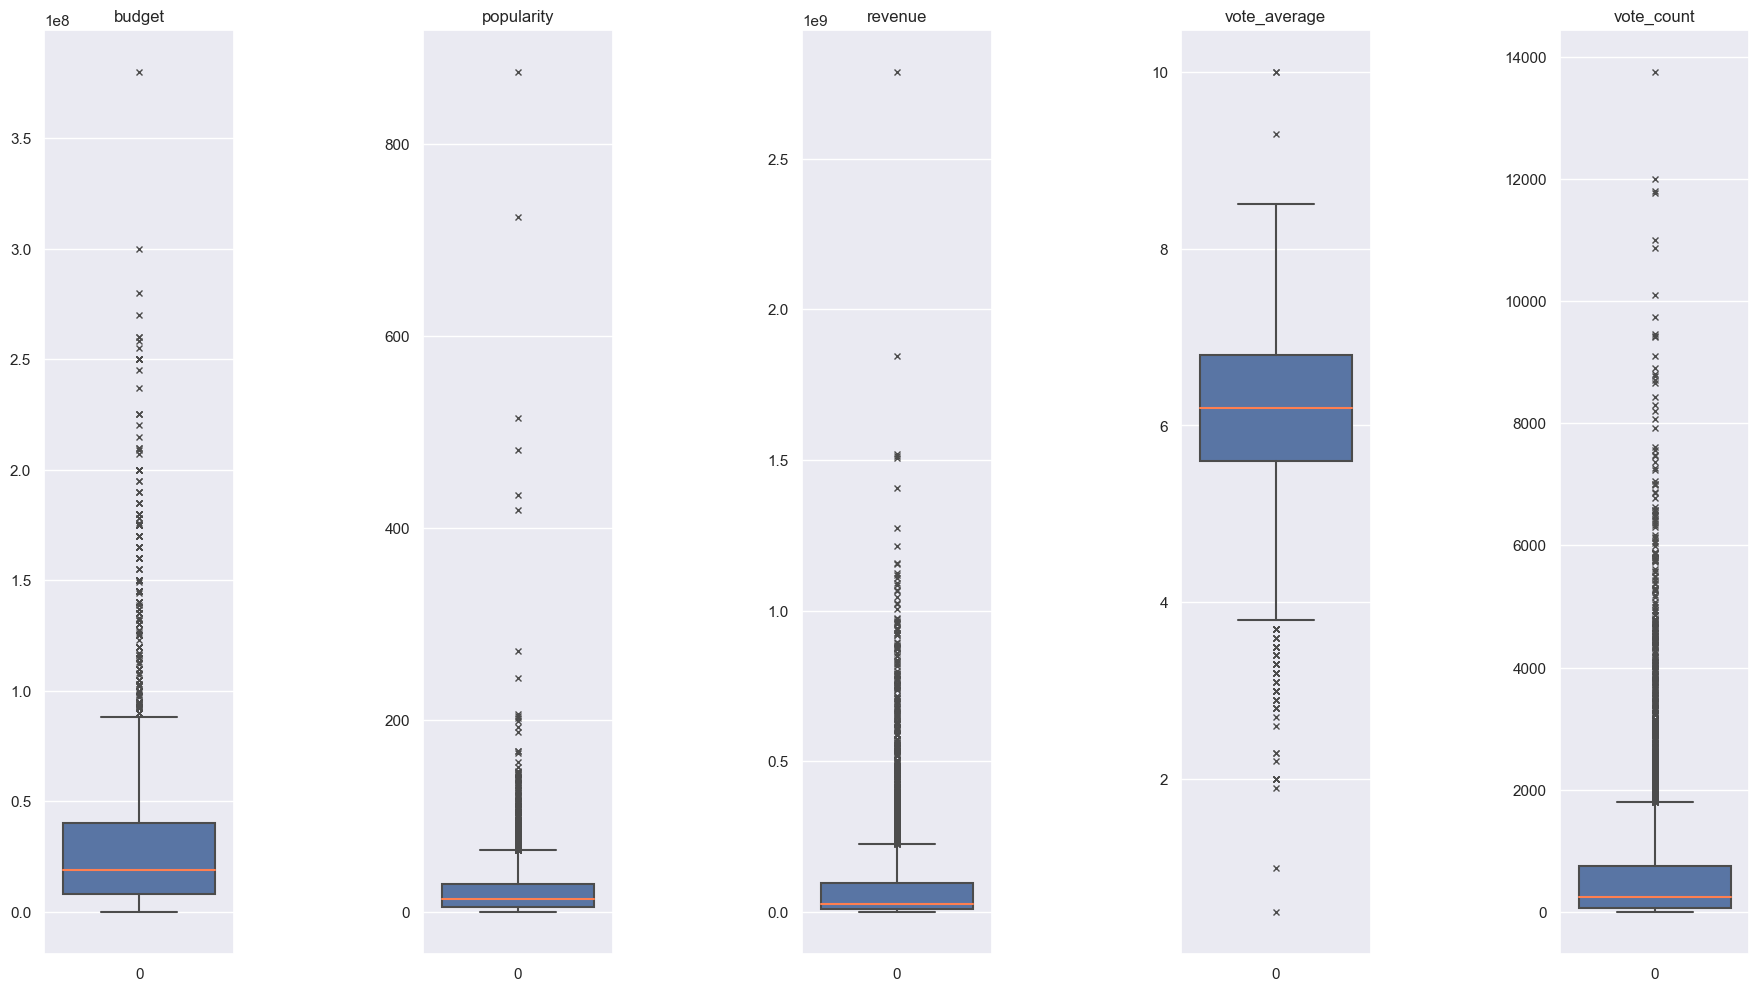

In [1663]:
sns.set_theme()

fig, axs = plt.subplots(nrows = 1, ncols = len(df6.columns), figsize=(22, 12))
plt.subplots_adjust(wspace = 1, hspace = 1)

for i, column in enumerate(df6.columns):
    sns.boxplot(data = df6[column],
                ax = axs[i],
                #notch = True,
                #showcaps = False,
                flierprops = {'marker' : 'x'},
                medianprops = {'color' : 'coral'})
    axs[i].set_title(column)

plt.show()

In [1664]:
# for column in df6.columns:
#     q1 = df6[column].quantile(0.10)
#     q3 = df6[column].quantile(0.90)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df6[column] = np.where(df6[column] < lower_bound, lower_bound, df6[column])
#     df6[column] = np.where(df6[column] > upper_bound, upper_bound, df6[column])

# It's your time to show your magic on dataframe and cook it with all your ingridients before starting the job

In [1665]:
df7 = df5.copy()

In [1666]:
df_del = df7[(df7.budget < 1000000)]
print(df_del.shape)
df_del.sample(5)[['budget', 'revenue', 'title']]

(180, 14)


budget      revenue                         title
4477  750000.0  20929976.64  All the Boys Love Mandy Lane
4446  850000.0   1243961.00      For a Good Time, Call...
4606  300000.0   7808524.00           Tupac: Resurrection
4552  500000.0   8032961.72               Girls Gone Dead
4678  200000.0   8042320.68  The Business of Fancydancing

مقادیر خیلی کوچک ستون بودجه را با ۷۵ درصد از فروش آن جایگزین میکنم 

In [1667]:
def change_budget(row):
    if row['budget'] < 1000000:
        return (75 * row['revenue']) / 100
    else:
        return row['budget']

In [1668]:
df7.budget = df7.apply(change_budget, axis = 1)

In [1669]:
def profit(row):
    prof = (row['revenue'] - row['budget'])
    #prof = ((row['revenue'] - row['budget']) / row['budget'])
    return prof

In [1670]:
df7['profitability'] = df7.apply(profit, axis = 1)

<Axes: ylabel='profitability'>

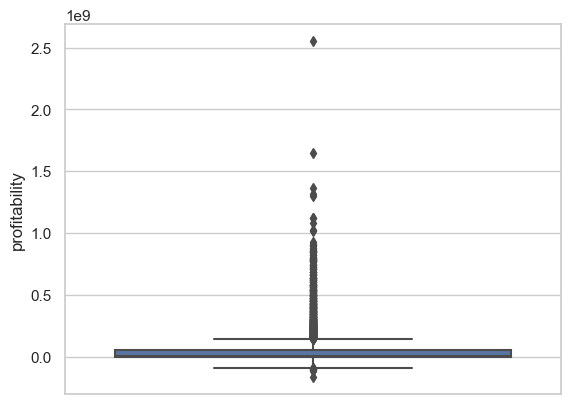

In [1830]:
sns.boxplot(df7, y = 'profitability')

In [1671]:
_v = df7['vote_count']
_m = df7['vote_count'].quantile(0.70) 
_R = df7['vote_average']
_C = df7['vote_average'].mean()

In [1672]:
df7['Rating'] = (((_v / (_v + _m)) * _R) + ((_m / (_v + _m)) * _C))

In [1673]:
df7['good_score'] = (0.5 * df7['Rating']) + (0.5 * ((df7['popularity'] - df7['popularity'].min()) / (df7['popularity'].max() - df7['popularity'].min()) * 10))

<Axes: >

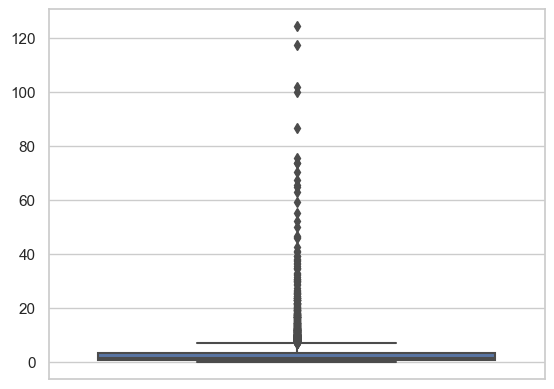

In [1831]:
sns.boxplot(df7, y = df7.revenue / df7.budget)

In [1674]:
df7['success_score'] = ((0.45 * df7['Rating']) + (0.45 * df7['profitability'] / df7['budget']) + (0.1 * ((df7['popularity'] - df7['popularity'].min()) / (df7['popularity'].max() - df7['popularity'].min()) * 10))) * 10

In [1675]:
df8 = df7[['popularity', 'Rating', 'good_score', 'success_score']]

In [1676]:
df8 = ((df8 - df8.min()) / (df8.max() - df8.min())) * 10

In [1677]:
df7[['popularity', 'Rating', 'good_score', 'success_score']] = df8

In [1678]:
df7.describe()

budget   popularity      release       revenue      runtime  \
count  4.735000e+03  4735.000000  4735.000000  4.735000e+03  4735.000000   
mean   3.279004e+07     0.248940  2002.380993  8.808067e+07   107.786593   
std    3.932757e+07     0.364806    12.456521  1.617770e+08    20.722746   
min    3.750000e+00     0.000000  1916.000000  5.000000e+00    14.000000   
25%    8.248156e+06     0.057058  1999.000000  9.363543e+06    94.000000   
50%    1.900000e+07     0.151988  2005.000000  2.651568e+07   104.000000   
75%    4.000000e+07     0.327472  2011.000000  9.571752e+07   118.000000   
max    3.800000e+08    10.000000  2017.000000  2.787965e+09   338.000000   

       vote_average    vote_count  profitability       Rating   good_score  \
count   4735.000000   4735.000000   4.735000e+03  4735.000000  4735.000000   
mean       6.167727    700.315143   5.529064e+07     4.255545     1.349222   
std        0.956941   1240.528452   1.360066e+08     1.081500     0.562117   
min        0.500000      1.000000  -1.657101e+08     0.000000     0.000000   
25%        5.600000     59.000000  -2.578161e+06     3.777010     1.044919   
50%        6.200000    242.000000   7.083218e+06     3.988770     1.146788   
75%        6.800000    753.000000   5.677988e+07     4.514556     1.474480   
max       10.000000  13752.000000   2.550965e+09    10.000000    10.000000   

       success_score  
count    4735.000000  
mean        0.317445  
std         0.507992  
min         0.000000  
25%         0.115258  
50%         0.182410  
75%         0.341475  
max        10.000000

i cooked magic food above 😁

---------

# Examining the relationships between the columns and the dependence of the columns on each other

C:\Users\M7600QE\AppData\Local\Temp\ipykernel_17596\3560241030.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df7.corr()


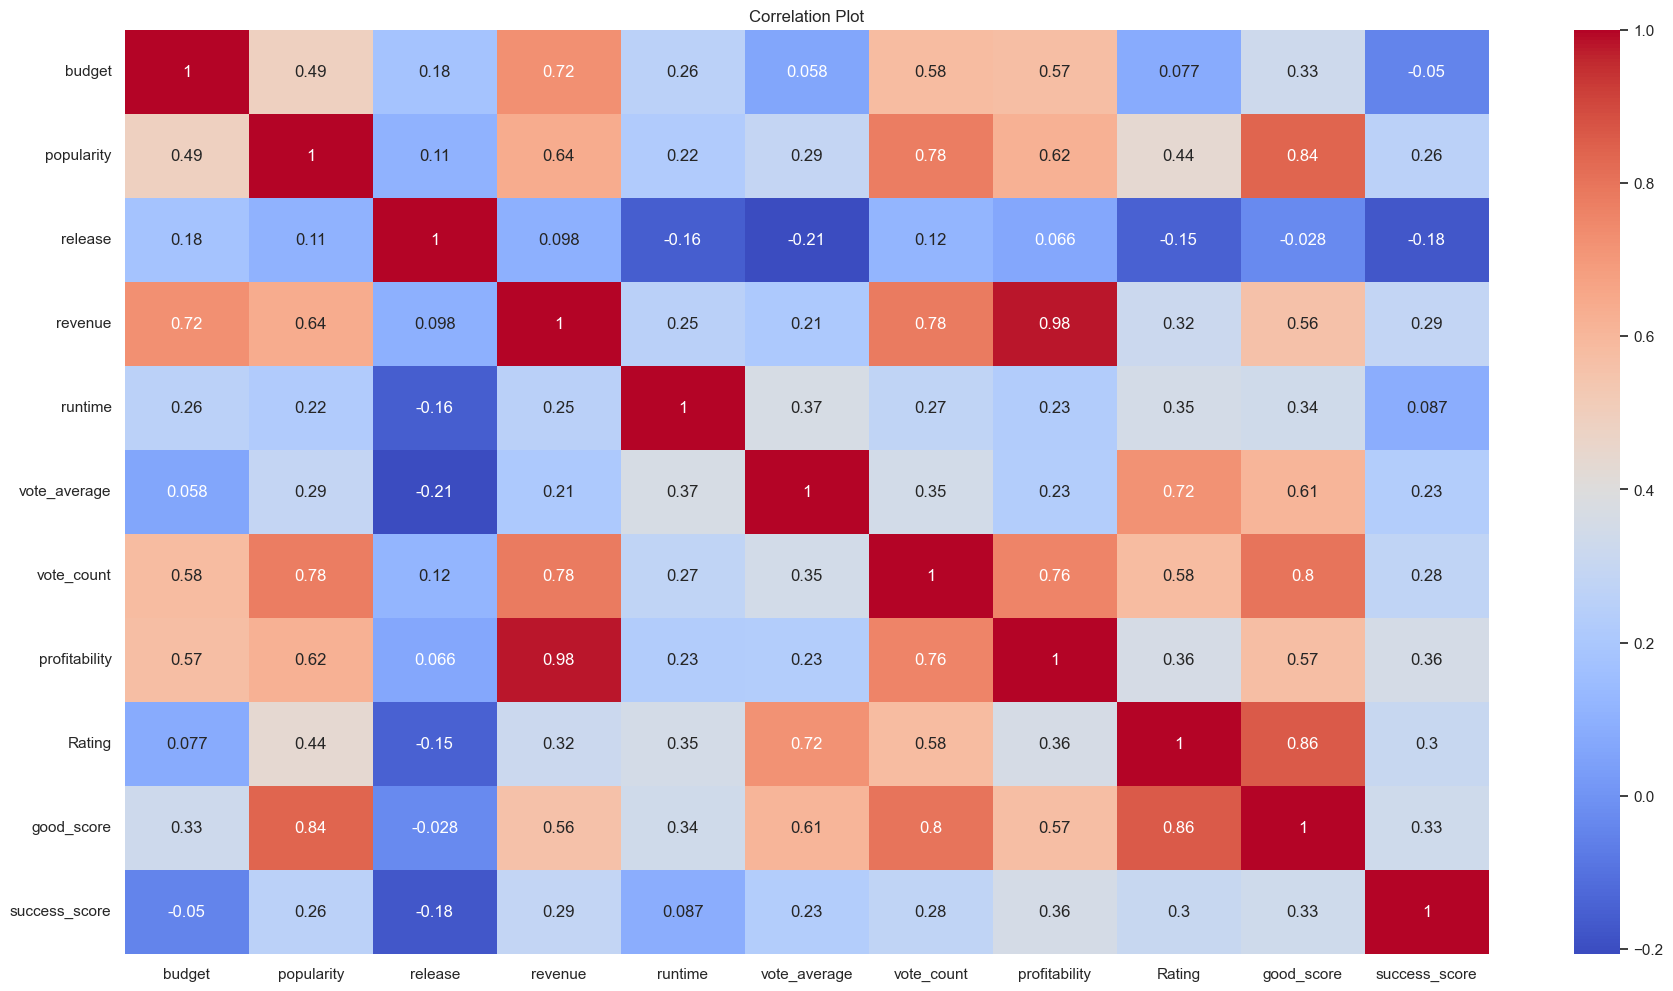

In [1679]:
sns.set_theme(style = "dark")

corr_matrix = df7.corr()

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(22, 12))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

plt.title('Correlation Plot')

plt.show()

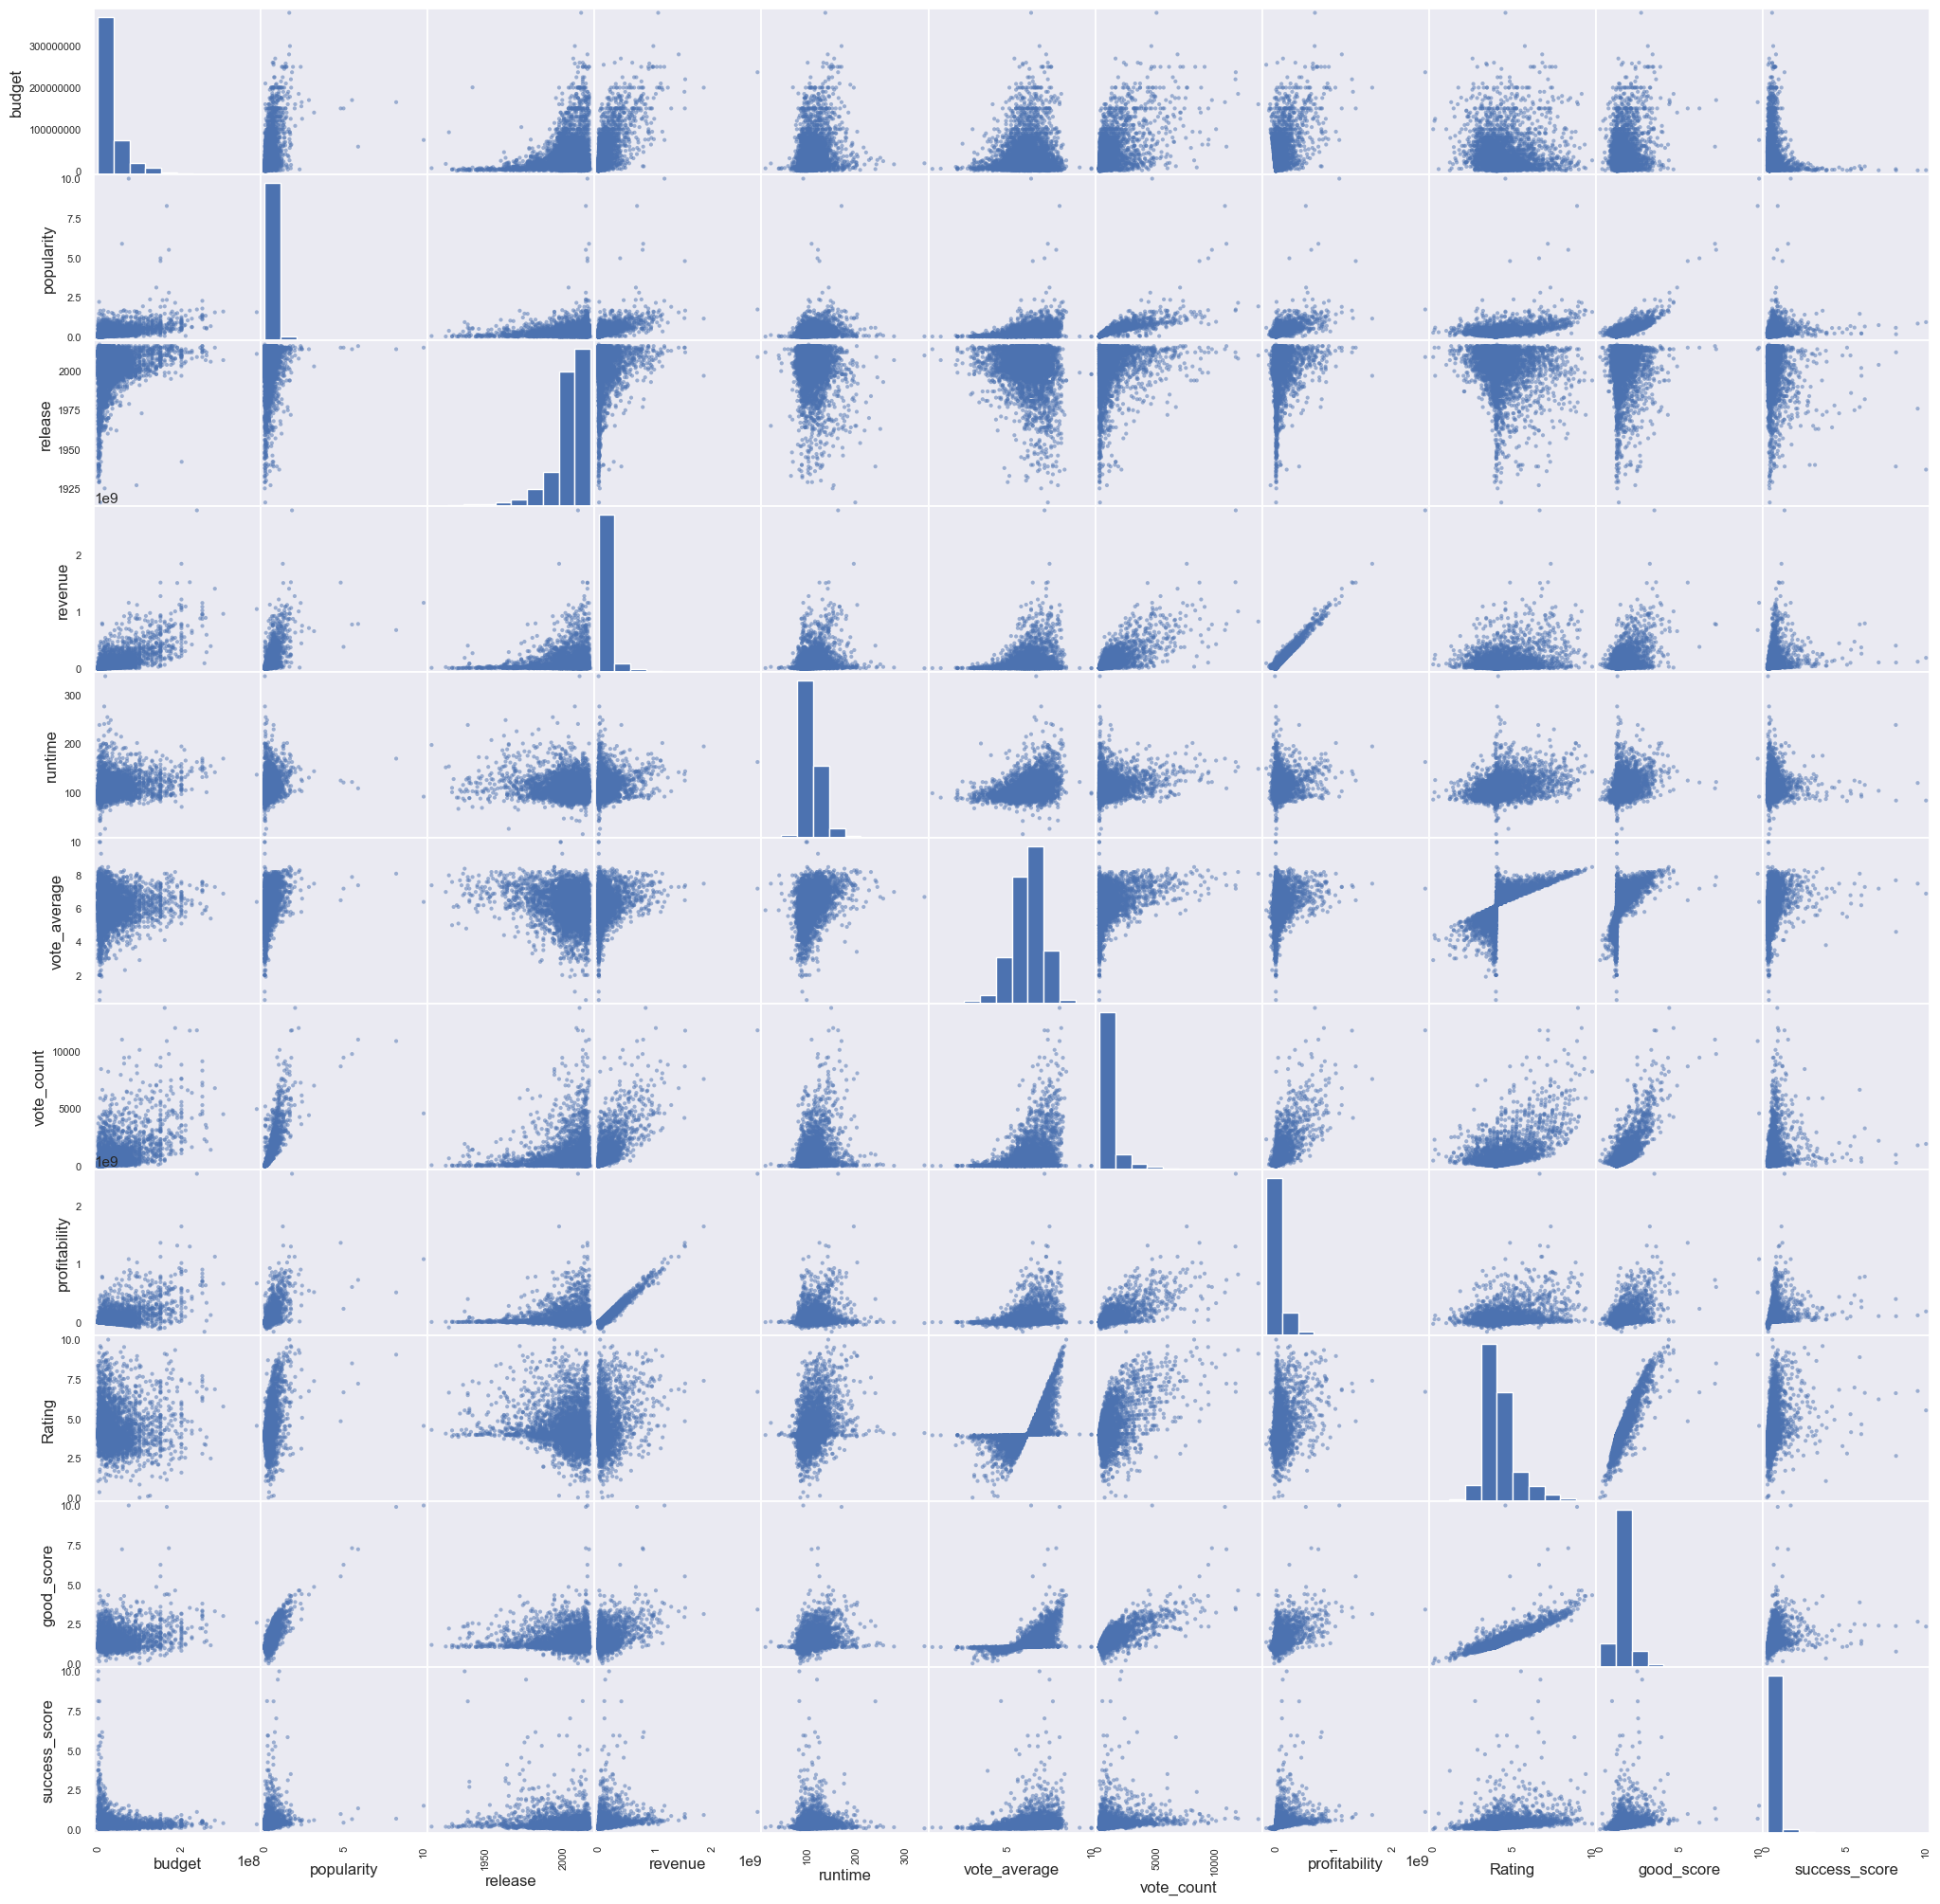

In [1680]:
matrix = scatter_matrix(df7, figsize=(25, 25))

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

# Think about some question that crossed your mind just after seeing the data
Write some of them and try to find answers for them.

mybe later 😁

# Right after your question, it's time to find the answers for my riddles.
After solving them you must visualize the answers to be easily understood by others.

don't forget that your time for your presentation isn't that much for telling about all your answers. just try to do your best and solve of them and prepare a story to tell about what you have learned by solving this riddles about your data and pay attention to sync the audiance with your great presentation

# Easy questions:
after finding the answers, try to use any type of plot that fit with your answer to show the best insights, don't forget to create label and title for your plots ;))

--------------------------------------------------------------------------------------------------------------------------------
## 01 In which genres are films generally made?
### فیلم ها عموما در چه ژانرهایی ساخته می شوند؟

In [1681]:
df_genres = df3[['genres', 'title']].copy()
df_genres

genres  \
0     [action, adventure, fantasy, science, fiction]   
1                       [adventure, fantasy, action]   
2                         [action, adventure, crime]   
3                   [action, crime, drama, thriller]   
4              [action, adventure, science, fiction]   
...                                              ...   
4798                       [action, crime, thriller]   
4799                               [comedy, romance]   
4800             [comedy, drama, romance, tv, movie]   
4801                                             NaN   
4802                                   [documentary]   

                                         title  
0                                       Avatar  
1     Pirates of the Caribbean: At World's End  
2                                      Spectre  
3                        The Dark Knight Rises  
4                                  John Carter  
...                                        ...  
4798                               El Mariachi  
4799                                 Newlyweds  
4800                 Signed, Sealed, Delivered  
4801                          Shanghai Calling  
4802                         My Date with Drew  

[4803 rows x 2 columns]

In [1682]:
df_genres.dropna(subset = ['genres'], inplace = True)
print(df_genres.isnull().sum())
df_genres.shape

genres    0
title     0
dtype: int64


(4775, 2)

In [1683]:
genre_counts = df_genres['genres'].value_counts()

print(genre_counts)

[drama]                                         370
[comedy]                                        282
[drama, romance]                                164
[comedy, romance]                               144
[comedy, drama]                                 142
                                               ... 
[adventure, comedy, crime, science, fiction]      1
[action, comedy, family, adventure]               1
[drama, adventure, western]                       1
[adventure, fantasy, action, romance]             1
[comedy, drama, romance, tv, movie]               1
Name: genres, Length: 1168, dtype: int64


In [1684]:
genres = df_genres.genres
genres = genres.explode()

genre_counts = genres.value_counts()

print(genre_counts)

drama          2297
comedy         1722
thriller       1259
action         1153
romance         890
adventure       790
crime           696
fiction         530
science         530
horror          519
family          510
fantasy         418
mystery         347
animation       234
history         197
music           183
war             142
documentary     110
western          80
foreign          34
tv                8
movie             8
Name: genres, dtype: int64


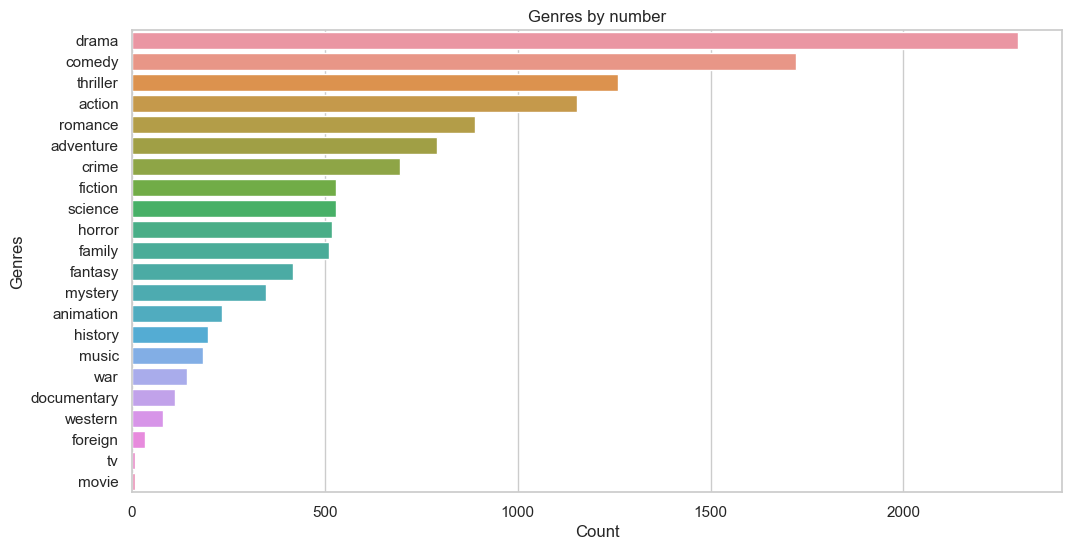

In [1686]:
sns.set_theme(style = "whitegrid")

fig, axes = plt.subplots(figsize = (12, 6))

sns.barplot(y = genre_counts.index, x = genre_counts.values, ax = axes)

axes.set_xlabel('Count')
axes.set_ylabel('Genres')
axes.set_title('Genres by number')

plt.show();

--------------------------------------------------------------------------------------------------------------------------------
## 02 What does the success of the film mean? Ratings or sales or...?
### موفقیت فیلم یعنی چه؟ رتبه بندی یا فروش یا...؟

In [ ]:
success_score, good_score
قبل از این در خصوص موفقیت فیلم تحلیل کرده ام و دو ستون بالا به دیتافریم اضافه شده است

In [1687]:
success_movie = df7.copy()

In [1693]:
_success_movie = success_movie.sort_values('success_score', ascending = False).head(45)
_good_movie = success_movie.sort_values('good_score', ascending = False).head(45)

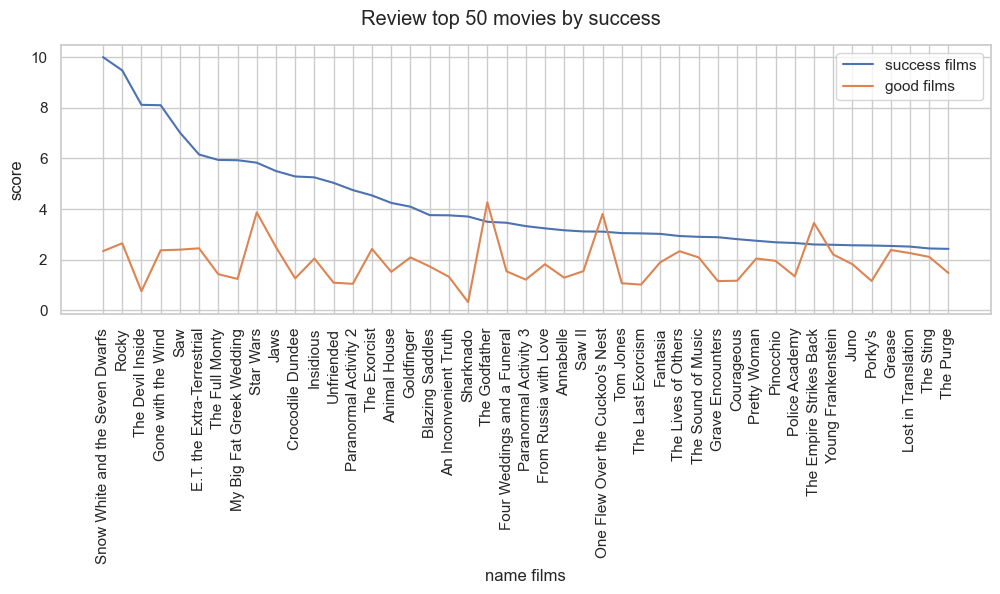

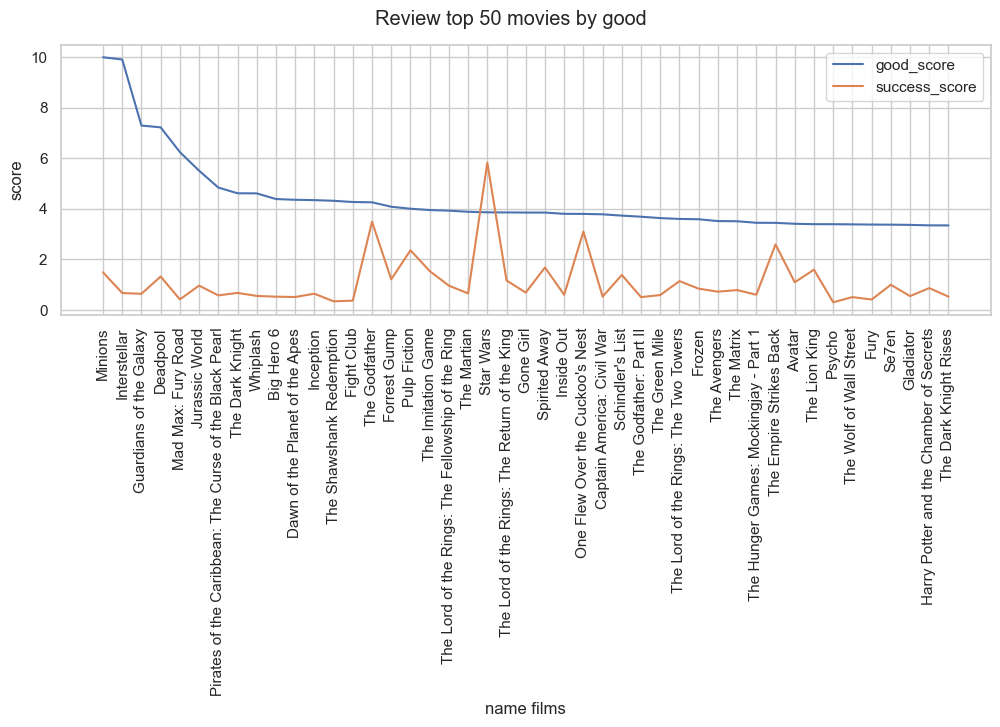

In [1695]:
sns.set_theme(style = "whitegrid")

fig , axes = plt.subplots(1, 1, figsize = (12, 3.5))
fig.suptitle('Review top 50 movies by success')

axes.set_xlabel('name films')
axes.set_ylabel('score')

sns.lineplot(data = _success_movie, x = "title", y = "success_score", label = 'success films')
sns.lineplot(data = _success_movie, x = "title", y = "good_score", label = 'good films')

plt.xticks(rotation = 90)

axes.legend()

plt.show()

sns.set_theme(style = "whitegrid")

fig , axes = plt.subplots(1, 1, figsize = (12, 3.5))
fig.suptitle('Review top 50 movies by good')

axes.set_xlabel('name films')
axes.set_ylabel('score')

sns.lineplot(data = _good_movie, x = "title", y = "good_score", label = 'good_score')
sns.lineplot(data = _good_movie, x = "title", y = "success_score", label = 'success_score')

plt.xticks(rotation = 90)

axes.legend()

plt.show()

In [1696]:
_success_movie = success_movie[(success_movie.success_score < 4)].success_score
_good_movie = success_movie[(success_movie.good_score < 4)].good_score

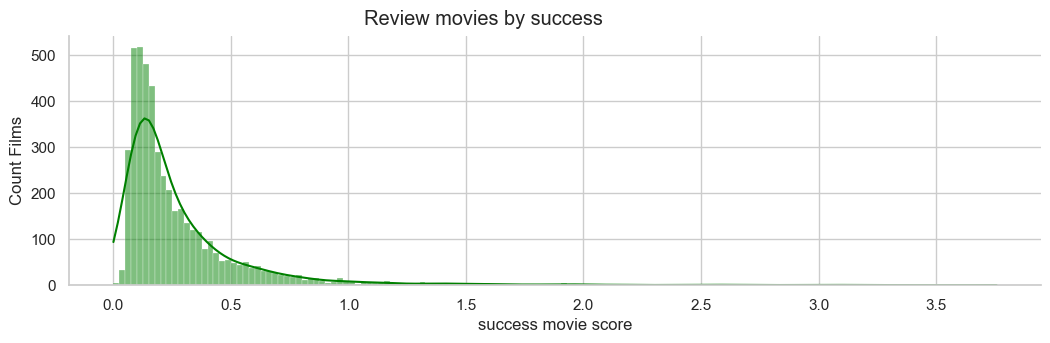

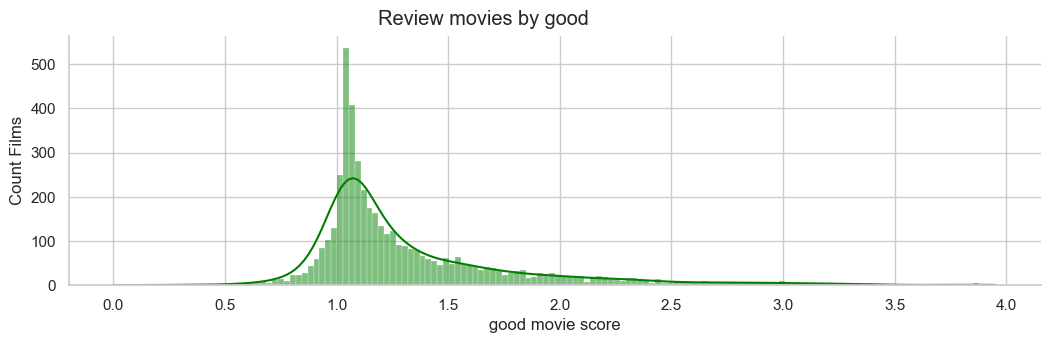

In [1697]:
g = sns.displot(_success_movie, bins = 150, color = 'green', kde = True);

g.set_axis_labels('success movie score', "Count Films")

g.fig.suptitle("Review movies by success", y = 1.05)

g.fig.set_size_inches(12, 3)

plt.show();

#==============================================================================================================================

g = sns.displot(_good_movie, bins = 150, color = 'green', kde = True);

g.set_axis_labels('good movie score', "Count Films")

g.fig.suptitle("Review movies by good", y = 1.05)

g.fig.set_size_inches(12, 3)

plt.show();

--------------------------------------------------------------------------------------------------------------------------------
## 03 Generally, how long are the movies? Does being long or short affect its success?
### به طور کلی، مدت زمان فیلم ها چقدر است؟ آیا طولانی یا کوتاه بودن بر موفقیت آن تأثیر می گذارد؟

In [1698]:
df_runtime = df3[['runtime', 'title']].copy()

In [1699]:
df_runtime.dropna(subset = ['runtime'], inplace = True)
print(df_runtime.isnull().sum())
df_runtime.shape

runtime    0
title      0
dtype: int64


(4766, 2)

In [1700]:
df_runtime.runtime.mean()

107.66072177926983

In [1701]:
df_runtime = df7[['runtime', 'success_score', 'good_score']].copy()

In [1702]:
Q3 = df_runtime['success_score'].quantile(0.75)
Q2 = df_runtime['success_score'].quantile(0.5)
Q1 = df_runtime['success_score'].quantile(0.25)
print('''
Q3 = {} 
Q2 = {} 
Q1 = {}
'''.format(Q3, Q2, Q1))


Q3 = 0.3414751742500848 
Q2 = 0.18241044358275532 
Q1 = 0.11525808269478816



In [1703]:
successful_movie = df_runtime[(df_runtime['success_score'] >= Q3)]
good_movie = df_runtime[((df_runtime['success_score'] >= Q2) & (df_runtime.success_score < Q3))]
Normal_movie = df_runtime[((df_runtime.success_score >= Q1) & (df_runtime.success_score < Q2))]
bad_movie = df_runtime[(df_runtime.success_score < Q1)]

In [1704]:
print('''
mean:
    run time successful movie = {}
    run time good movie = {}
    run time Normal movie = {}
    run time bad movie = {}
'''.format(
    successful_movie.runtime.mean(),
    good_movie.runtime.mean(),
    Normal_movie.runtime.mean(),
    bad_movie.runtime.mean()))


run time successful movie = 113.28822635135135
run time good movie = 108.86871621621621
run time Normal movie = 106.54595097210482
run time bad movie = 102.44243243243243



In [1711]:
print(f'successful movie => min: {successful_movie.runtime.min()}, max: {successful_movie.runtime.max()}')
print(f'good movie       => min: {good_movie.runtime.min()}, max: {good_movie.runtime.max()}')
print(f'Normal movie     => min: {Normal_movie.runtime.min()}, max: {Normal_movie.runtime.max()}')
print(f'bad movie        => min: {bad_movie.runtime.min()}, max: {bad_movie.runtime.max()}')

successful movie => min: 46.0, max: 238.0
good movie       => min: 25.0, max: 248.0
Normal movie     => min: 41.0, max: 276.0
bad movie        => min: 14.0, max: 338.0


In [1707]:
print(df_runtime.corr().loc['runtime', 'success_score'])

0.08714408223523393


In [1708]:
print(df_runtime.corr().loc['runtime', 'good_score'])

0.3390657412075647


In [1709]:
successful_movie.reset_index(inplace = True)
good_movie.reset_index(inplace = True)
Normal_movie.reset_index(inplace = True)
bad_movie.reset_index(inplace = True)

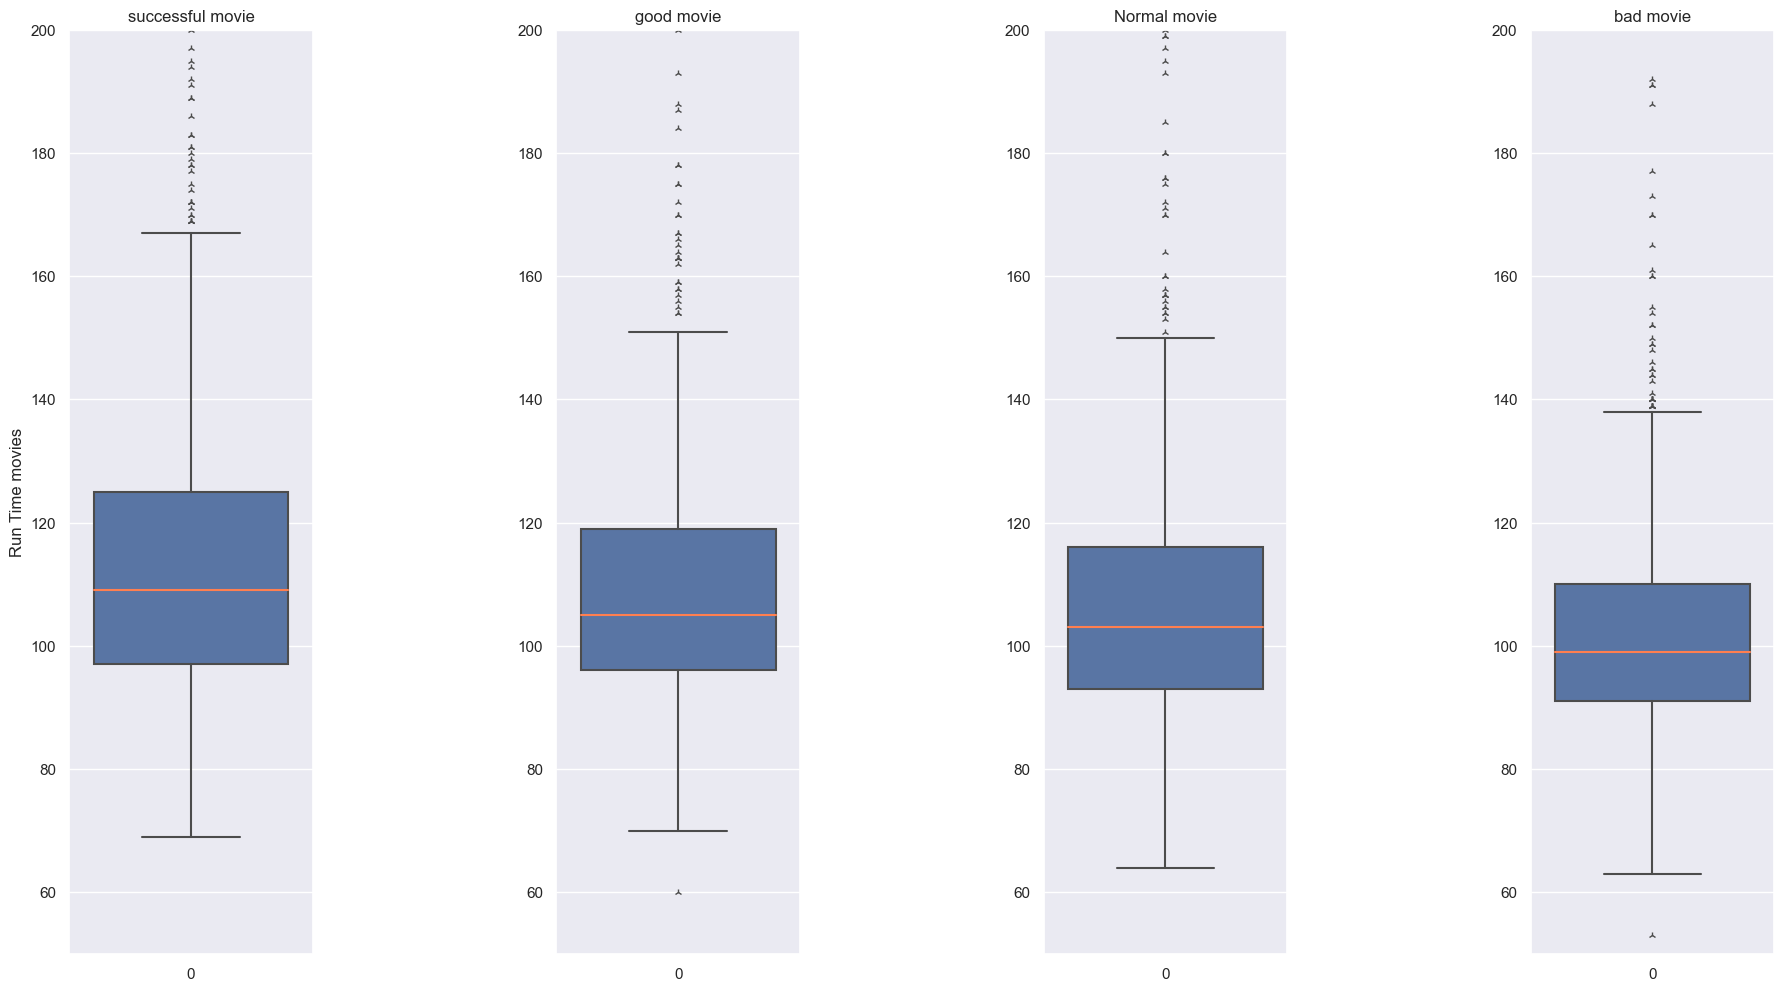

In [1710]:
sns.set_theme()

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(22, 12))
plt.subplots_adjust(wspace = 1, hspace = 1)

#successful movie
sns.boxplot(data = successful_movie['runtime'],
            ax = axs[0],
            flierprops = {'marker' : '2'},
            medianprops = {'color' : 'coral'})
axs[0].set_title('successful movie')

#good movie
sns.boxplot(data = good_movie['runtime'],
            ax = axs[1],
            flierprops = {'marker' : '2'},
            medianprops = {'color' : 'coral'})
axs[1].set_title('good movie')

#Normal movie 
sns.boxplot(data = Normal_movie['runtime'],
            ax = axs[2],
            flierprops = {'marker' : '2'},
            medianprops = {'color' : 'coral'})
axs[2].set_title('Normal movie')

#bad movie 
sns.boxplot(data = bad_movie['runtime'],
            ax = axs[3],
            flierprops = {'marker' : '2'},
            medianprops = {'color' : 'coral'})
axs[3].set_title('bad movie')

axs[0].set_ylabel('Run Time movies')

axs[0].set_ylim([50, 200])
axs[1].set_ylim([50, 200])
axs[2].set_ylim([50, 200])
axs[3].set_ylim([50, 200])

plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 04 In which languages are movies more popular and have more audiance?
### فیلم ها در کدام زبان ها محبوبیت بیشتری دارند و مخاطبان بیشتری دارند؟

In [1713]:
df_language = df3[['popularity', 'original_language', 'vote_count']].copy()

In [1714]:
numbric_columns = df_language[['popularity', 'vote_count']]

imputer = KNNImputer(n_neighbors = 500, weights = "uniform")

df_language[['popularity', 'vote_count']] = imputer.fit_transform(numbric_columns)

In [1715]:
print(df_language.isnull().sum())
df_language.shape

popularity           0
original_language    0
vote_count           0
dtype: int64


(4803, 3)

In [1716]:
language_popularity_sum = df_language.groupby('original_language')['popularity'].sum().sort_values(ascending = False)
language_popularity_sum.loc['en'] = 1000

In [1717]:
language_popularity_mean = df_language.groupby('original_language')['popularity'].mean().sort_values(ascending = False)

In [1718]:
language_count_sum = df_language.groupby('original_language')['vote_count'].sum().sort_values(ascending = False)
language_count_sum.loc['en'] = 17500

In [1719]:
language_count_mean = df_language.groupby('original_language')['vote_count'].mean().sort_values(ascending = False)

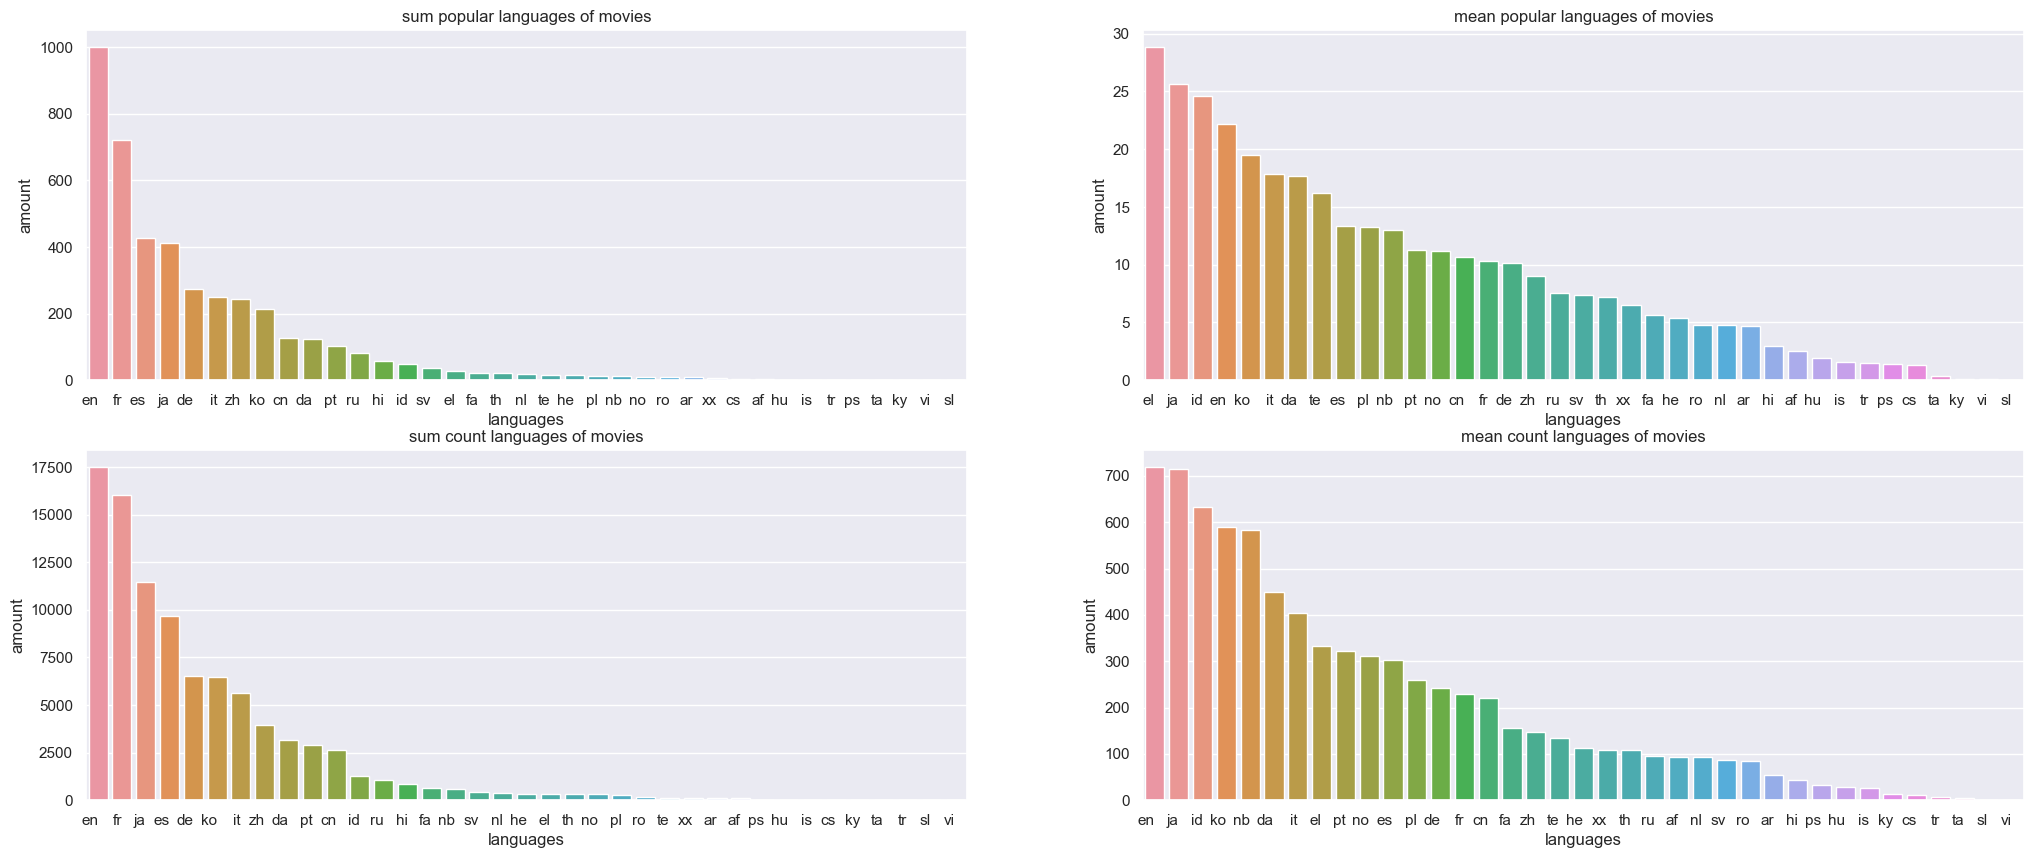

In [1720]:
fig, axes = plt.subplots(2, 2, figsize=(25, 10))

# Plot language popularity sum
sns.barplot(x = language_popularity_sum.index, y = language_popularity_sum.values, ax = axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation = 0, ha = 'right')
axes[0, 0].set_xlabel('languages')
axes[0, 0].set_ylabel('amount')
axes[0, 0].set_title('sum popular languages of movies')

# Plot language popularity mean
sns.barplot(x = language_popularity_mean.index, y = language_popularity_mean.values, ax = axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation = 0, ha = 'right')
axes[0, 1].set_xlabel('languages')
axes[0, 1].set_ylabel('amount')
axes[0, 1].set_title('mean popular languages of movies')

# Plot language count sum
sns.barplot(x = language_count_sum.index, y = language_count_sum.values, ax = axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation = 0, ha = 'right')
axes[1, 0].set_xlabel('languages')
axes[1, 0].set_ylabel('amount')
axes[1, 0].set_title('sum count languages of movies')

# Plot language count mean
sns.barplot(x = language_count_mean.index, y = language_count_mean.values, ax = axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation = 0, ha = 'right')
axes[1, 1].set_xlabel('languages')
axes[1, 1].set_ylabel('amount')
axes[1, 1].set_title('mean count languages of movies')

plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 05 Is the rating of a movie the basis of people's choice?
### آیا رتبه بندی یک فیلم مبنای انتخاب مردم است؟

### روش اول : حذف مقادیر گمشده ستون فروش فیلم

In [1728]:
df_choice = df3[['popularity', 'revenue', 'vote_average', 'vote_count', 'title']].copy()


In [1729]:
df_choice.dropna(subset = ['revenue', 'vote_average'], inplace = True)
print(df_choice.isnull().sum())
df_choice.shape

popularity      0
revenue         0
vote_average    0
vote_count      0
title           0
dtype: int64


(3374, 5)

In [1730]:
_v = df_choice['vote_count']
_m = df_choice['vote_count'].quantile(0.50) 
_R = df_choice['vote_average']
_C = df_choice['vote_average'].mean()
df_choice['Rating'] = (((_v / (_v + _m)) * _R) + ((_m / (_v + _m)) * _C))
df_choice.drop(columns = ['vote_count','vote_average'], inplace = True)

In [1731]:
df_choice['choice_people'] = ((0.5 * ((df_choice['revenue'] - df_choice['revenue'].min()) / (df_choice['revenue'].max() - df_choice['revenue'].min()))) + (0.5 * df_choice['popularity'])) * 10
df_choice.drop(columns = ['revenue','popularity'], inplace = True)

In [1732]:
df_choice.sort_values('choice_people', ascending = False, inplace = True)

In [1733]:
df_choice

title    Rating  choice_people
546                                           Minions  6.392299    4379.981033
95                                       Interstellar  8.030289    3622.449696
788                                          Deadpool  7.358062    2574.254233
94                            Guardians of the Galaxy  7.831248    2406.880025
127                                Mad Max: Fury Road  7.160337    2172.072273
...                                               ...       ...            ...
4371                                             Fiza  6.309158       0.216234
2970                               There Goes My Baby  6.322354       0.185586
3225                                            Limbo  6.337997       0.174878
4105  The Book of Mormon Movie, Volume 1: The Journey  6.306552       0.162735
3921                            Woman Thou Art Loosed  6.303610       0.112122

[3374 rows x 3 columns]

### روش دوم : استفاده از دیتافریم نهایی

In [1734]:
_df_choice = df7[['popularity', 'revenue', 'Rating', 'title', 'good_score']].copy()

In [1735]:
print(_df_choice.isnull().sum())
_df_choice.shape

popularity    0
revenue       0
Rating        0
title         0
good_score    0
dtype: int64


(4735, 5)

In [1736]:
_df_choice['choice_people'] = ((0.5 * ((_df_choice['revenue'] - _df_choice['revenue'].min()) / (_df_choice['revenue'].max() - _df_choice['revenue'].min()))) + (0.5 * _df_choice['popularity'])) * 10
_df_choice.drop(columns = ['revenue','popularity'], inplace = True)

In [1737]:
Q3 = _df_choice['good_score'].quantile(0.75)
Q2 = _df_choice['good_score'].quantile(0.5)
Q1 = _df_choice['good_score'].quantile(0.25)

def change_score(row):
    if row.good_score >= Q3:
        return 'very high'
    elif row.good_score >= Q2:
        return 'high'
    elif row.good_score >= Q1:
        return 'normal'
    else:
        return 'bad'

In [1738]:
_df_choice['_good_score'] = _df_choice.apply(change_score, axis = 1)
_df_choice

Rating                                     title  good_score  \
0     6.695321                                    Avatar    3.411863   
1     5.764688  Pirates of the Caribbean: At World's End    3.003219   
2     4.294778                                   Spectre    2.219703   
3     7.698304                     The Dark Knight Rises    3.347327   
4     3.824272                               John Carter    1.434490   
...        ...                                       ...         ...   
4796  5.039701                                    Primer    1.612767   
4798  4.314765                               El Mariachi    1.292510   
4799  3.964860                                 Newlyweds    1.045039   
4800  3.994236                 Signed, Sealed, Delivered    1.062385   
4802  3.980731                         My Date with Drew    1.062974   

      choice_people _good_score  
0         13.590708   very high  
1          9.665763   very high  
2          7.711146   very high  
3          8.359358   very high  
4          3.018009        high  
...             ...         ...  
4796       1.331740   very high  
4798       0.818515        high  
4799       0.051044      normal  
4800       0.101282      normal  
4802       0.116559      normal  

[4735 rows x 5 columns]

In [1739]:
_df_choice.sort_values('choice_people', ascending = False, inplace = True)

In [1740]:
_df_choice

Rating                    title  good_score  choice_people _good_score
546   4.541030                  Minions   10.000000      52.074508   very high
95    9.049668             Interstellar    9.910874      42.568883   very high
788   7.211807                 Deadpool    7.226391      30.788920   very high
94    8.497024  Guardians of the Galaxy    7.297913      28.859994   very high
28    4.833062           Jurassic World    5.511738      26.624704   very high
...        ...                      ...         ...            ...         ...
4272  3.965617    Journey from the Fall    1.039559       0.005240         bad
4371  3.968883                     Fiza    1.040303       0.003554         bad
3419  3.944151             Bran Nue Dae    1.032543       0.002860         bad
2970  3.992856       There Goes My Baby    1.047837       0.002317      normal
4065  3.912821               Mi America    1.022504       0.002212         bad

[4735 rows x 5 columns]

In [1741]:
print('corr with drop rows = ', df_choice[['choice_people', 'Rating']].corr().iloc[0,1])
print('corr without drop rows = ', _df_choice[['choice_people', 'Rating']].corr().iloc[0,1])

corr with drop rows =  0.36215730412773905
corr without drop rows =  0.44085338781848393


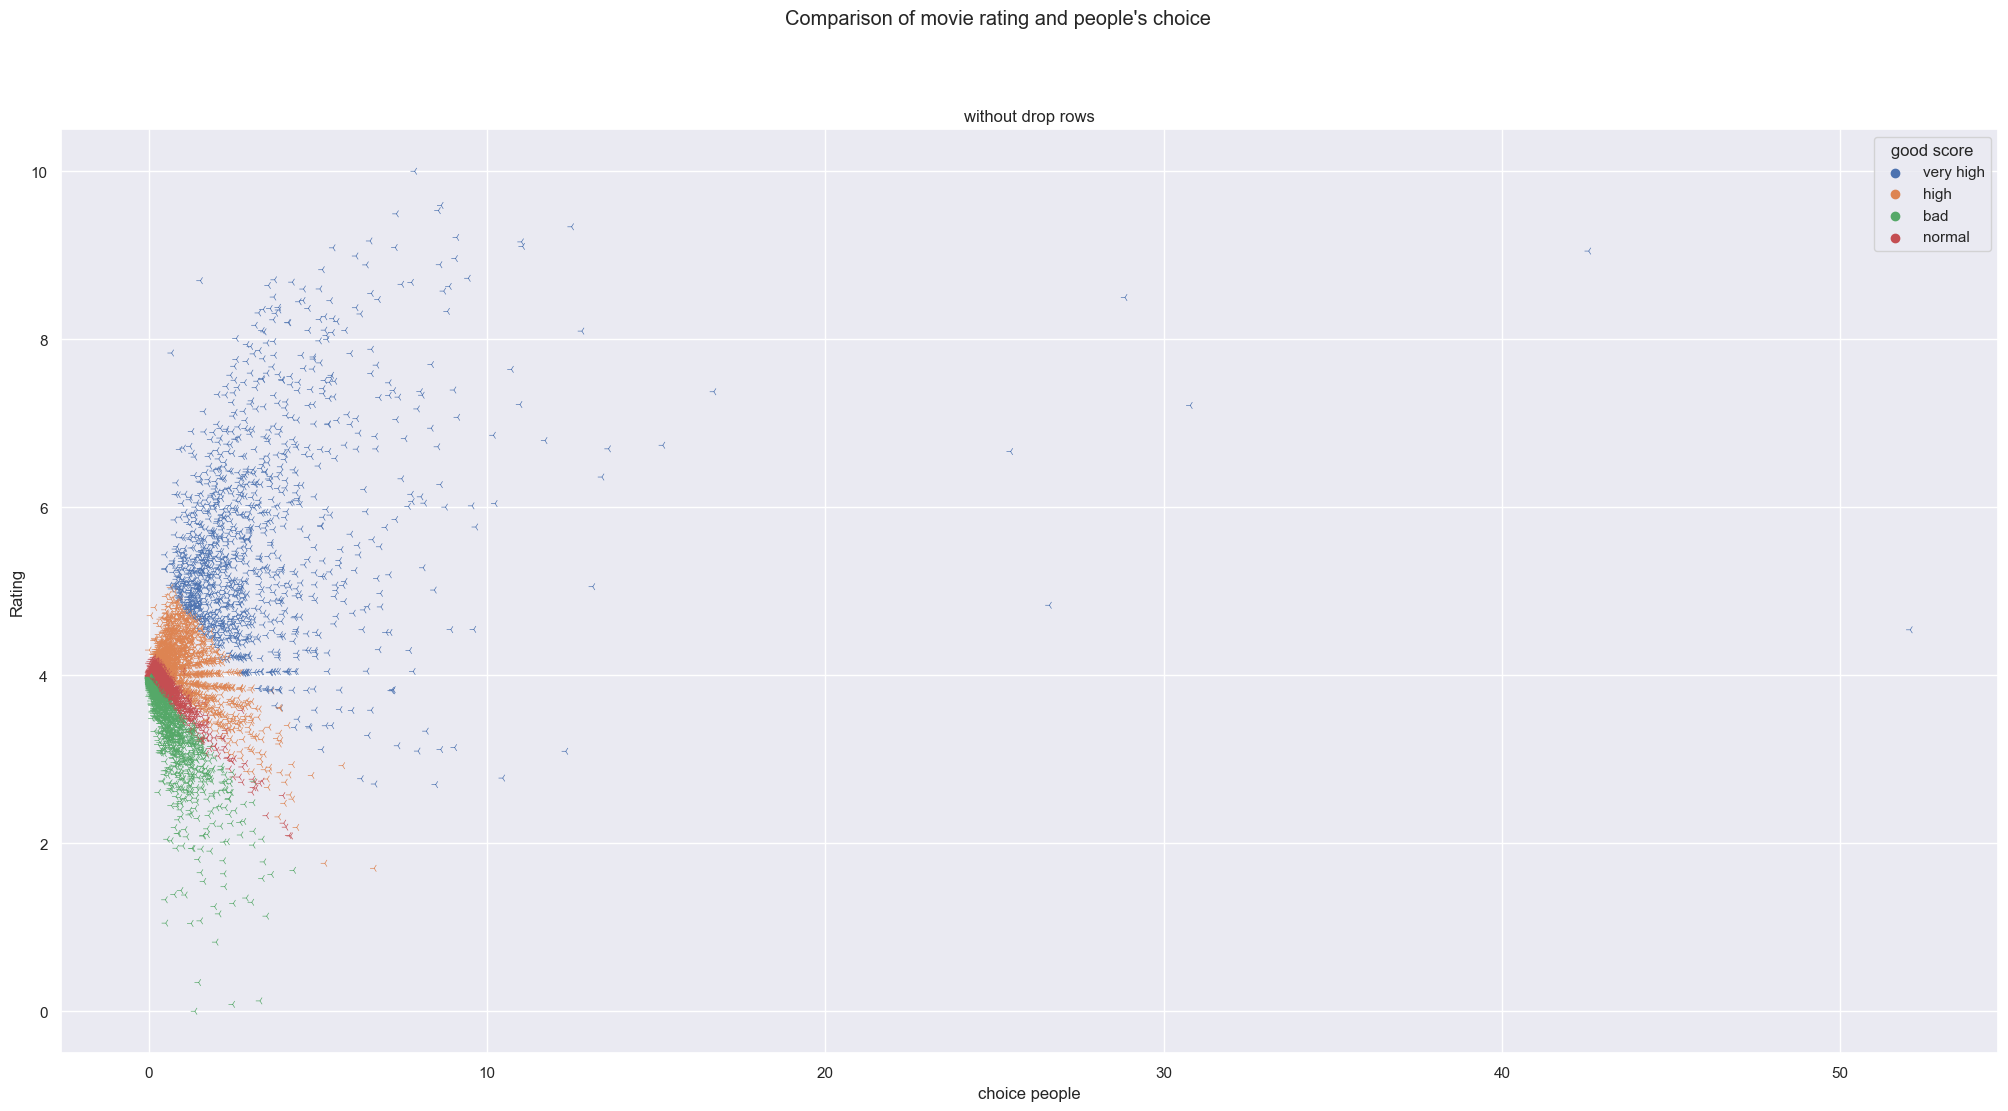

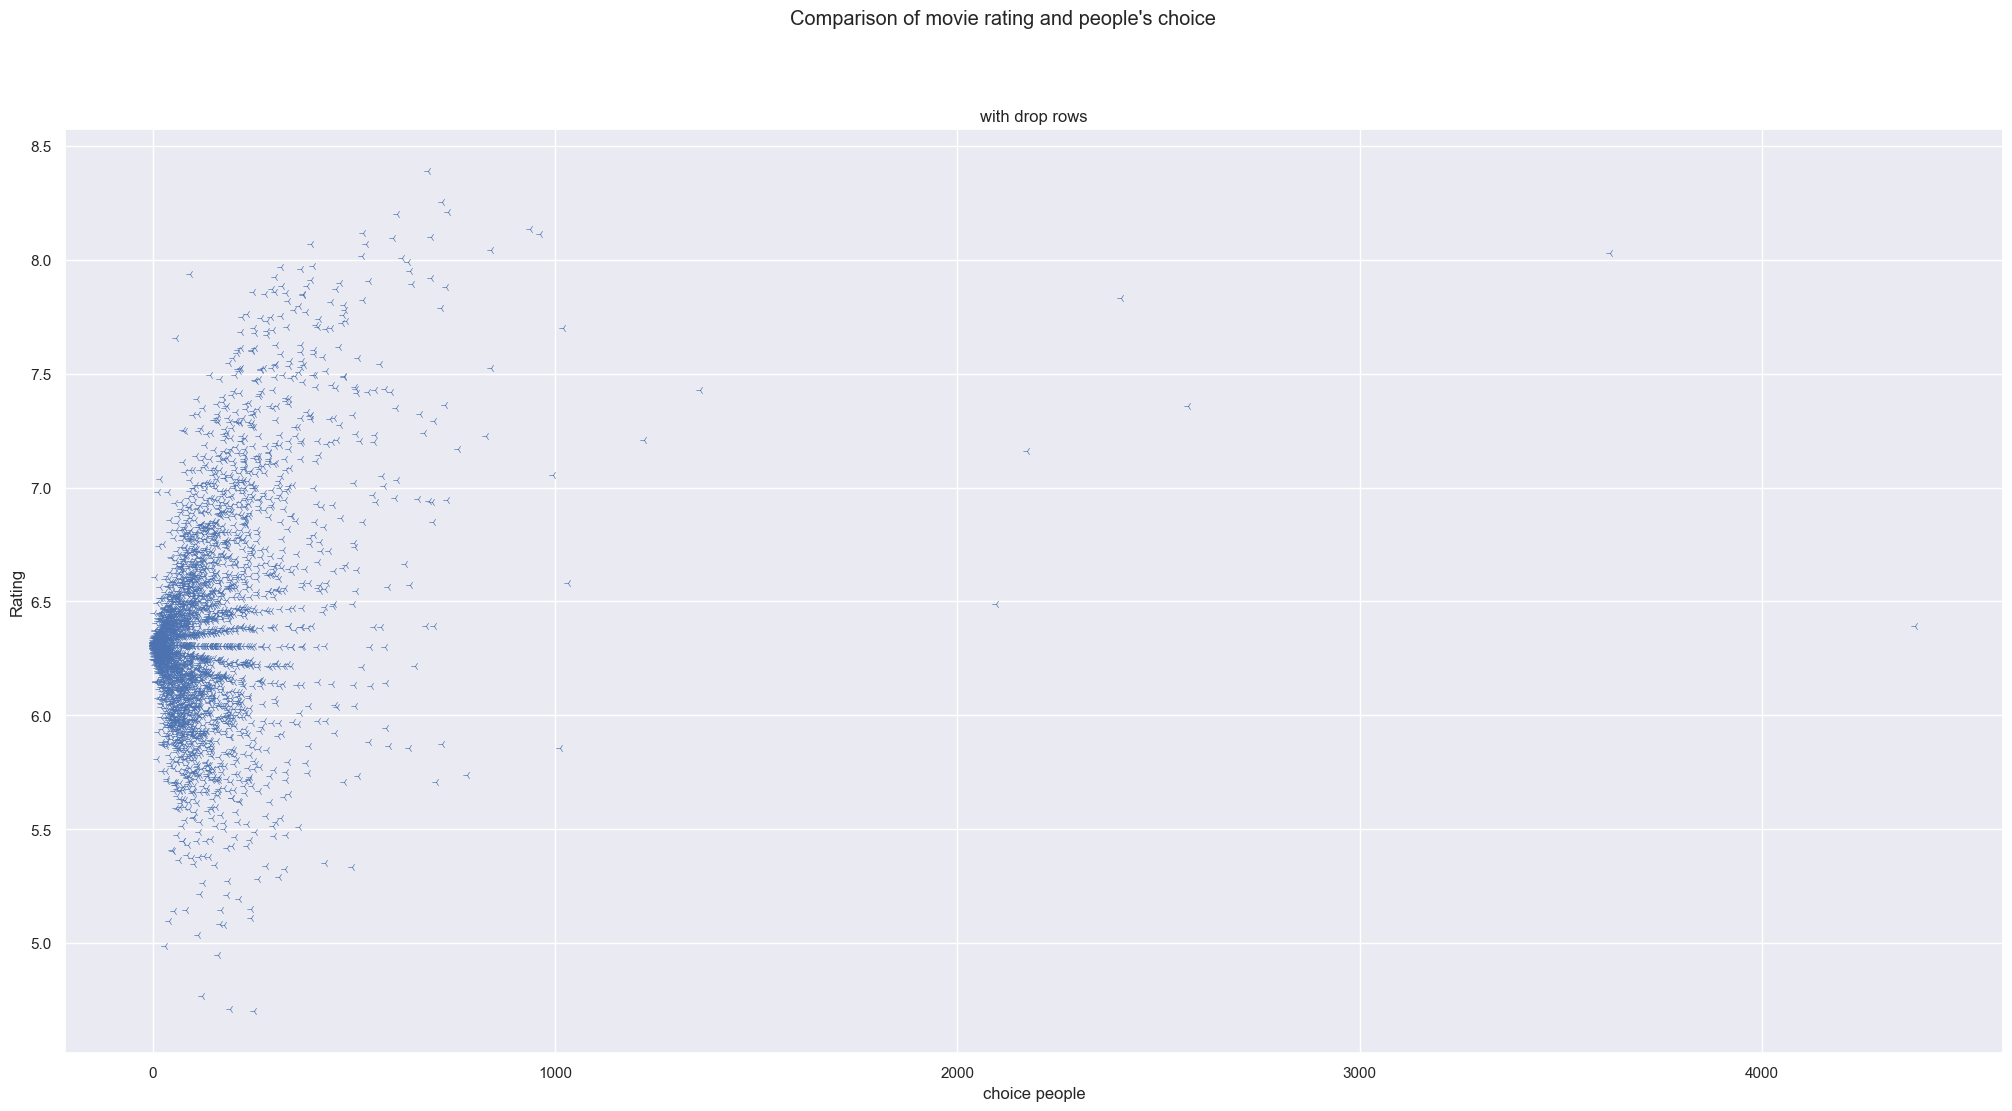

In [1742]:
sns.set_theme()

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 12))

plt.suptitle('Comparison of movie rating and people\'s choice')

g = sns.scatterplot(data = _df_choice, x = "choice_people", y = "Rating", ax = axs, marker = '3', hue = '_good_score')

g.legend(title = "good score")

axs.set_title('without drop rows')

axs.set_ylabel('Rating')

axs.set_xlabel('choice people')

plt.show()

#==============================================================================================================================

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 12))

plt.suptitle('Comparison of movie rating and people\'s choice')

sns.scatterplot(data = df_choice, x = "choice_people", y = "Rating", ax = axs, marker = '3')

axs.set_title('with drop rows')

axs.set_ylabel('Rating')

axs.set_xlabel('choice people')

plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 07 Which category of movies is highly popular, but critics score them low? What is their genre?
### کدام دسته از فیلم‌ها محبوبیت بالایی دارند اما منتقدان به آن‌ها نمره پایینی می‌دهند؟ ژانر آنها چیست؟

In [1743]:
df_exception = df3[['genres', 'popularity', 'title', 'vote_average', 'vote_count']].copy()

In [1744]:
numbric_columns = df_exception[['popularity', 'vote_average', 'vote_count']]

imputer = KNNImputer(n_neighbors = 500, weights = "uniform")

df_exception[['popularity', 'vote_average', 'vote_count']] = imputer.fit_transform(numbric_columns)

In [1745]:
print(df_exception.isnull().sum())
df_exception.shape

genres          28
popularity       0
title            0
vote_average     0
vote_count       0
dtype: int64


(4803, 5)

In [1746]:
_v = df_exception['vote_count']
_m = df_exception['vote_count'].quantile(0.50) 
_R = df_exception['vote_average']
_C = df_exception['vote_average'].mean()
df_exception['Rating'] = (((_v / (_v + _m)) * _R) + ((_m / (_v + _m)) * _C))
df_exception.drop(columns = ['vote_count','vote_average'], inplace = True)

In [1747]:
Q3_popularity = df_exception['popularity'].quantile(0.85)
Q1_Rating = df_exception['Rating'].quantile(0.15)

In [1748]:
_df_exception = df_exception[(df_exception['popularity'] >= Q3_popularity) & (df_exception['Rating'] <= Q1_Rating)]

In [1749]:
_df_exception.shape

(85, 4)

In [1750]:
_df_exception.sort_values('popularity', ascending = False).head(15).title

108                                    Terminator Genisys
9                      Batman v Superman: Dawn of Justice
238                          Teenage Mutant Ninja Turtles
362                                                Pixels
1337                                             Twilight
36                        Transformers: Age of Extinction
612                            The Twilight Saga: Eclipse
157                                Exodus: Gods and Kings
1154                                 Fifty Shades of Grey
898                           The Twilight Saga: New Moon
61                                      Jupiter Ascending
80                            Snow White and the Huntsman
304                                              Hercules
53      Indiana Jones and the Kingdom of the Crystal S...
1222                                             Sex Tape
Name: title, dtype: string

In [1751]:
_genres = _df_exception.genres
_genres = _genres.explode()

_genre_counts = _genres.value_counts()

print(_genre_counts)

action       49
adventure    45
fantasy      33
science      25
fiction      25
thriller     23
comedy       21
drama        16
family        8
horror        8
crime         7
romance       6
animation     5
music         2
history       2
war           1
mystery       1
western       1
Name: genres, dtype: int64


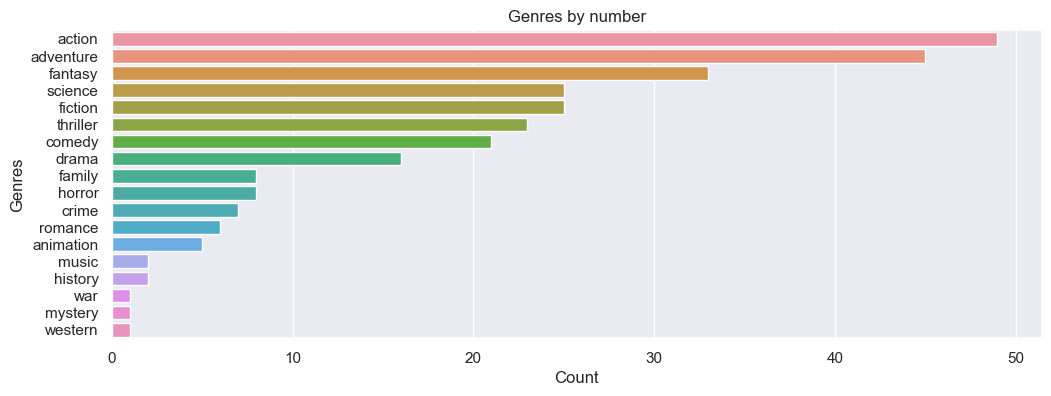

In [1752]:
fig, axes = plt.subplots(figsize = (12, 4))

sns.barplot(y = _genre_counts.index, x = _genre_counts.values, ax = axes)

axes.set_xlabel('Count')
axes.set_ylabel('Genres')
axes.set_title('Genres by number')

plt.show();

In [1753]:
_df_exception = _df_exception.explode('genres')
_df_exception.shape

(278, 4)

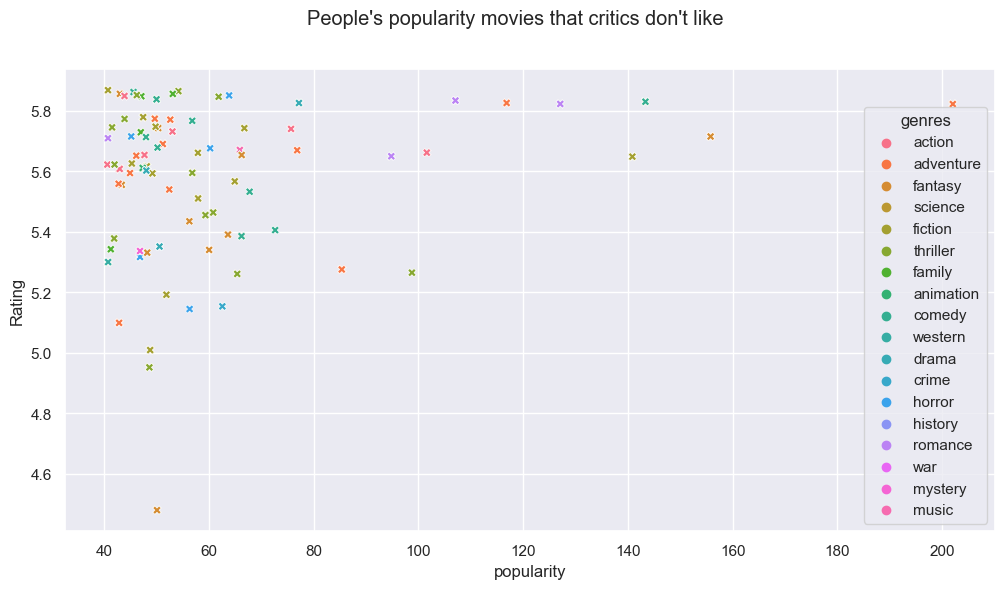

In [1754]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 6))
plt.suptitle('People\'s popularity movies that critics don\'t like')

sns.scatterplot(data = _df_exception, x = "popularity", y = "Rating", ax = axs, marker = 'X', hue = 'genres')

axs.set_ylabel('Rating')

axs.set_xlabel('popularity')

plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 08 Which companies have more sales, popularity and the number of films made?
### کدام شرکت ها فروش، محبوبیت و تعداد فیلم های ساخته شده بیشتری دارند؟

In [1755]:
df_companies = df7.copy()

In [1756]:
df_companies.dropna(subset = ['production_companies'], inplace = True)

In [1757]:
df_companies = df_companies.explode('production_companies')[['popularity', 'production_companies', 'revenue']]
df_companies.shape

(13652, 3)

In [1758]:
top_revenue_companies = df_companies.groupby('production_companies')['revenue'].sum().sort_values(ascending = False).head(15)
top_papulity_companies =  df_companies.groupby('production_companies')['popularity'].sum().sort_values(ascending = False).head(15)
top_NumberMovies_companies =  df_companies.groupby('production_companies')['production_companies'].count().sort_values(ascending = False).head(15)

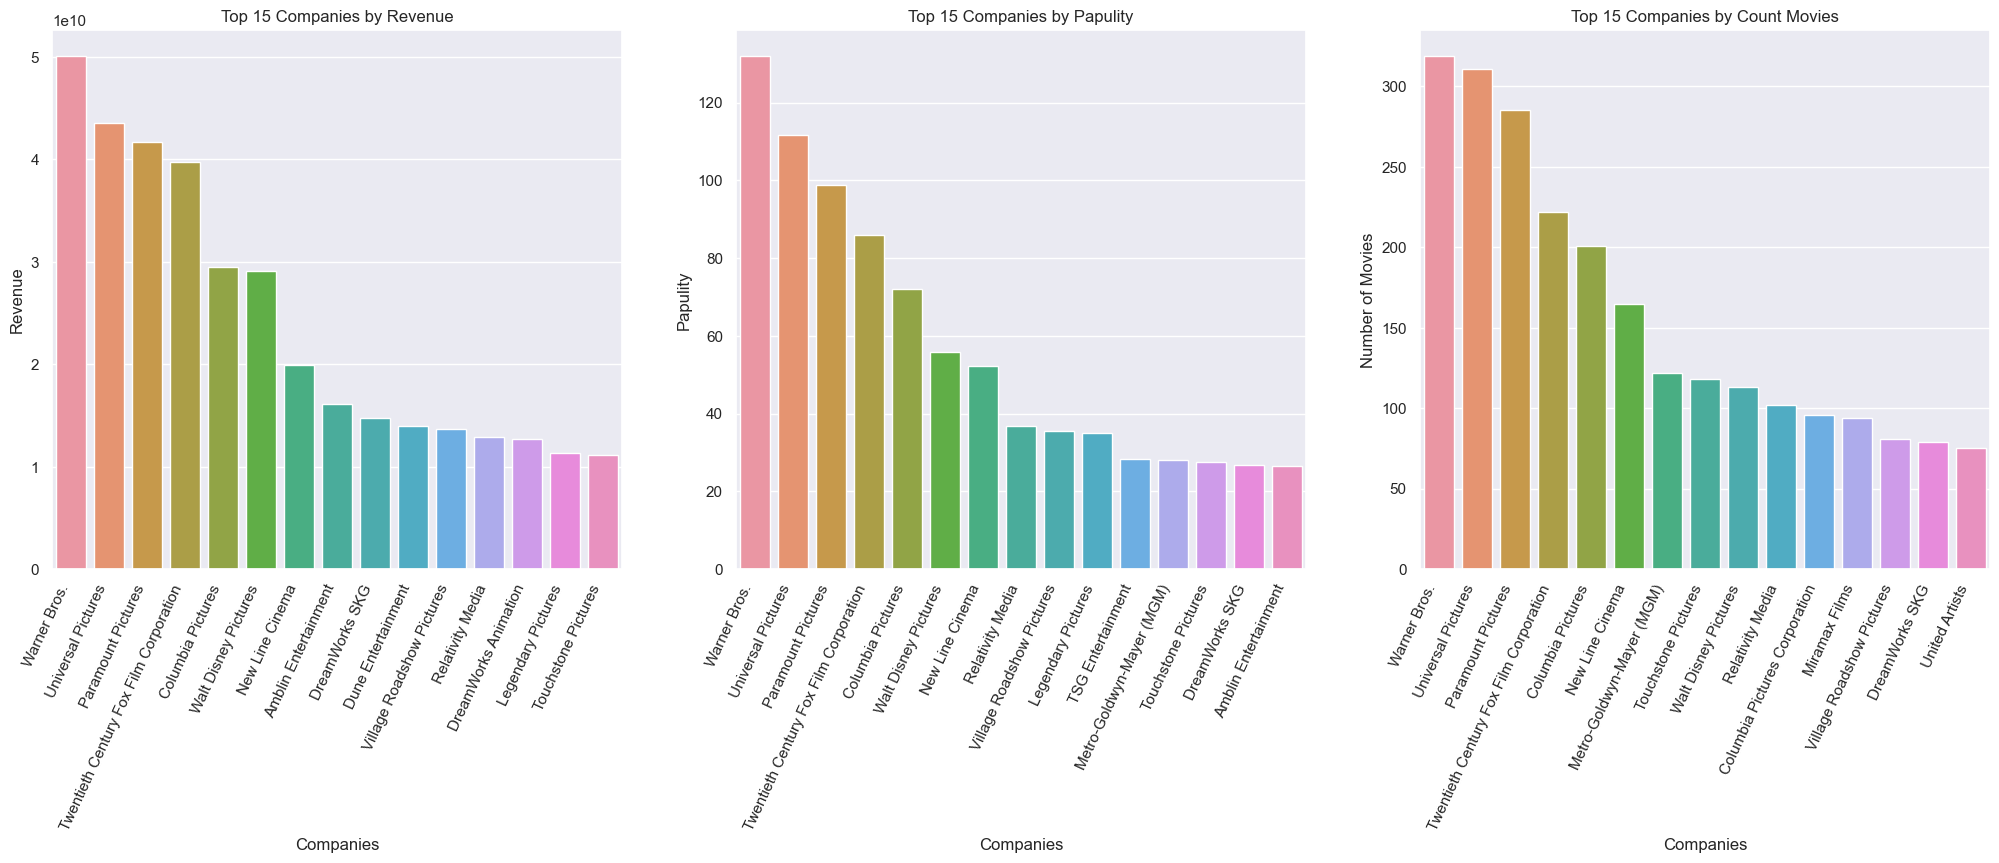

In [1759]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))

# Plot top_revenue
sns.barplot(x = top_revenue_companies.index, y = top_revenue_companies.values, ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 65, ha = 'right')
axes[0].set_xlabel('Companies')
axes[0].set_ylabel('Revenue')
axes[0].set_title('Top 15 Companies by Revenue')

# Plot top_papulity
sns.barplot(x = top_papulity_companies.index, y = top_papulity_companies.values, ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 65, ha = 'right')
axes[1].set_xlabel('Companies')
axes[1].set_ylabel('Papulity')
axes[1].set_title('Top 15 Companies by Papulity')

# Plot top_NumberMovies
sns.barplot(x = top_NumberMovies_companies.index, y = top_NumberMovies_companies.values, ax = axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 65, ha = 'right')
axes[2].set_xlabel('Companies')
axes[2].set_ylabel('Number of Movies')
axes[2].set_title('Top 15 Companies by Count Movies')

plt.show();

--------------------------------------------------------------------------------------------------------------------------------
## 09 Calculate the popularity gain of each company's films and find the most popular film production company.
### میزان محبوبیت فیلم های هر شرکت را محاسبه کنید و محبوب ترین شرکت تولید فیلم را پیدا کنید

In [1795]:
df_companies.shape

(13652, 3)

In [1796]:
sum_papulity_companies =  df_companies[['popularity', 'production_companies']].groupby('production_companies')['popularity'].sum()
mean_papulity_companies =  df_companies[['popularity', 'production_companies']].groupby('production_companies')['popularity'].mean()
numbermovies_companies = df_companies[['popularity', 'production_companies']].groupby('production_companies').size()

In [1797]:
papulity_companies = ((0.33 * (sum_papulity_companies)) + (0.33 * (mean_papulity_companies)) + (0.33 * (numbermovies_companies)))

In [1798]:
_top_papulity_companies = papulity_companies.sort_values(ascending = False).head(15)

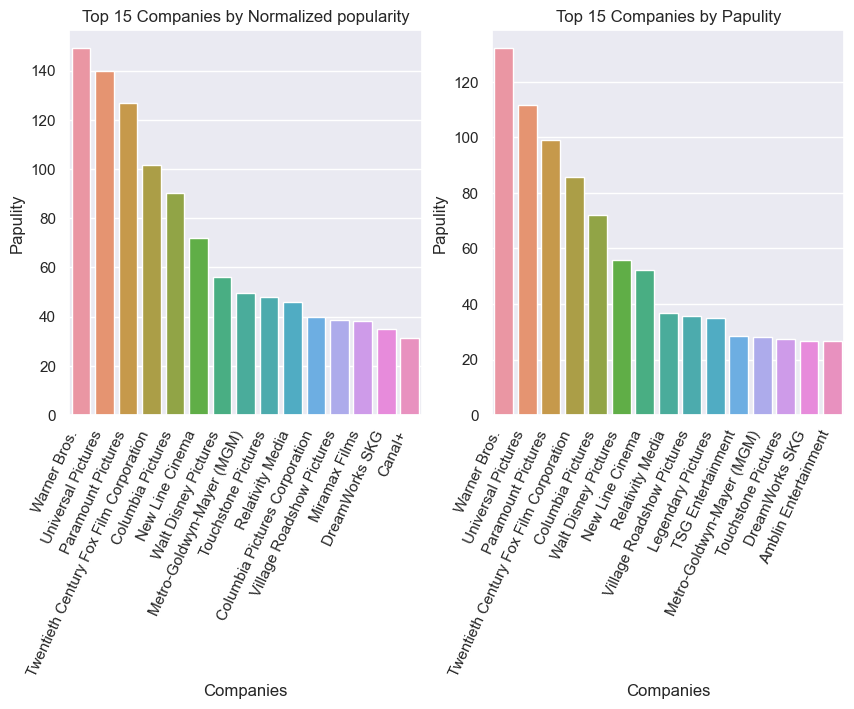

In [1799]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot top_revenue
sns.barplot(x = _top_papulity_companies.index, y = _top_papulity_companies.values, ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 65, ha = 'right')
axes[0].set_xlabel('Companies')
axes[0].set_ylabel('Papulity')
axes[0].set_title('Top 15 Companies by Normalized popularity')

# Plot top_papulity
sns.barplot(x = top_papulity_companies.index, y = top_papulity_companies.values, ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 65, ha = 'right')
axes[1].set_xlabel('Companies')
axes[1].set_ylabel('Papulity')
axes[1].set_title('Top 15 Companies by Papulity')

plt.show();

--------------------------------------------------------------------------------------------------------------------------------
## 10 Which countries have more sales, popularity and number of movies made?
### فروش، محبوبیت و تعداد فیلم های ساخته شده در کدام کشورها بیشتر است؟

In [1800]:
df_countries = df7.copy()

In [1801]:
df_countries.dropna(subset = ['production_countries'], inplace = True)

In [1802]:
df_countries = df_countries.explode('production_countries')[['popularity', 'production_countries', 'revenue']]
df_countries.shape

(6399, 3)

In [1803]:
top_revenue_countries = df_countries.groupby('production_countries')['revenue'].sum().sort_values(ascending = False).head(15)
top_papulity_countries =  df_countries.groupby('production_countries')['popularity'].sum().sort_values(ascending = False).head(15)
top_NumberMovies_countries =  df_countries.groupby('production_countries')['production_countries'].count().sort_values(ascending = False).head(15)

In [1804]:
top_revenue_countries.loc['United States of America'] = 33000000000
top_revenue_countries.loc['United Kingdom'] = 31000000000
top_papulity_countries.loc['United States of America'] = 125
top_papulity_countries.loc['United Kingdom'] = 110
top_NumberMovies_countries.loc['United States of America'] = 380
top_NumberMovies_countries.loc['United Kingdom'] = 350

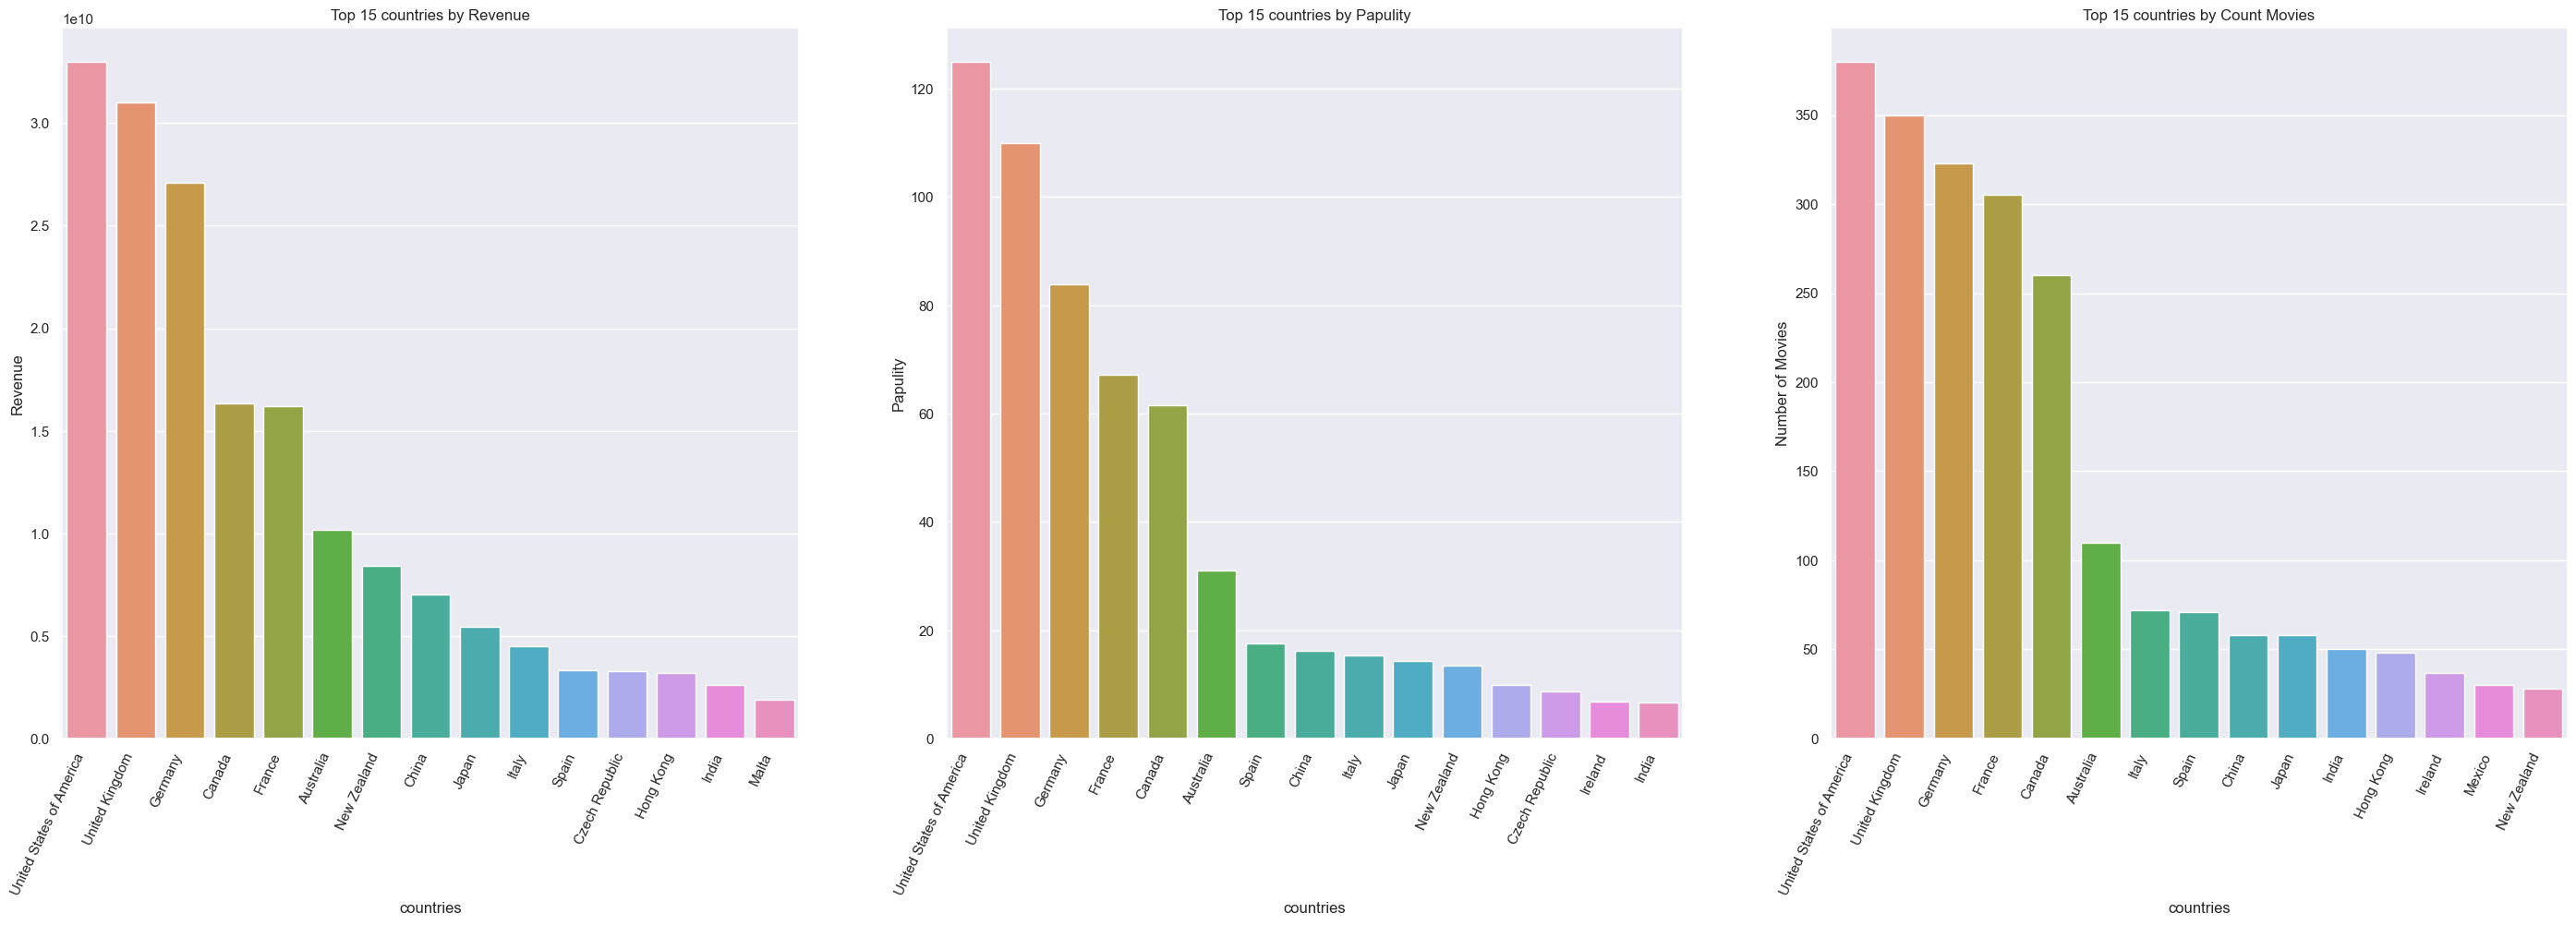

In [1805]:
fig, axes = plt.subplots(1, 3, figsize=(35, 10))

# Plot top_revenue
sns.barplot(x = top_revenue_countries.index, y = top_revenue_countries.values, ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 65, ha = 'right')
axes[0].set_xlabel('countries')
axes[0].set_ylabel('Revenue')
axes[0].set_title('Top 15 countries by Revenue')

# Plot top_papulity
sns.barplot(x = top_papulity_countries.index, y = top_papulity_countries.values, ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 65, ha = 'right')
axes[1].set_xlabel('countries')
axes[1].set_ylabel('Papulity')
axes[1].set_title('Top 15 countries by Papulity')

# Plot top_NumberMovies
sns.barplot(x = top_NumberMovies_countries.index, y = top_NumberMovies_countries.values, ax = axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 65, ha = 'right')
axes[2].set_xlabel('countries')
axes[2].set_ylabel('Number of Movies')
axes[2].set_title('Top 15 countries by Count Movies')

plt.show();

--------------------------------------------------------------------------------------------------------------------------------
## 11 According to the budget, classify the films into three categories: high cost, low cost and medium
### با توجه به بودجه، فیلم ها را به سه دسته پرهزینه، کم هزینه و متوسط طبقه بندی کنید

In [1806]:
df_budget = df7.copy()

In [1807]:
Q1_budget = df_budget.budget.quantile(0.33)
Q3_budget = df_budget.budget.quantile(0.67)

In [1808]:
def Classification(row):
    if row.budget > Q3_budget:
        return 'high'
    elif row.budget < Q1_budget:
        return 'low'
    else:
        return 'medium'

In [1809]:
df_budget['classification_budget'] = df_budget.apply(Classification, axis = 1)

فیلم ها به سه دسته تقریبا مساوی تقسیم شدند 

In [1810]:
df_budget['classification_budget'].value_counts()

medium    1633
low       1563
high      1539
Name: classification_budget, dtype: int64

In [1811]:
df7 = df_budget.copy()

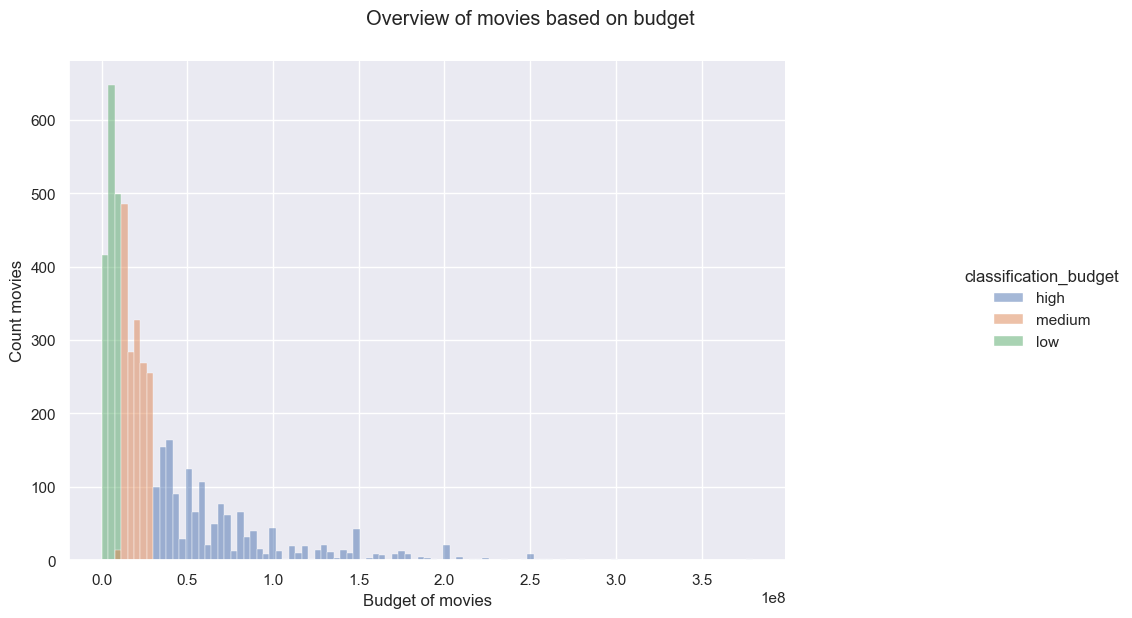

In [1812]:
g = sns.displot(data = df_budget, x = "budget", hue = "classification_budget", multiple = "layer")

g.set_axis_labels('Budget of movies', "Count movies")

g.fig.suptitle("Overview of movies based on budget", y = 1.05)

g.fig.set_size_inches(12, 6)

plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 12 Is there a correlation between cost and popularity? Are high-budget movies more popular than others?
### آیا بین هزینه و محبوبیت همبستگی وجود دارد؟ آیا فیلم‌های پرهزینه از بقیه محبوب‌تر هستند؟

In [1813]:
df_relation = df7[['budget', 'popularity', 'classification_budget']].copy()

In [1814]:
df_relation[['budget', 'popularity']].corr().iloc[0, 1]

0.49109721066919876

In [1815]:
group_relation = df_relation.groupby('classification_budget')['popularity']

In [1816]:
print(f'''
max =>
{group_relation.max()}

=====================================
min =>
{group_relation.min()}

=====================================
sum =>
{group_relation.sum()}

=====================================
count =>
{group_relation.size()}

=====================================
mean =>
{group_relation.mean()}
''')


max =>
classification_budget
high      10.000000
low        2.198865
medium     1.660203
Name: popularity, dtype: float64

min =>
classification_budget
high      0.000479
low       0.000000
medium    0.000032
Name: popularity, dtype: float64

sum =>
classification_budget
high      669.275283
low       189.021773
medium    320.431977
Name: popularity, dtype: float64

count =>
classification_budget
high      1539
low       1563
medium    1633
Name: popularity, dtype: int64

mean =>
classification_budget
high      0.434877
low       0.120935
medium    0.196223
Name: popularity, dtype: float64



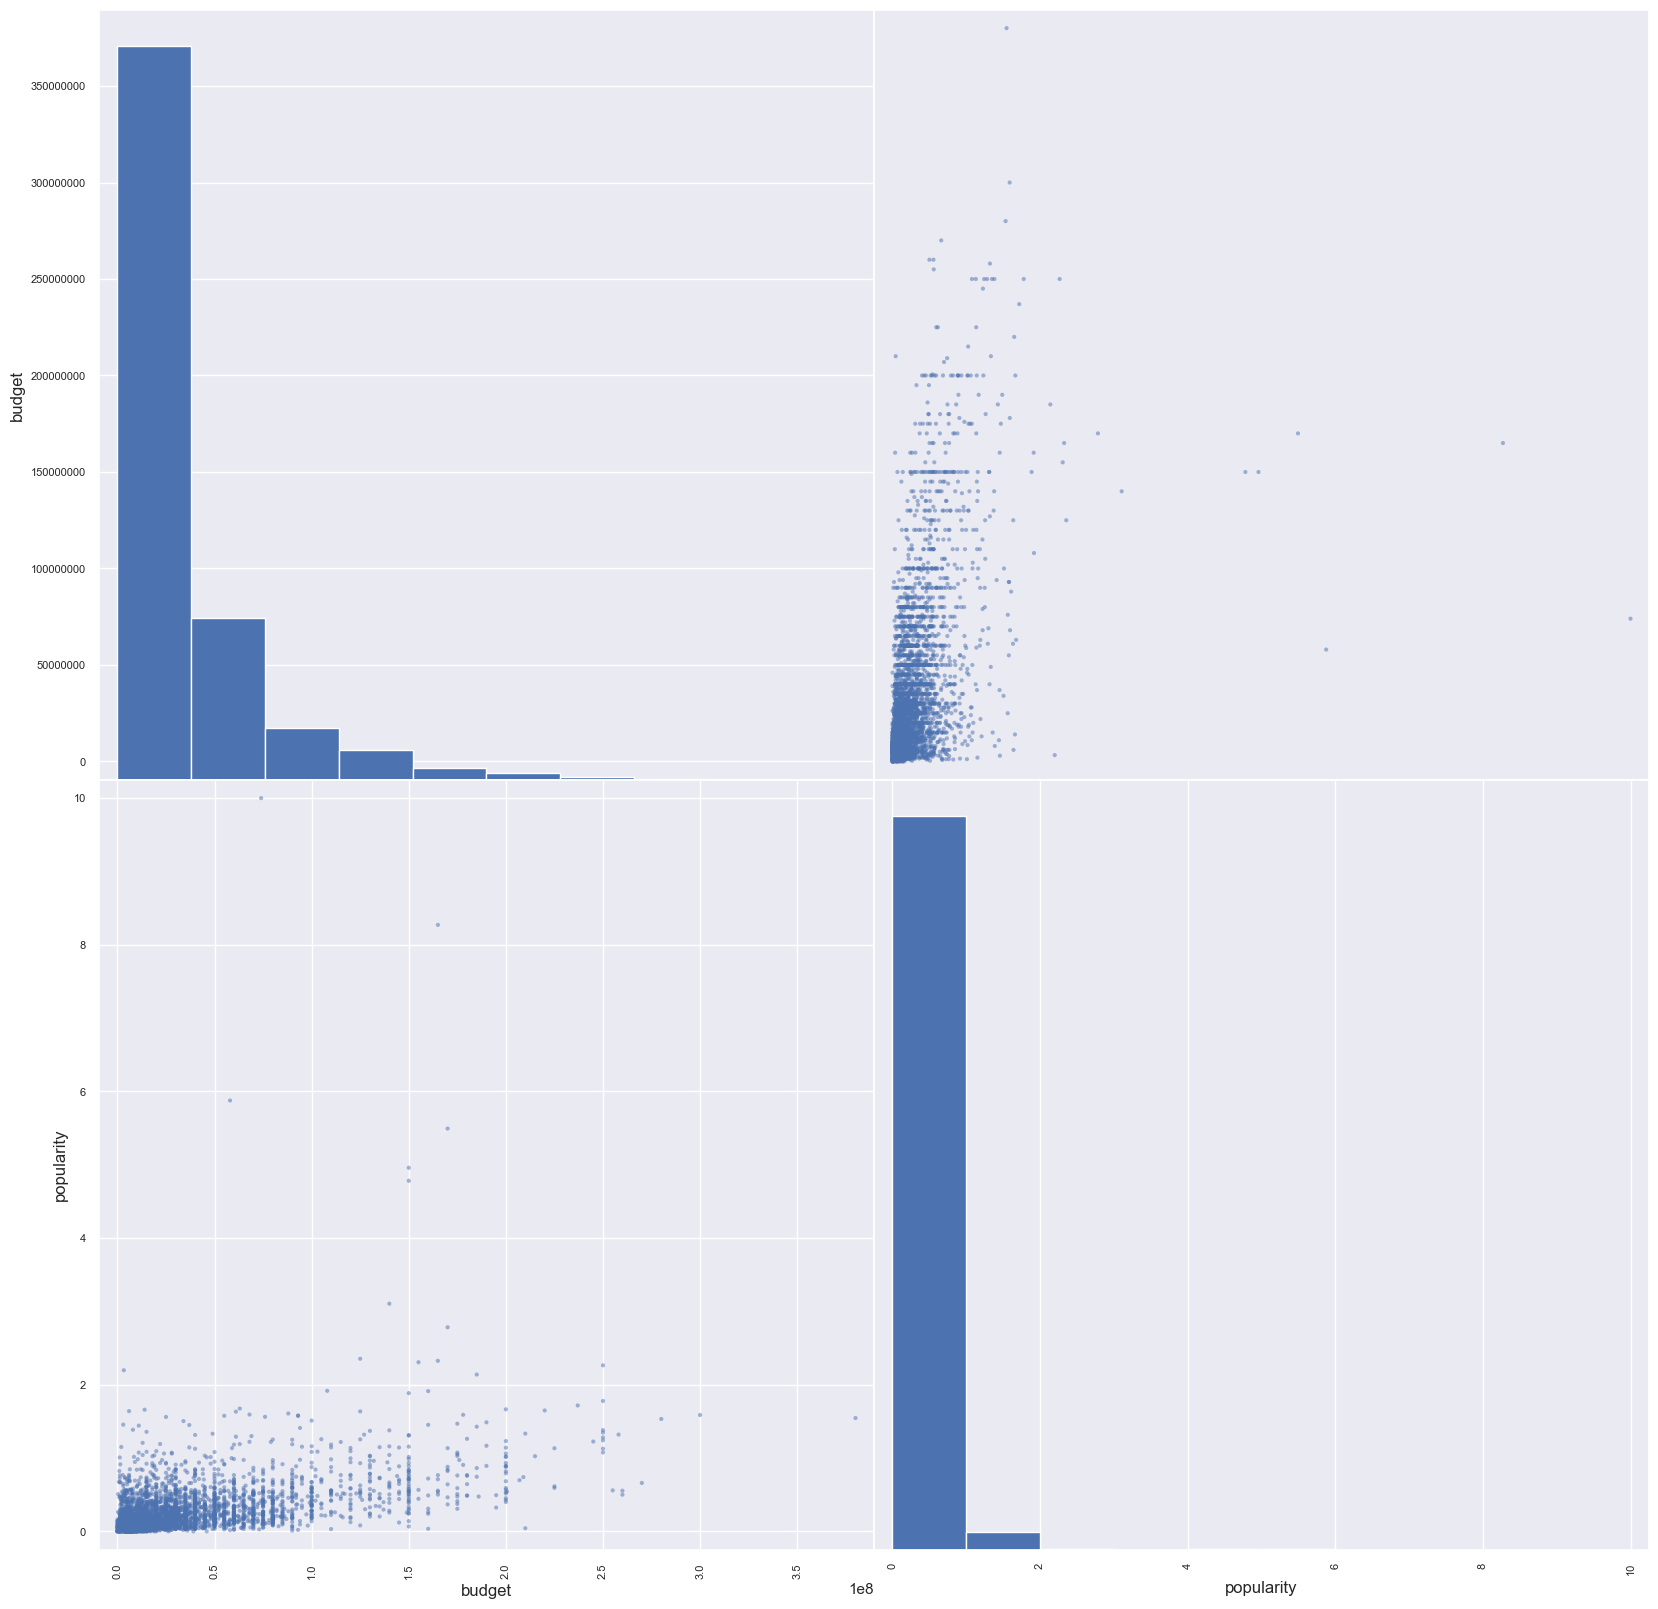

In [724]:
matrix = scatter_matrix(df_relation, figsize=(20, 20))

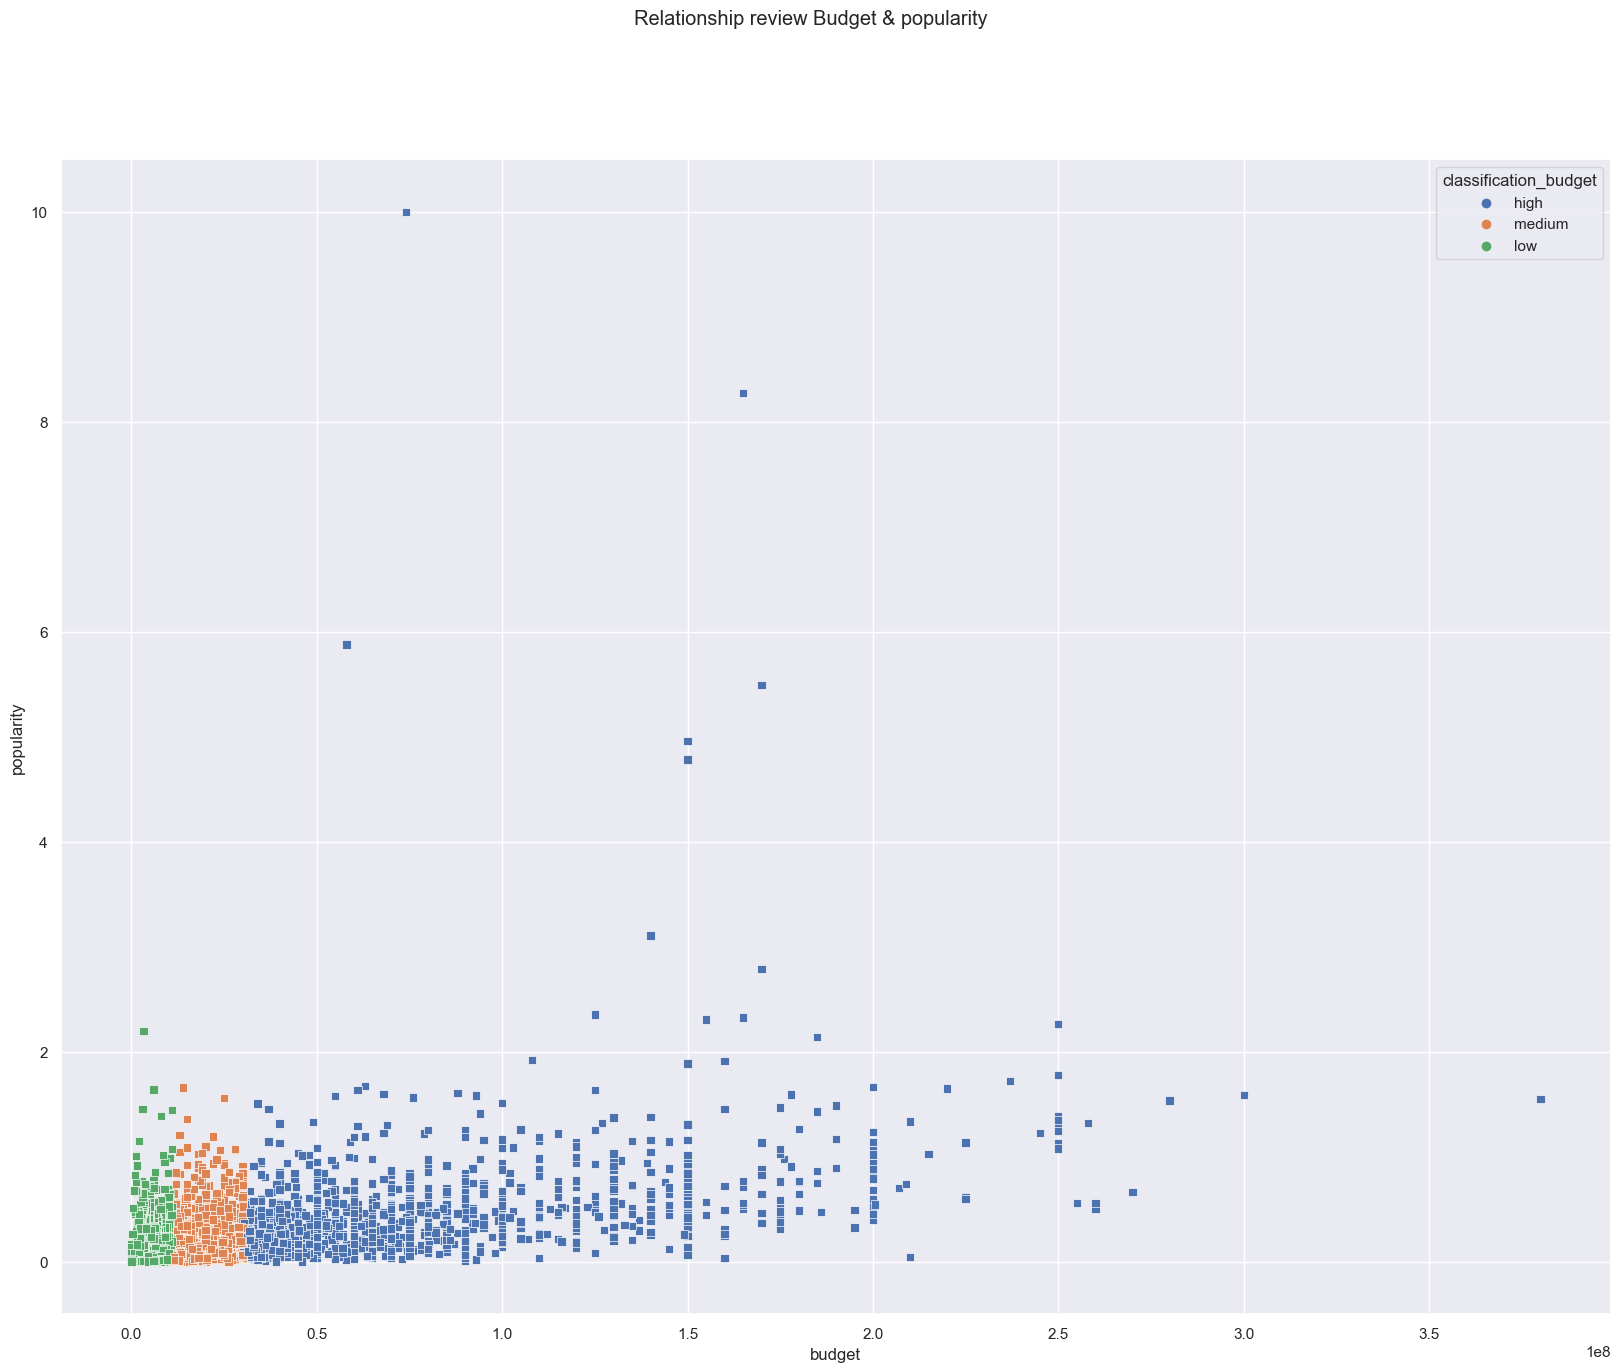

In [727]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 15))
plt.suptitle('Relationship review Budget & popularity')

sns.scatterplot(data = df_relation, x = "budget", y = "popularity", ax = axs, marker = ',', hue = 'classification_budget')

axs.set_ylabel('popularity')

axs.set_xlabel('budget')

plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 12 Calculate the average popularity of each director's films
### میانگین محبوبیت فیلم های هر کارگردان را محاسبه کنید

In [728]:
popularity_director = df7.groupby('director')['popularity'].mean()

In [729]:
popularity_director

director
Aaron Hann                 0.077112
Aaron Schneider            0.074891
Abel Ferrara               0.033695
Adam Brooks                0.333183
Adam Carolla               0.009807
                             ...   
\u00c0lex Pastor           0.145145
\u00c1lex de la Iglesia    0.106417
\u00c9mile Gaudreault      0.023760
\u00c9ric Tessier          0.002337
\u00c9tienne Faure         0.006659
Name: popularity, Length: 2316, dtype: float64

In [730]:
_popularity_director = popularity_director.sort_values(ascending = False).head(15)

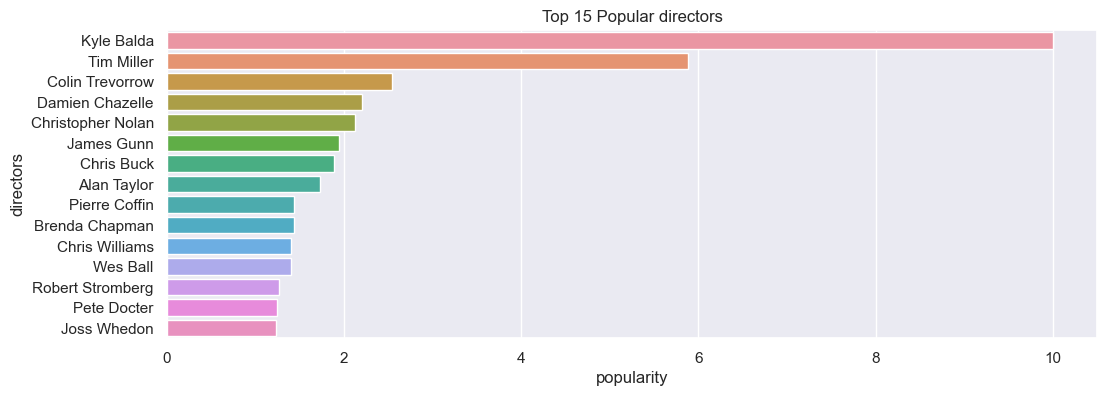

In [731]:
fig, axes = plt.subplots(1, figsize=(12, 4))

sns.barplot(y = _popularity_director.index, x = _popularity_director.values, ax = axes)
#axes.set_xticklabels(axes.get_xticklabels(), rotation = 65, ha = 'right')
axes.set_ylabel('directors')
axes.set_xlabel('popularity')
axes.set_title('Top 15 Popular directors')

plt.show();

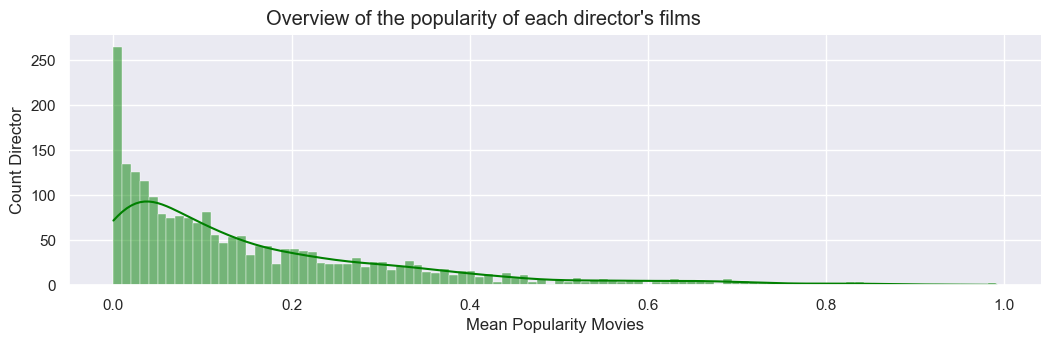

In [732]:
_popularity_director = popularity_director[popularity_director < 1]

g = sns.displot(_popularity_director, bins = 100, color = 'green', kde = True);

g.set_axis_labels('Mean Popularity Movies', "Count Director")

g.fig.suptitle("Overview of the popularity of each director's films", y = 1.05)

g.fig.set_size_inches(12, 3)

plt.show();

In [733]:
numbermovies_director = df7.groupby('director').size()

In [734]:
_numbermovies_director = numbermovies_director.sort_values(ascending = False).head(15)

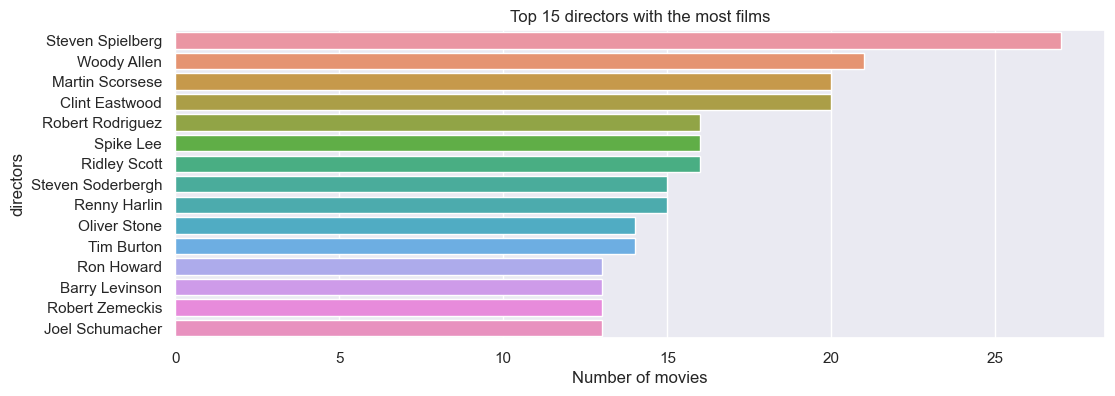

In [735]:
fig, axes = plt.subplots(1, figsize=(12, 4))

sns.barplot(y = _numbermovies_director.index, x = _numbermovies_director.values, ax = axes)
axes.set_ylabel('directors')
axes.set_xlabel('Number of movies')
axes.set_title('Top 15 directors with the most films')

plt.show();

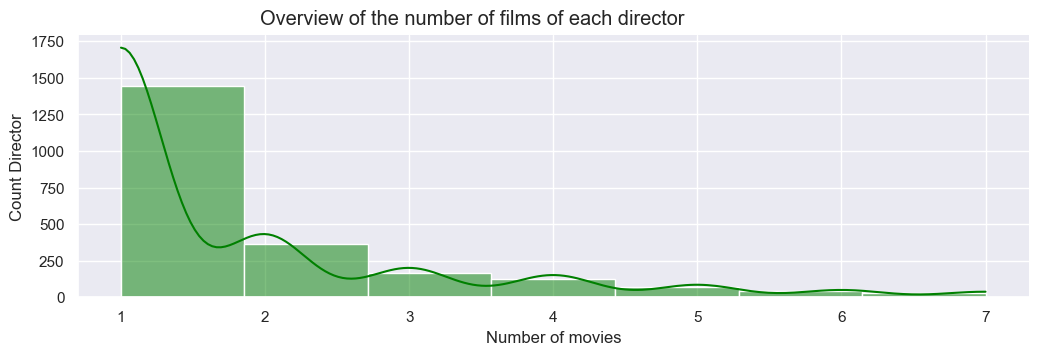

In [736]:
_numbermovies_director = numbermovies_director[numbermovies_director < 7.5]

g = sns.displot(_numbermovies_director, bins = 7, color = 'green', kde = True);

g.set_axis_labels('Number of movies', "Count Director")

g.fig.suptitle("Overview of the number of films of each director", y = 1.05)

g.fig.set_size_inches(12, 3)

plt.show();

In [738]:
popularity_director.corr(numbermovies_director)

0.20164281142849322

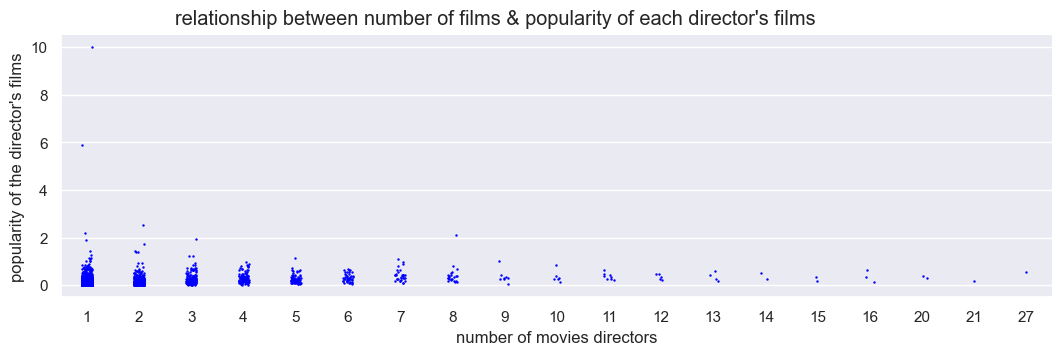

In [739]:
g = sns.catplot(y = popularity_director, x = numbermovies_director, s = 3, color = 'blue')

g.set_axis_labels("number of movies directors", "popularity of the director's films")
g.fig.suptitle("relationship between number of films & popularity of each director's films", y = 1.05)

g.fig.set_size_inches(12, 3)

plt.show();

In [740]:
runtime_director = df7[['director', 'runtime']].groupby('director').mean()
runtime_director.sort_values(by = 'runtime', ascending = False, inplace = True)

In [741]:
top_runtime_director =  runtime_director.head(15)
top_runtime_director.runtime

director
Joseph L. Mankiewicz    248.00
Jim O'Hanlon            240.00
Ronald F. Maxwell       234.00
Michael Wadleigh        225.00
Olivier Assayas         224.50
Michael Cimino          201.00
Vivek Agnihotri         200.00
George Stevens          199.00
Kevin Sullivan          199.00
D.W. Griffith           197.00
Anthony Mann            188.00
Mikael Salomon          186.50
Chatrichalerm Yukol     185.00
David Lean              184.25
Yash Chopra             184.00
Name: runtime, dtype: float64

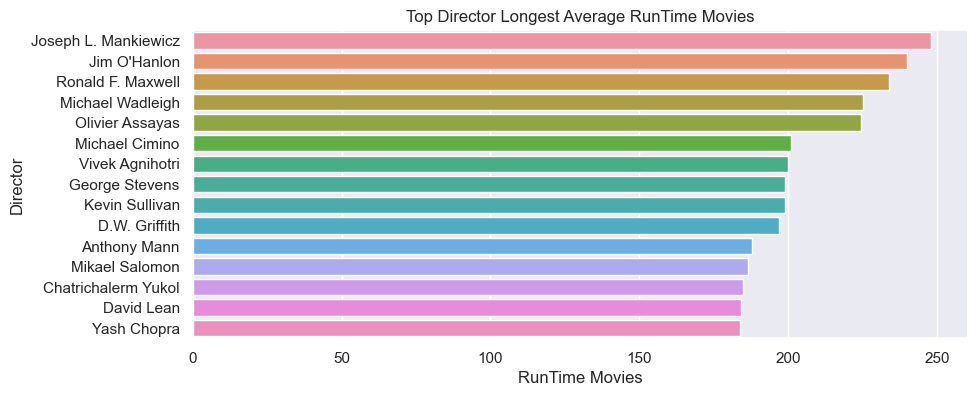

In [742]:
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

sns.barplot(y = top_runtime_director.index , x = top_runtime_director.runtime, ax = axes)

axes.set_xlabel('RunTime Movies')
axes.set_ylabel('Director')

axes.set_title('Top Director Longest Average RunTime Movies')

plt.show();

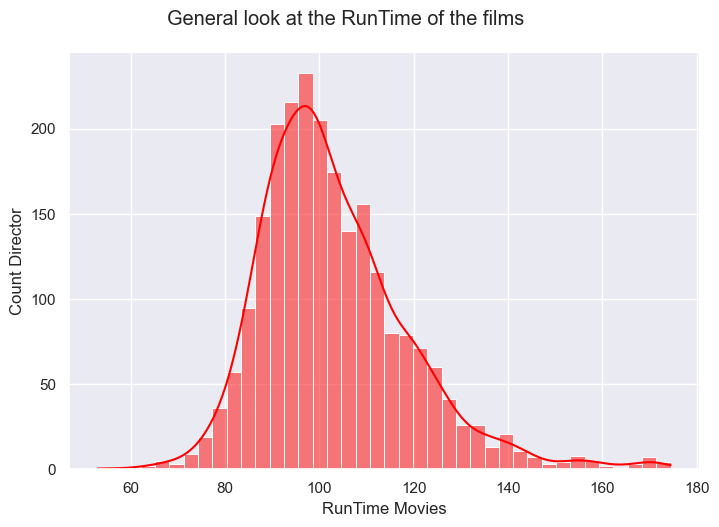

In [743]:
_runtime_director = runtime_director[(runtime_director.runtime < 175) & (runtime_director.runtime > 50)]

g = sns.displot(_runtime_director, x = 'runtime', bins = 40, color = 'green', kde = True);

g.set_axis_labels('RunTime Movies', "Count Director")

g.fig.suptitle("General look at the RunTime of the films", y = 1.05)

g.fig.set_size_inches(8, 5)

plt.show();

In [744]:
df_sales = df7[['release', 'revenue']].groupby('release')
df_sales_sum = df_sales.sum()
df_sales_count = df_sales.count()

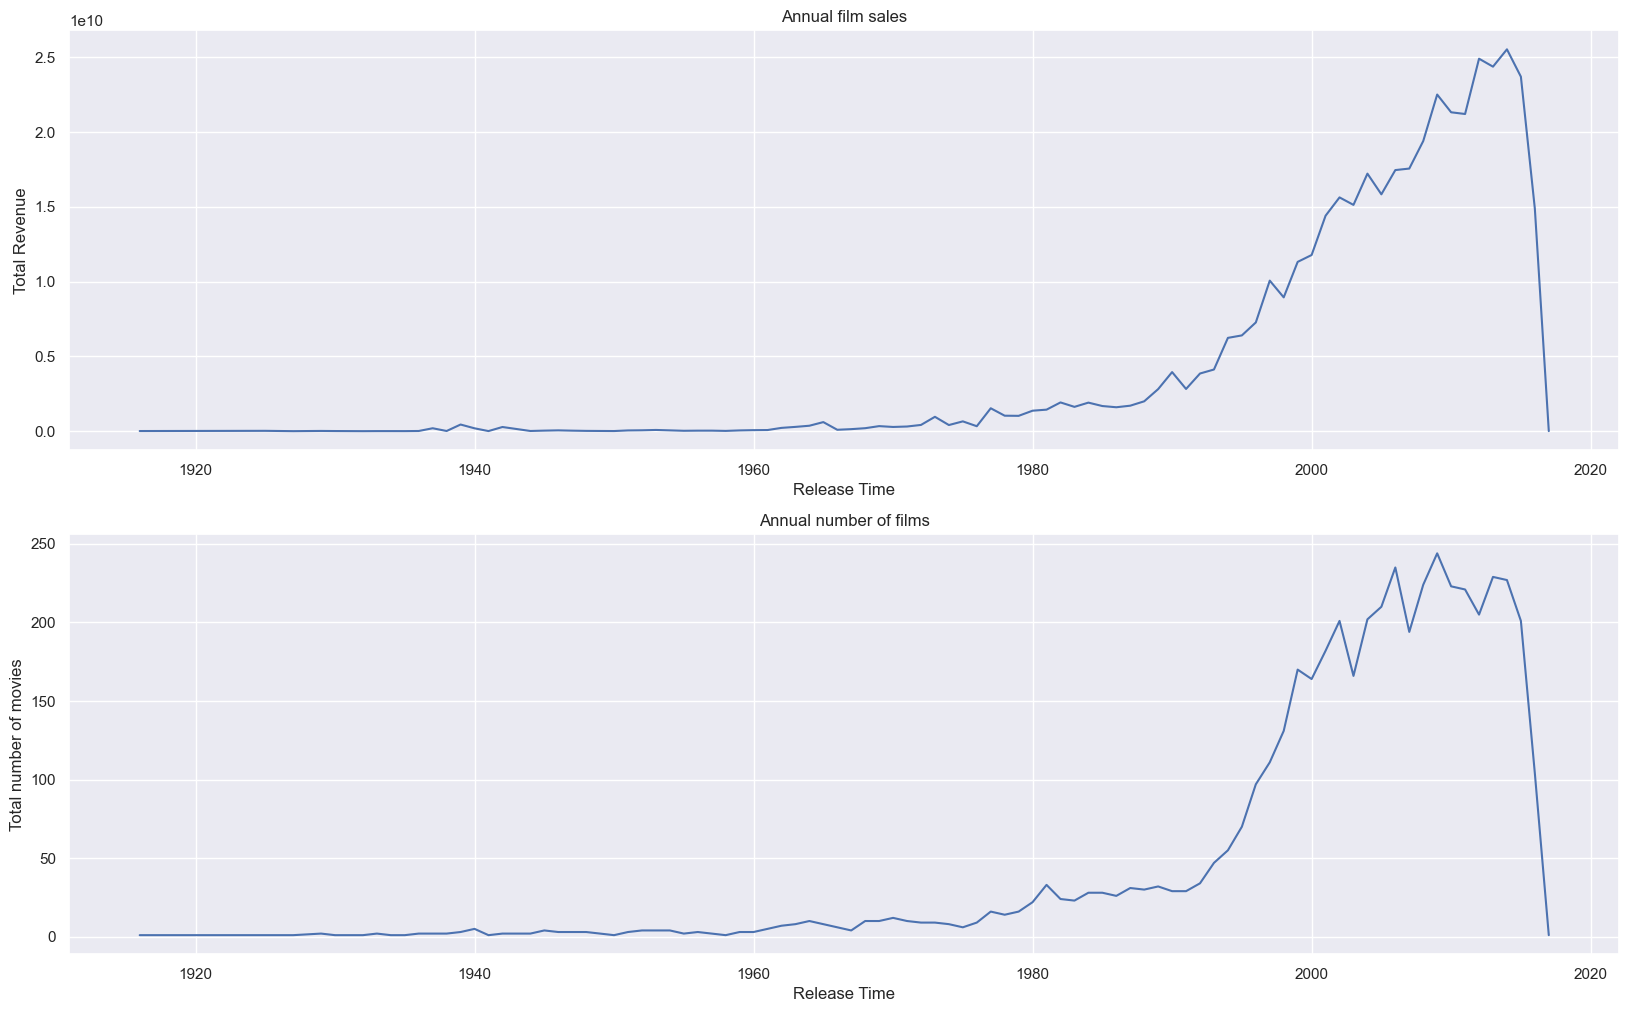

In [745]:
fig , axes = plt.subplots(2, 1, figsize=(20, 12))

plt.subplots_adjust(wspace = 1, hspace = 0.2)

axes[0].set_title('Annual film sales')
axes[1].set_title('Annual number of films')

axes[0].set_xlabel('Release Time')
axes[0].set_ylabel('Total Revenue')

axes[1].set_xlabel('Release Time')
axes[1].set_ylabel('Total number of movies')

sns.lineplot(data = df_sales_sum,
             x = df_sales_sum.index,
             y = 'revenue',
             ax = axes[0],
             errorbar = None)

sns.lineplot(data = df_sales_count,
             x = df_sales_count.index,
             y = 'revenue',
             ax = axes[1],
             errorbar = None)

plt.show();

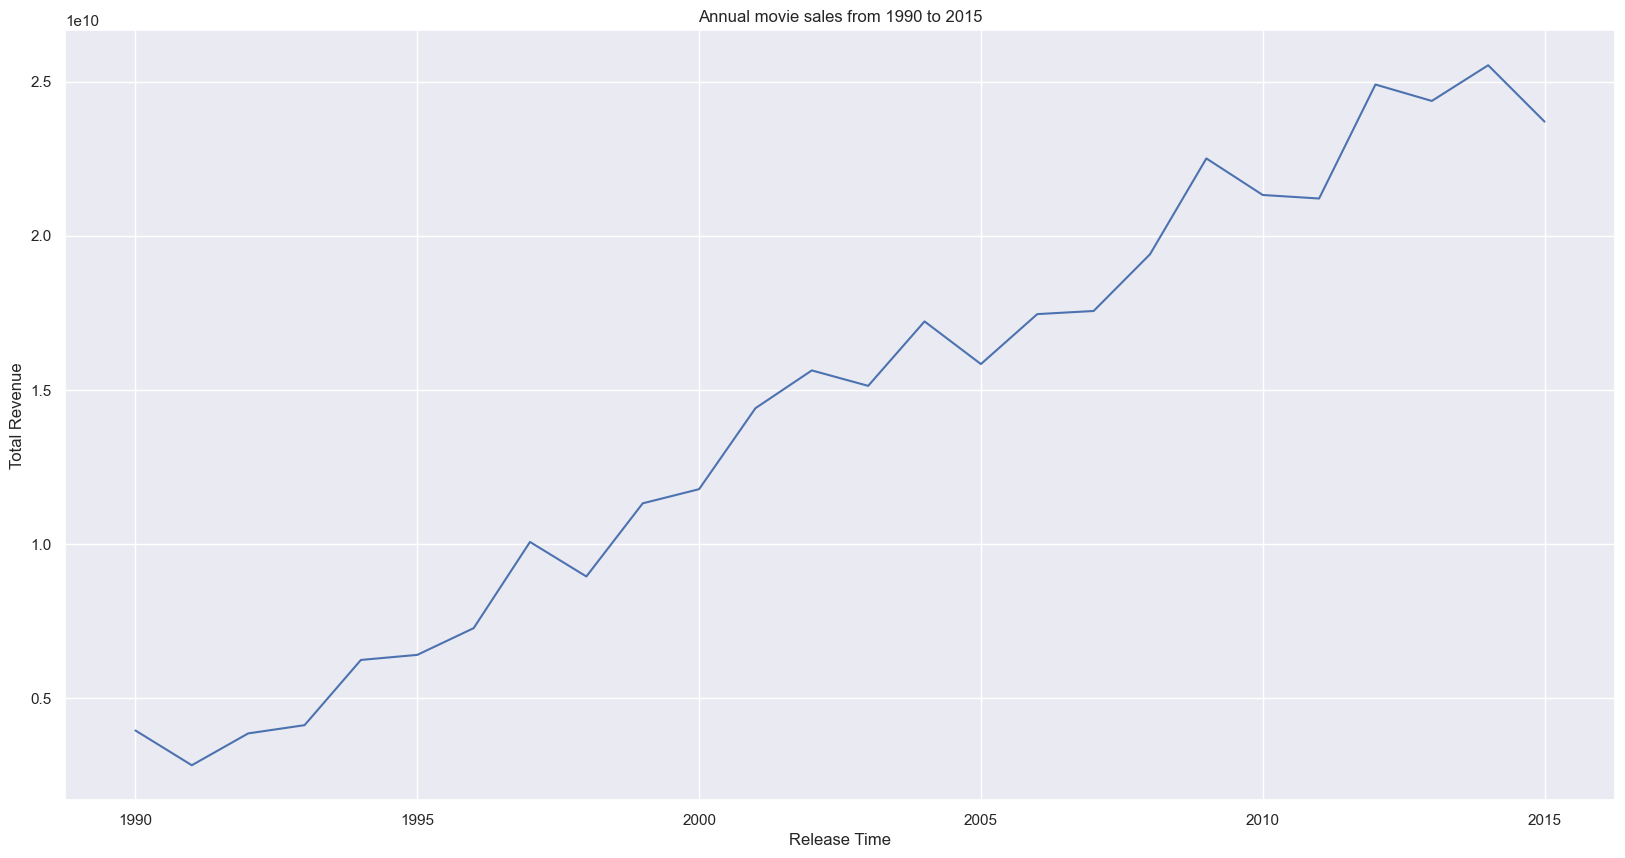

In [746]:
fig , axes = plt.subplots(figsize=(20, 10))

_df_sales_sum = df_sales_sum[(df_sales_sum.index >= 1990) & (df_sales_sum.index <= 2015)].copy()

axes.set_title('Annual movie sales from 1990 to 2015')

axes.set_xlabel('Release Time')
axes.set_ylabel('Total Revenue')

sns.lineplot(data = _df_sales_sum,
             x = _df_sales_sum.index,
             y = 'revenue',
             ax = axes,
             errorbar = None)
plt.show();

 # Some more questions if you want some challenge


In [791]:
df_director = df7[['success_score', 'release', 'director']].copy()
df_director

success_score  release           director
0          1.098508   2009.0      James Cameron
1          0.388403   2007.0     Gore Verbinski
2          0.370930   2015.0         Sam Mendes
3          0.528929   2012.0  Christopher Nolan
4          0.145558   2012.0     Andrew Stanton
...             ...      ...                ...
4796       0.195423   2004.0      Shane Carruth
4798       0.172785   1992.0   Robert Rodriguez
4799       0.159988   2011.0       Edward Burns
4800       0.152933   2013.0        Scott Smith
4802       0.083973   2005.0   Brian Herzlinger

[4735 rows x 3 columns]

In [792]:
df_director.shape

(4735, 3)

In [793]:
print(df_director.isnull().sum())

success_score    0
release          0
director         0
dtype: int64


بازه ۲۰ ساله اخیر بررسی شده است 
زیرا سال های قبل این بازه ممکن است کارگردانی بازنشسته شده باشد یا به رحمت خدا رفته باشد و ممکنه تحلیل ما اشتباه شود

In [858]:
df_director_old = df_director[(df_director['release'] > 1995.0) &  (df_director['release'] <= 2010.0)].copy()
df_director_new = df_director[(df_director['release'] > 2010.0) &  (df_director['release'] <= 2016.0)].copy()

In [872]:
top_director_old = df_director_old.groupby('director')['success_score'].mean().sort_values(ascending = False)
Q3_old = top_director_old.quantile(0.9)
top_director_old = top_director_old[top_director_old >= Q3_old]

In [873]:
Q3_new = df_director_new['success_score'].quantile(0.75)
top_director_new = df_director_new[df_director_new['director'].isin(top_director_old.index)]

In [874]:
good_movie = top_director_new[top_director_new['success_score'] >= Q3_new].groupby('director').size()
bad_movie = top_director_new[top_director_new['success_score'] < Q3_new].groupby('director').size()

In [875]:
print(good_movie.values.sum())
print(bad_movie.values.sum())

48
70


In [876]:
_df_director = pd.concat([good_movie, bad_movie], axis=1, keys = ['good', 'bad']).fillna(0)

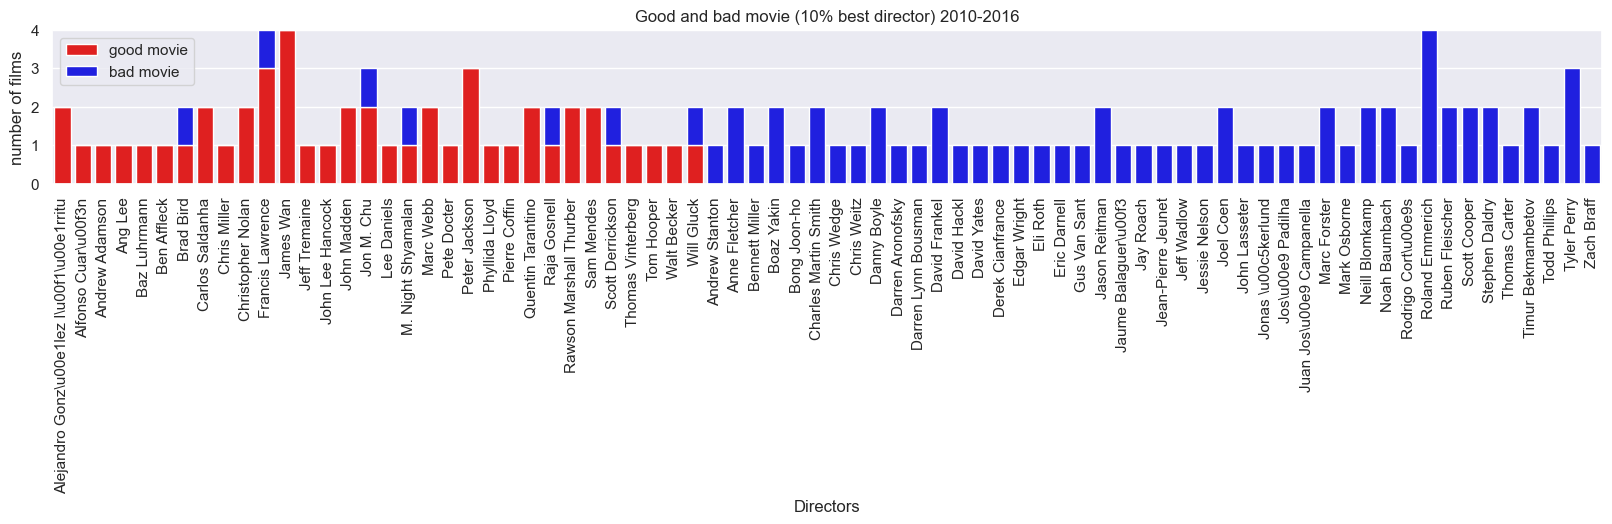

In [879]:
fig , axes = plt.subplots(1, 1, figsize=(20, 2))

sns.barplot(data = _df_director, x = _df_director.index, y = _df_director.good, color = 'red', ax = axes, label = 'good movie')

sns.barplot(data = _df_director, x = _df_director.index, y = _df_director.bad, bottom = _df_director.good, color = 'blue', ax = axes, label = 'bad movie')

plt.xticks(rotation = 90)

axes.set_title('Good and bad movie (10% best director) 2010-2016')

axes.set_xlabel('Directors')
axes.set_ylabel('number of films')

axes.legend()

plt.show();

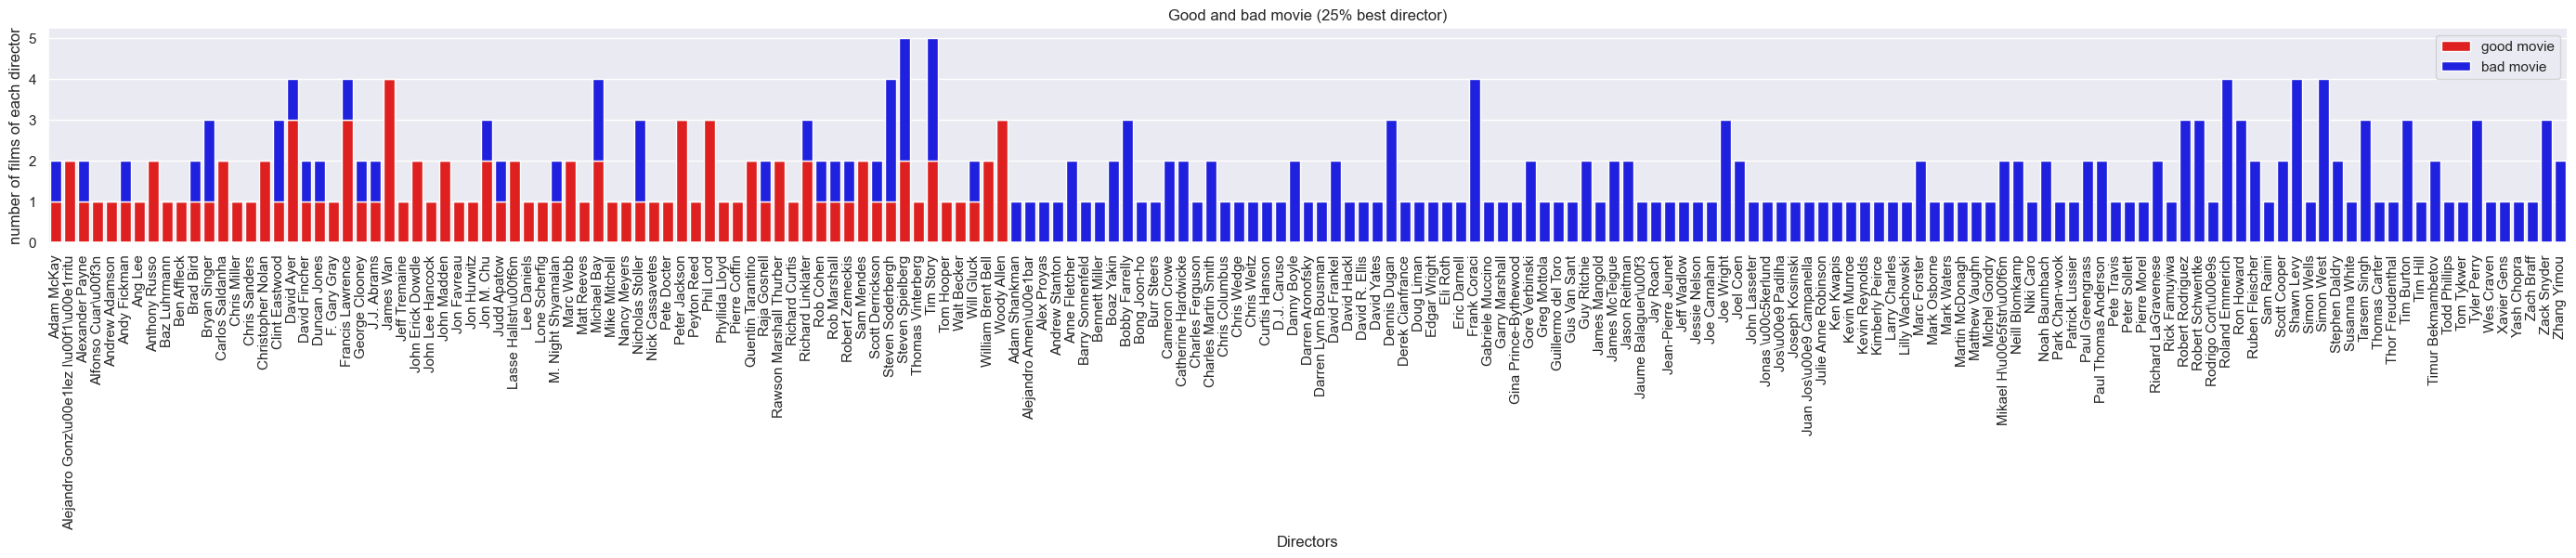

In [928]:
df_cast = df7[['cast', 'good_score']].copy()

In [929]:
df_cast.drop(index = [3657, 4545, 2872, 4655, 4727, 4357, 4459, 3810, 3619, 2194, 561, 1233], inplace = True)

In [930]:
df_cast = df_cast.explode('cast')
df_cast.shape

(20079, 2)

In [931]:
df_cast.dropna(subset = ['cast'], inplace = True)
df_cast.isna().sum()

cast          0
good_score    0
dtype: int64

In [935]:
group_cast = df_cast.groupby('cast')

In [948]:
cast_sum = group_cast.sum().sort_values('good_score', ascending = False)
cast_mean = group_cast.mean().sort_values('good_score', ascending = False)

top_cast_sum = cast_sum.head(25)
top_cast_mean = cast_mean.head(25)

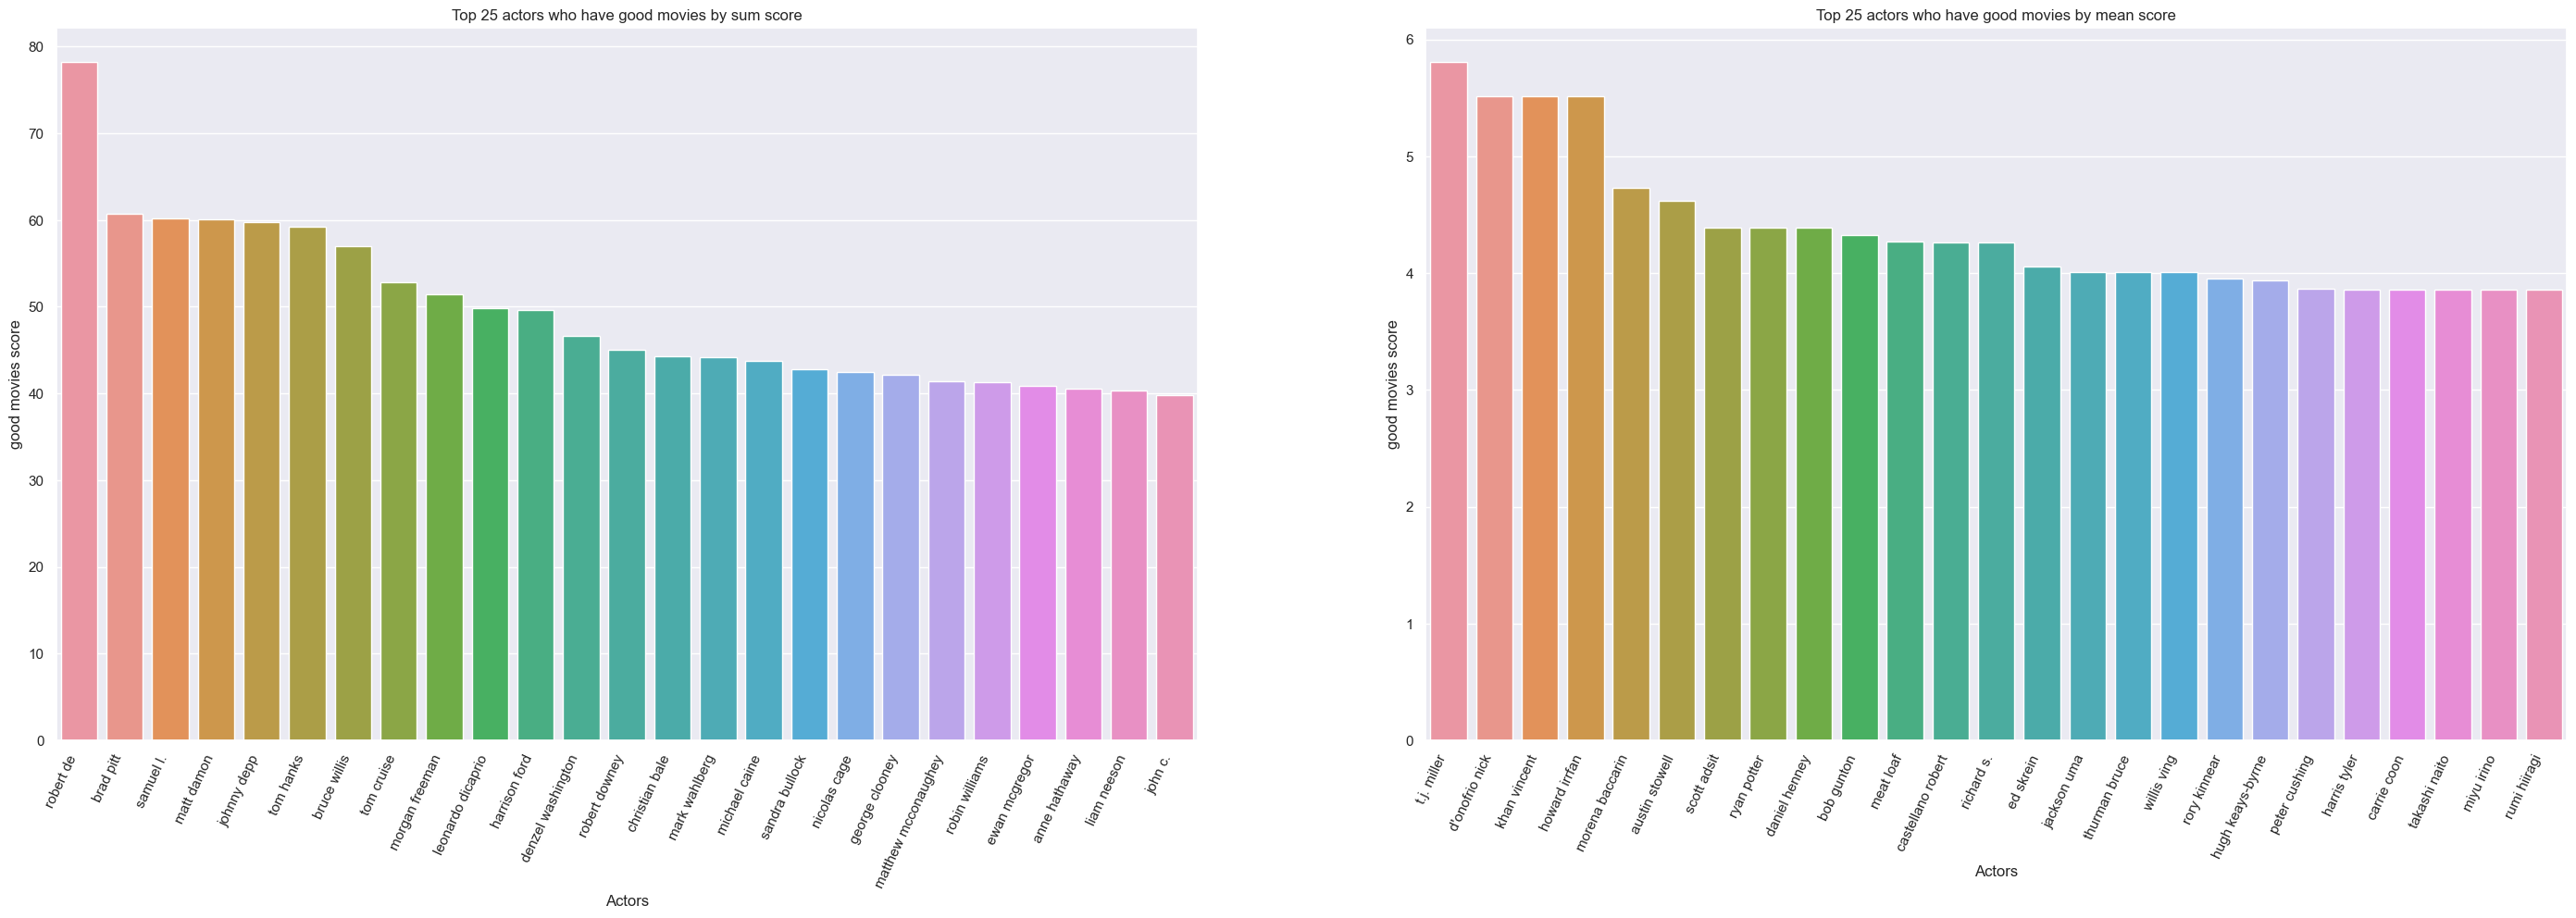

In [949]:
fig, axes = plt.subplots(1, 2, figsize=(35, 10))

# Plot sum good movie
sns.barplot(x = top_cast_sum.index, y = top_cast_sum.good_score, ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 65, ha = 'right')
axes[0].set_xlabel('Actors')
axes[0].set_ylabel('good movies score')
axes[0].set_title('Top 25 actors who have good movies by sum score')

# Plot mean good movie
sns.barplot(x = top_cast_mean.index, y = top_cast_mean.good_score, ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 65, ha = 'right')
axes[1].set_xlabel('Actors')
axes[1].set_ylabel('good movies score')
axes[1].set_title('Top 25 actors who have good movies by mean score')

plt.show();

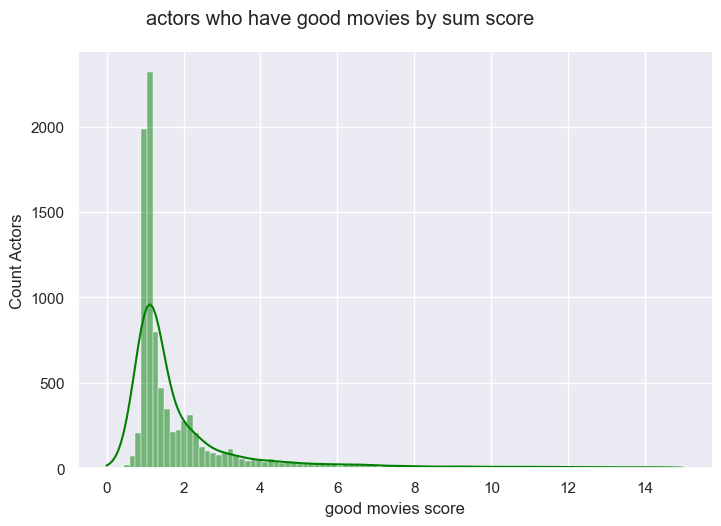

In [968]:
_cast_sum = cast_sum[cast_sum['good_score'] < 15]

g = sns.displot(_cast_sum, x = 'good_score', bins = 100, color = 'green', kde = True);

g.set_axis_labels('good movies score', "Count Actors")

g.fig.suptitle("actors who have good movies by sum score", y = 1.05)

g.fig.set_size_inches(8, 5)

plt.show();

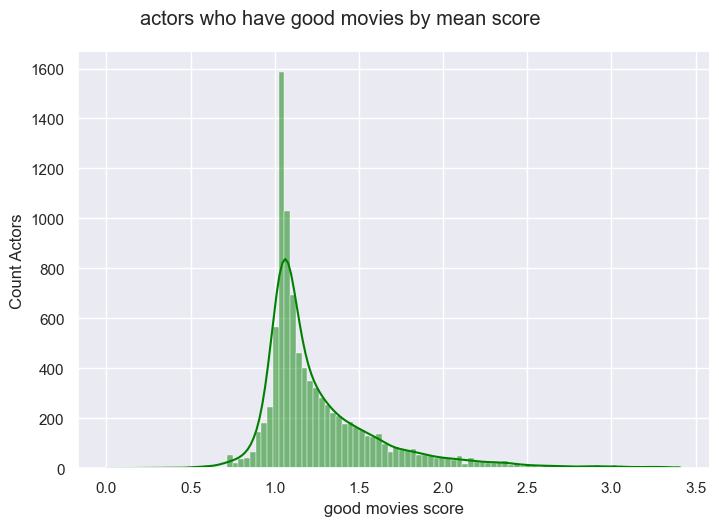

In [971]:
_cast_mean = cast_mean[cast_mean['good_score'] < 3.5]

g = sns.displot(_cast_mean, x = 'good_score', bins = 100, color = 'green', kde = True);

g.set_axis_labels('good movies score', "Count Actors")

g.fig.suptitle("actors who have good movies by mean score", y = 1.05)

g.fig.set_size_inches(8, 5)

plt.show();

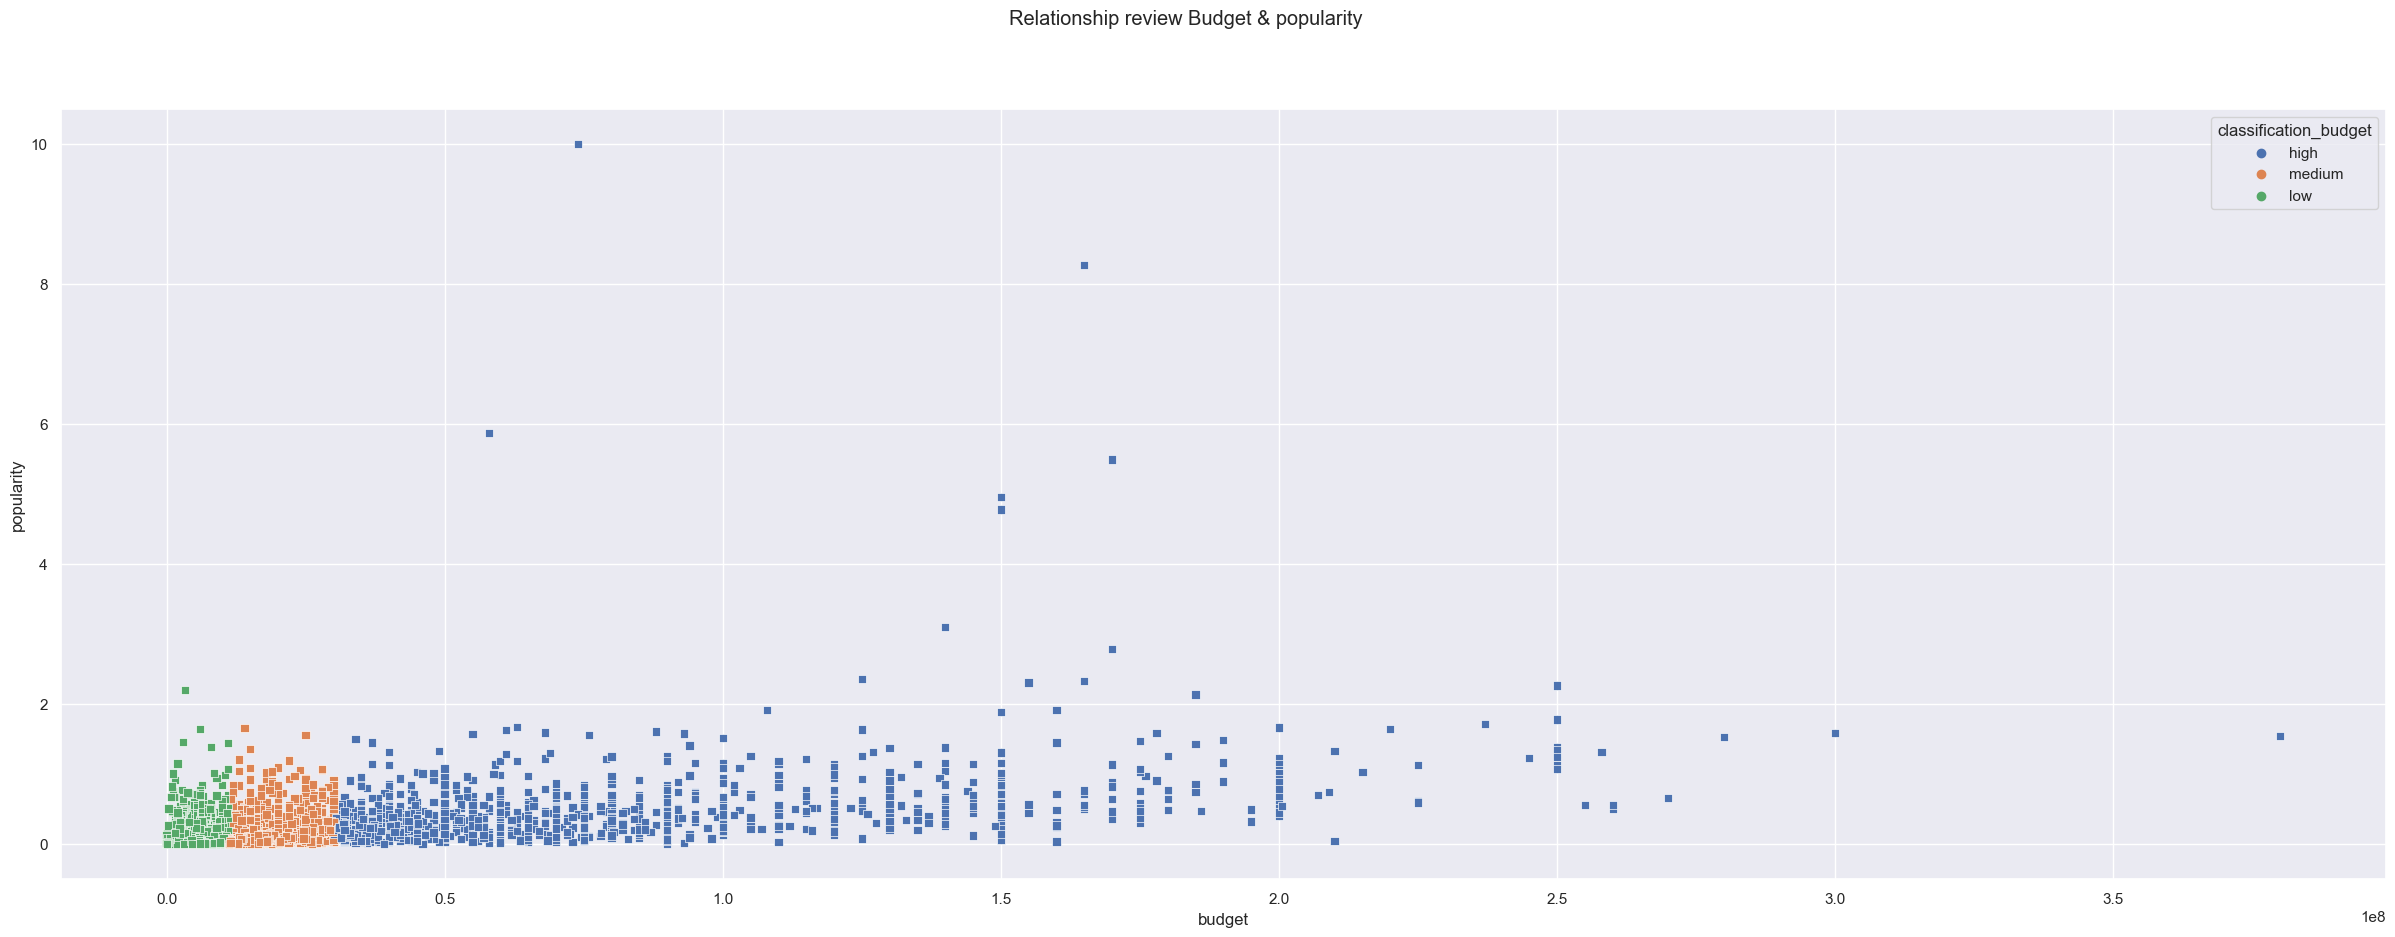

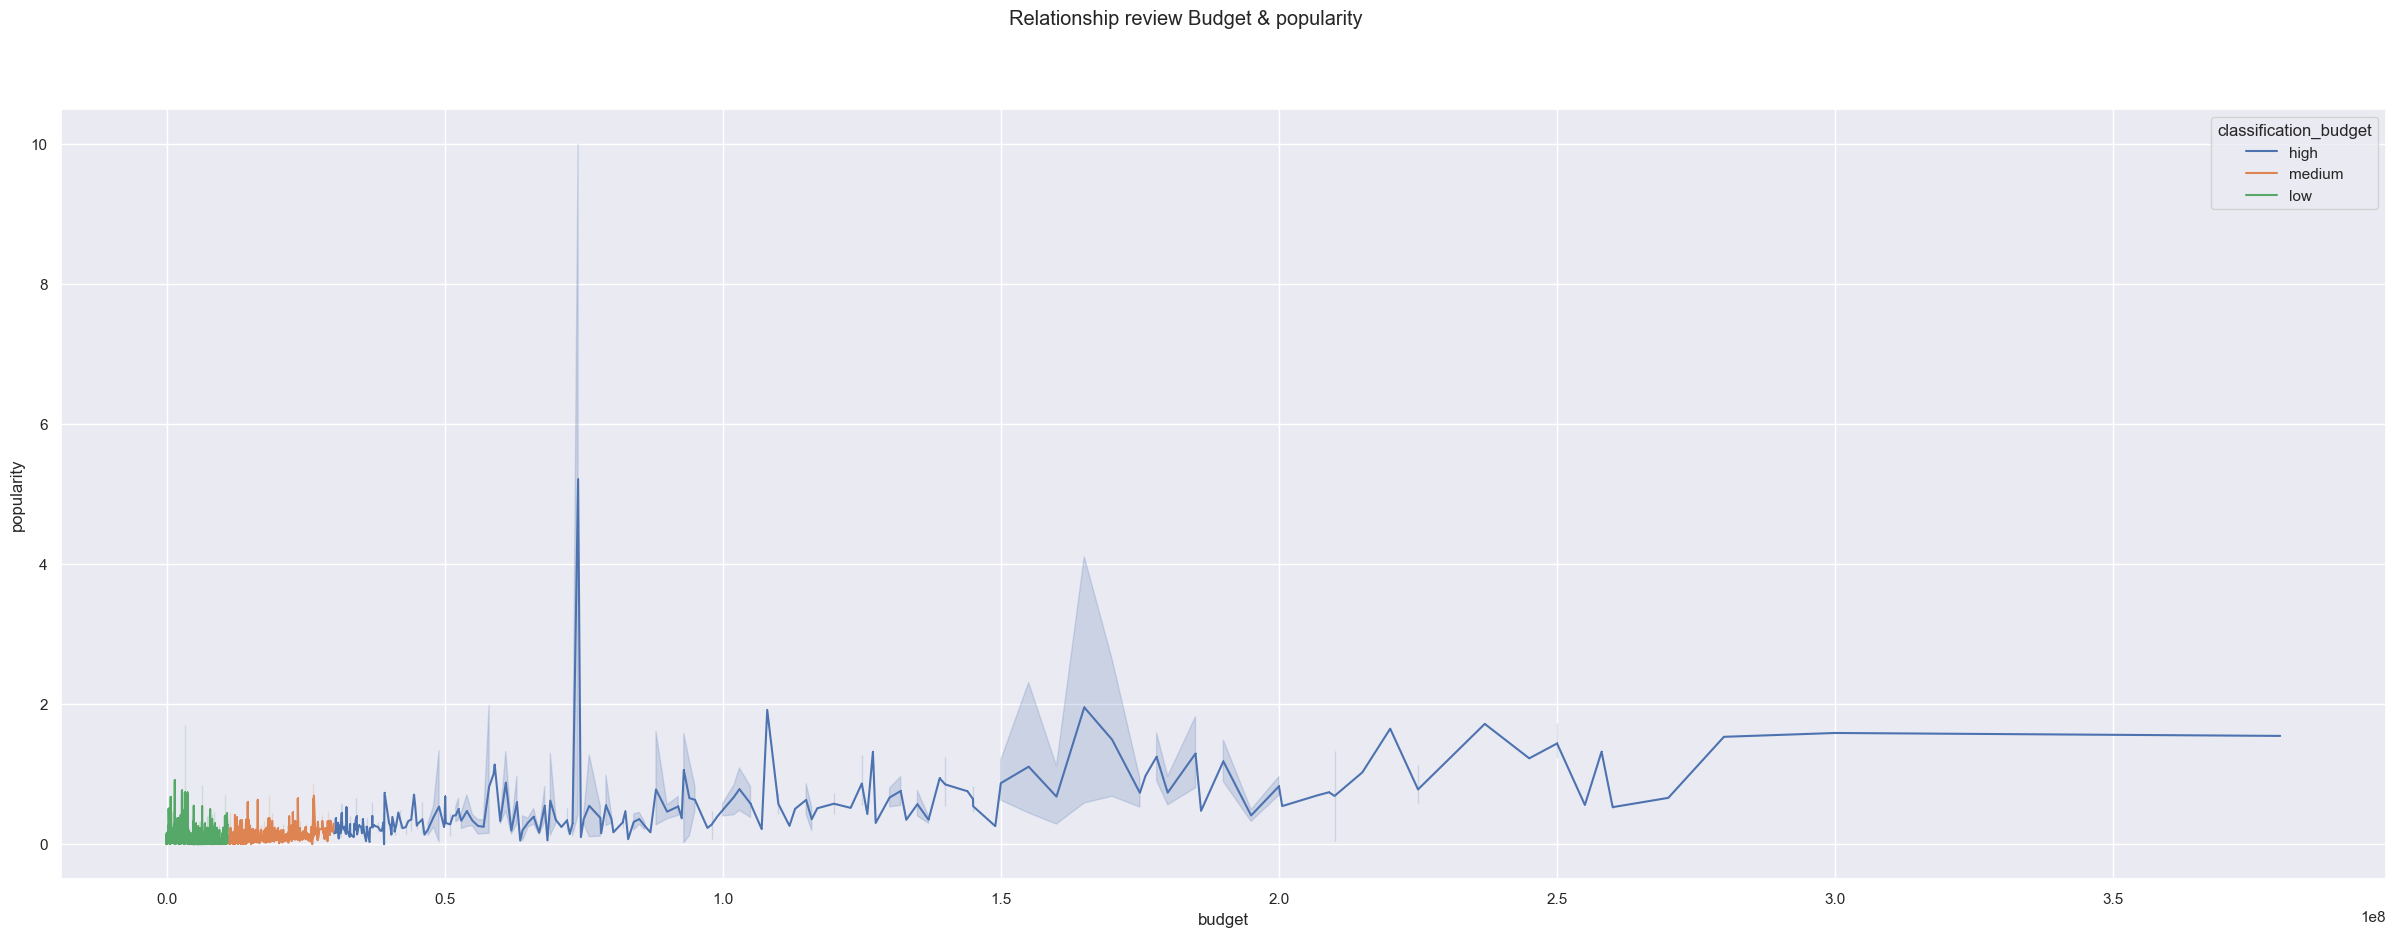

In [976]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(30, 10))
plt.suptitle('Relationship review Budget & popularity')

sns.scatterplot(data = df_relation, x = "budget", y = "popularity", ax = axs, marker = ',', hue = 'classification_budget')

axs.set_ylabel('popularity')

axs.set_xlabel('budget')

plt.show()

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(30, 10))
plt.suptitle('Relationship review Budget & popularity')

sns.lineplot(data = df_relation, x = "budget", y = "popularity", ax = axs, marker = ',', hue = 'classification_budget')

axs.set_ylabel('popularity')

axs.set_xlabel('budget')

plt.show()

In [1311]:
df_sequel = df7.copy()
df_sequel

budget                                          genres language  \
0     2.370000e+08  [action, adventure, fantasy, science, fiction]       en   
1     3.000000e+08                    [adventure, fantasy, action]       en   
2     2.450000e+08                      [action, adventure, crime]       en   
3     2.500000e+08                [action, crime, drama, thriller]       en   
4     2.600000e+08           [action, adventure, science, fiction]       en   
...            ...                                             ...      ...   
4796  3.185700e+05             [science, fiction, drama, thriller]       en   
4798  1.530690e+06                       [action, crime, thriller]       es   
4799  6.010449e+06                               [comedy, romance]       en   
4800  8.516256e+06             [comedy, drama, romance, tv, movie]       en   
4802  9.634277e+06                                   [documentary]       en   

      popularity                               production_companies  \
0       1.718142  [Ingenious Film Partners, Twentieth Century Fo...   
1       1.588457  [Walt Disney Pictures, Jerry Bruckheimer Films...   
2       1.226345                   [Columbia Pictures, Danjaq, B24]   
3       1.282721  [Legendary Pictures, Warner Bros., DC Entertai...   
4       0.501685                             [Walt Disney Pictures]   
...          ...                                                ...   
4796    0.266196                                        [Thinkfilm]   
4798    0.162971                                [Columbia Pictures]   
4799    0.007334                                                NaN   
4800    0.016493  [Front Street Pictures, Muse Entertainment Ent...   
4802    0.022037       [rusty bear entertainment, lucky crow films]   

                            production_countries  release       revenue  \
0     [United States of America, United Kingdom]   2009.0  2.787965e+09   
1                     [United States of America]   2007.0  9.610000e+08   
2     [United Kingdom, United States of America]   2015.0  8.806746e+08   
3                     [United States of America]   2012.0  1.084939e+09   
4                     [United States of America]   2012.0  2.841391e+08   
...                                          ...      ...           ...   
4796                  [United States of America]   2004.0  4.247600e+05   
4798          [Mexico, United States of America]   1992.0  2.040920e+06   
4799                                         NaN   2011.0  8.013932e+06   
4800                  [United States of America]   2013.0  1.049223e+07   
4802                  [United States of America]   2005.0  3.554594e+06   

      runtime                                     title  vote_average  \
0       162.0                                    Avatar           7.2   
1       169.0  Pirates of the Caribbean: At World's End           6.9   
2       148.0                                   Spectre           6.3   
3       165.0                     The Dark Knight Rises           7.6   
4       132.0                               John Carter           6.1   
...       ...                                       ...           ...   
4796     77.0                                    Primer           6.9   
4798     81.0                               El Mariachi           6.6   
4799     85.0                                 Newlyweds           5.9   
4800    120.0                 Signed, Sealed, Delivered           7.0   
4802     90.0                         My Date with Drew           6.3   

      vote_count                                               cast  \
0        11800.0  [sam worthington, zoe saldana, sigourney weave...   
1         4500.0  [johnny depp, orlando bloom, keira knightley, ...   
2         4466.0  [daniel craig, christoph waltz, l\u00e9a seydo...   
3         9106.0  [christian bale, michael caine, gary oldman, a...   
4         2124.0  [taylor kitsch, lynn collins, samantha morton,...   
...   

### Exact string matching

In [1315]:
df_sequel_exact = df_sequel[['title', 'profitability' , 'release', 'good_score' , 'success_score']].copy()

In [1316]:
sequel_indicators_pattern = re.compile(r"\b(part|II{1,3}|III{1,2}|IV|V|VI|returns|revenge|rises)\b", flags = re.IGNORECASE)
ending_with_number_pattern =  re.compile(r"(?:\b[2-6]$|^\d$|^\d \d$)")
without_digit_and_indicators_pattern = re.compile(r":(.*)")
numbers_pattern =  re.compile(r"^\d+[-:/]?\d*$")

In [1317]:
def is_potential_sequel(title):
    if bool(numbers_pattern.search(title)):
        return False
    else: 
        return (bool(sequel_indicators_pattern.search(title)) or bool(ending_with_number_pattern.search(title)) or bool(without_digit_and_indicators_pattern.search(title)))

In [1819]:
df_pattern = df_sequel_exact[df_sequel_exact["title"].apply(is_potential_sequel)][['title','release']].sort_values(by='title')

pattern = re.compile(r"\d.*")

df_pattern["title"] = df_pattern["title"].str.replace(ending_with_number_pattern, "")
df_pattern["title"] = df_pattern["title"].str.replace(without_digit_and_indicators_pattern, "")
df_pattern["title"] = df_pattern["title"].str.replace(sequel_indicators_pattern, "")
df_pattern["title"] = df_pattern["title"].str.replace(pattern, "")

df_pattern = df_pattern.title.unique()

In [1821]:
name_sequel_movies = []

for title in df_pattern[1:]:
    if (df_sequel_exact[df_sequel_exact.title.str.startswith(title)].shape[0] > 1):
        name_sequel_movies.append(title)
        
len(name_sequel_movies)

121

In [1822]:
df_sequel_movies = pd.DataFrame(columns = ['title',
                                           'profitability',
                                           'f_good_score',
                                           'good_score',
                                           'f_success_score',
                                           'success_score' ,
                                           'order'])

for title in name_sequel_movies :
    
    df_sequel_movie = df_sequel_exact[df_sequel_exact.title.str.startswith(title)].sort_values('release').reset_index(drop = True)
    
    score_mean = df_sequel_movie[['profitability', 'good_score', 'success_score']].mean()
    
    new_df_sequel_movie = pd.DataFrame({'title': [title],
                                        'profitability': [score_mean.profitability],
                                        'f_good_score': df_sequel_movie.iloc[0, 3],
                                        'good_score': [score_mean.good_score],
                                        'f_success_score': df_sequel_movie.iloc[0, 4],
                                        'success_score': [score_mean.success_score],
                                        'order': df_sequel_movie.shape[0]})
    
    df_sequel_movies = pd.concat([df_sequel_movies, new_df_sequel_movie], ignore_index = True)

In [1823]:
df_sequel_movies.sample(5)

title  profitability  f_good_score  good_score  \
4   Alvin and the Chipmunks   2.848479e+08      1.125066    1.065176   
62      Night at the Museum   3.166704e+08      1.625882    1.820060   
87                 Spy Kids   1.030585e+08      0.908134    0.815711   
12       Beverly Hills Cop    1.745870e+08      1.263820    1.130103   
27               Fantastic    7.116546e+07      1.101660    1.174980   

    f_success_score  success_score order  
4          0.507355       0.509066     4  
62         0.488054       0.351128     3  
87         0.363018       0.331915     4  
12         1.249649       0.737460     2  
27         0.193416       0.160010     3

In [1824]:
df_sequel_movies.groupby('order').size()

order
2     61
3     26
4     18
5      7
6      2
7      5
8      1
13     1
dtype: int64

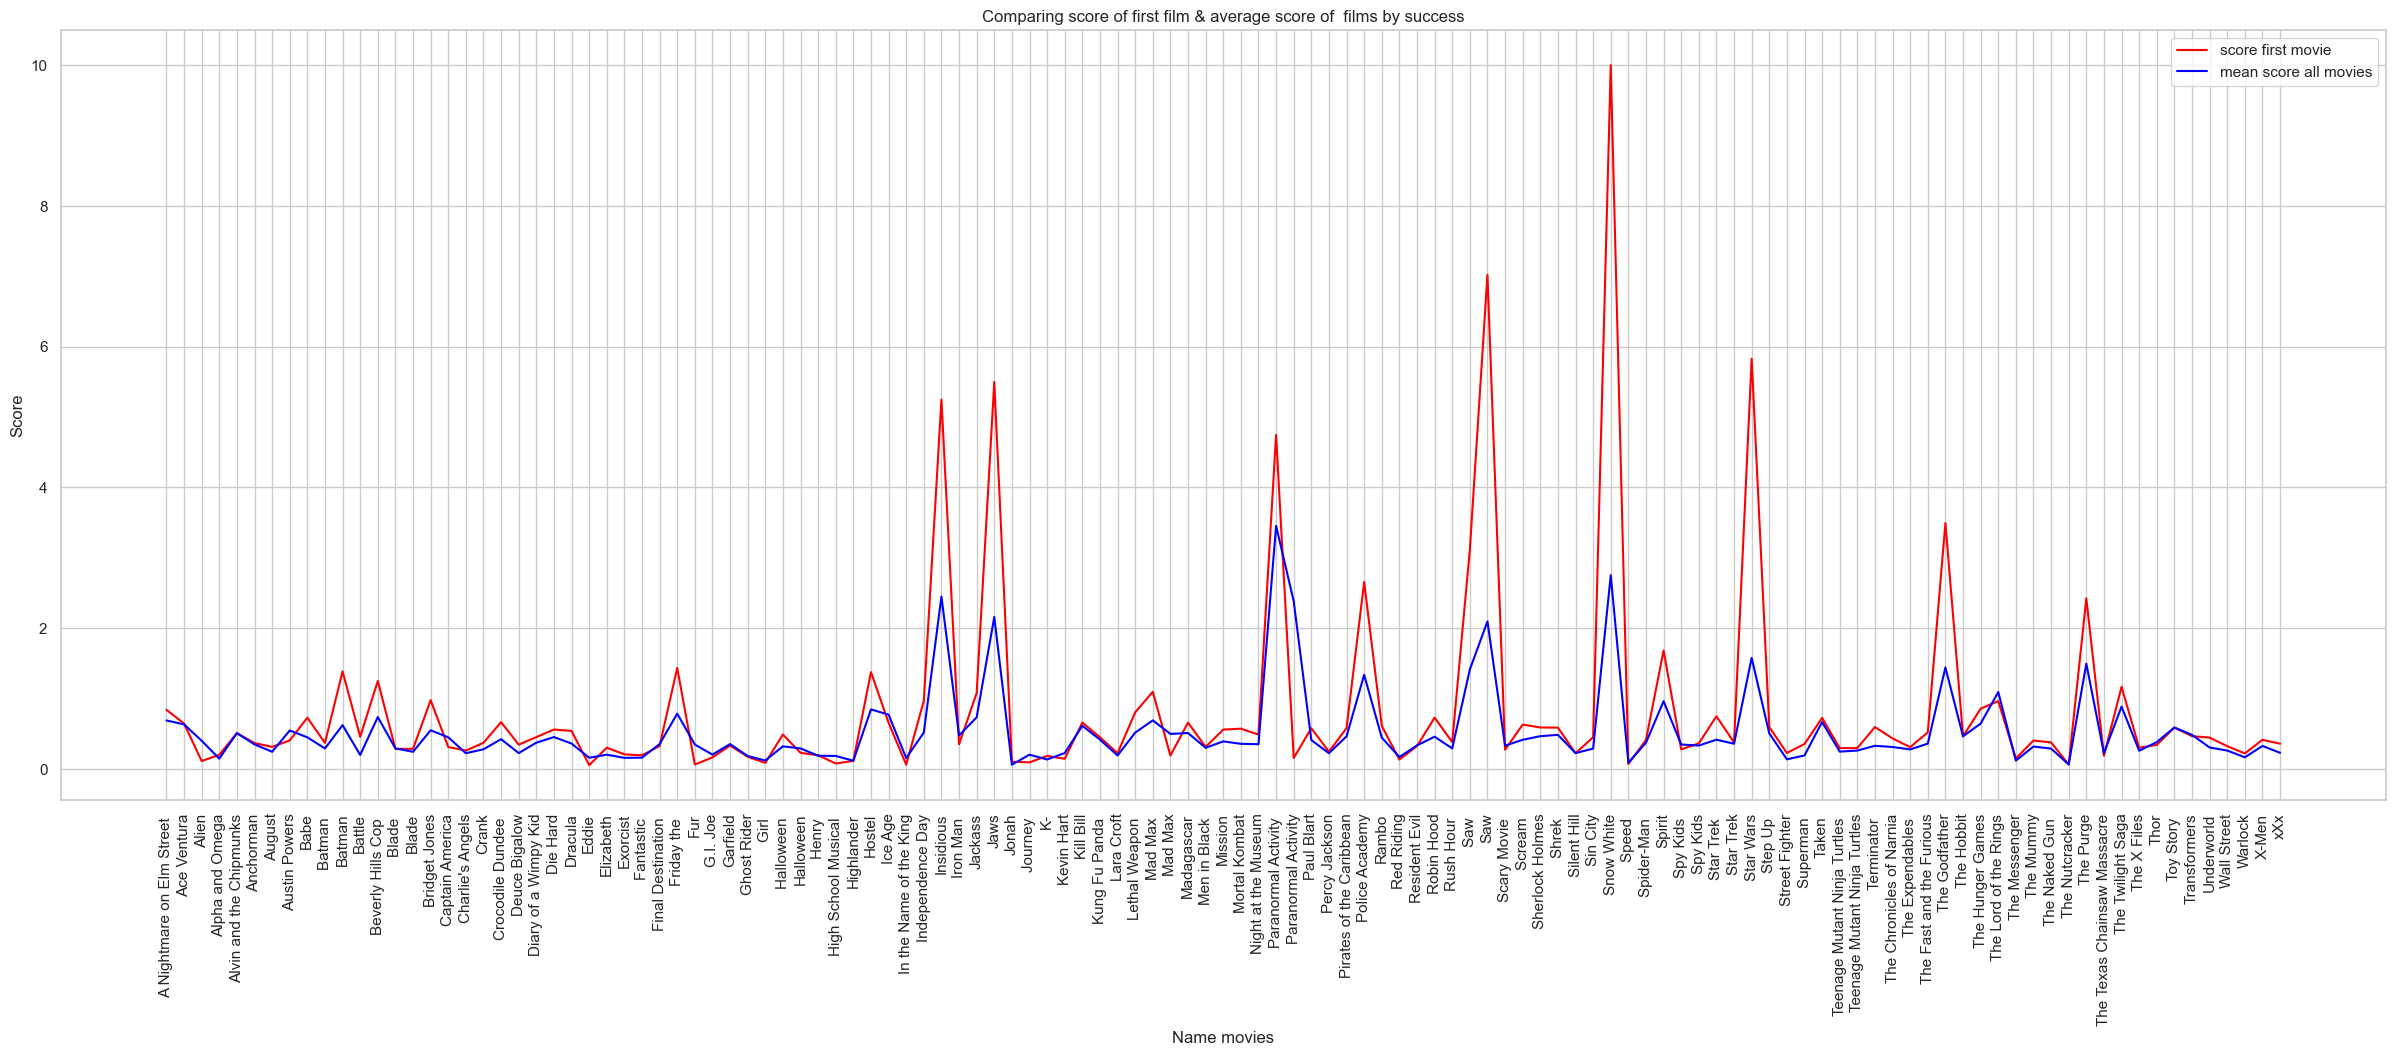

In [1825]:
sns.set(style='whitegrid')

fig , axes = plt.subplots(1, 1, figsize=(30, 10))

sns.lineplot(data = df_sequel_movies,
            x = 'title',
            y = 'f_success_score',            
            color = 'red',
            ax = axes,
            label = 'score first movie')

sns.lineplot(data = df_sequel_movies,
            x = 'title',
            y = 'success_score',
            color = 'blue',
            ax = axes,
            label = 'mean score all movies')

plt.xticks(rotation = 90)

axes.set_title('Comparing score of first film & average score of  films by success')

axes.set_xlabel('Name movies')
axes.set_ylabel('Score')

axes.legend()

plt.show();

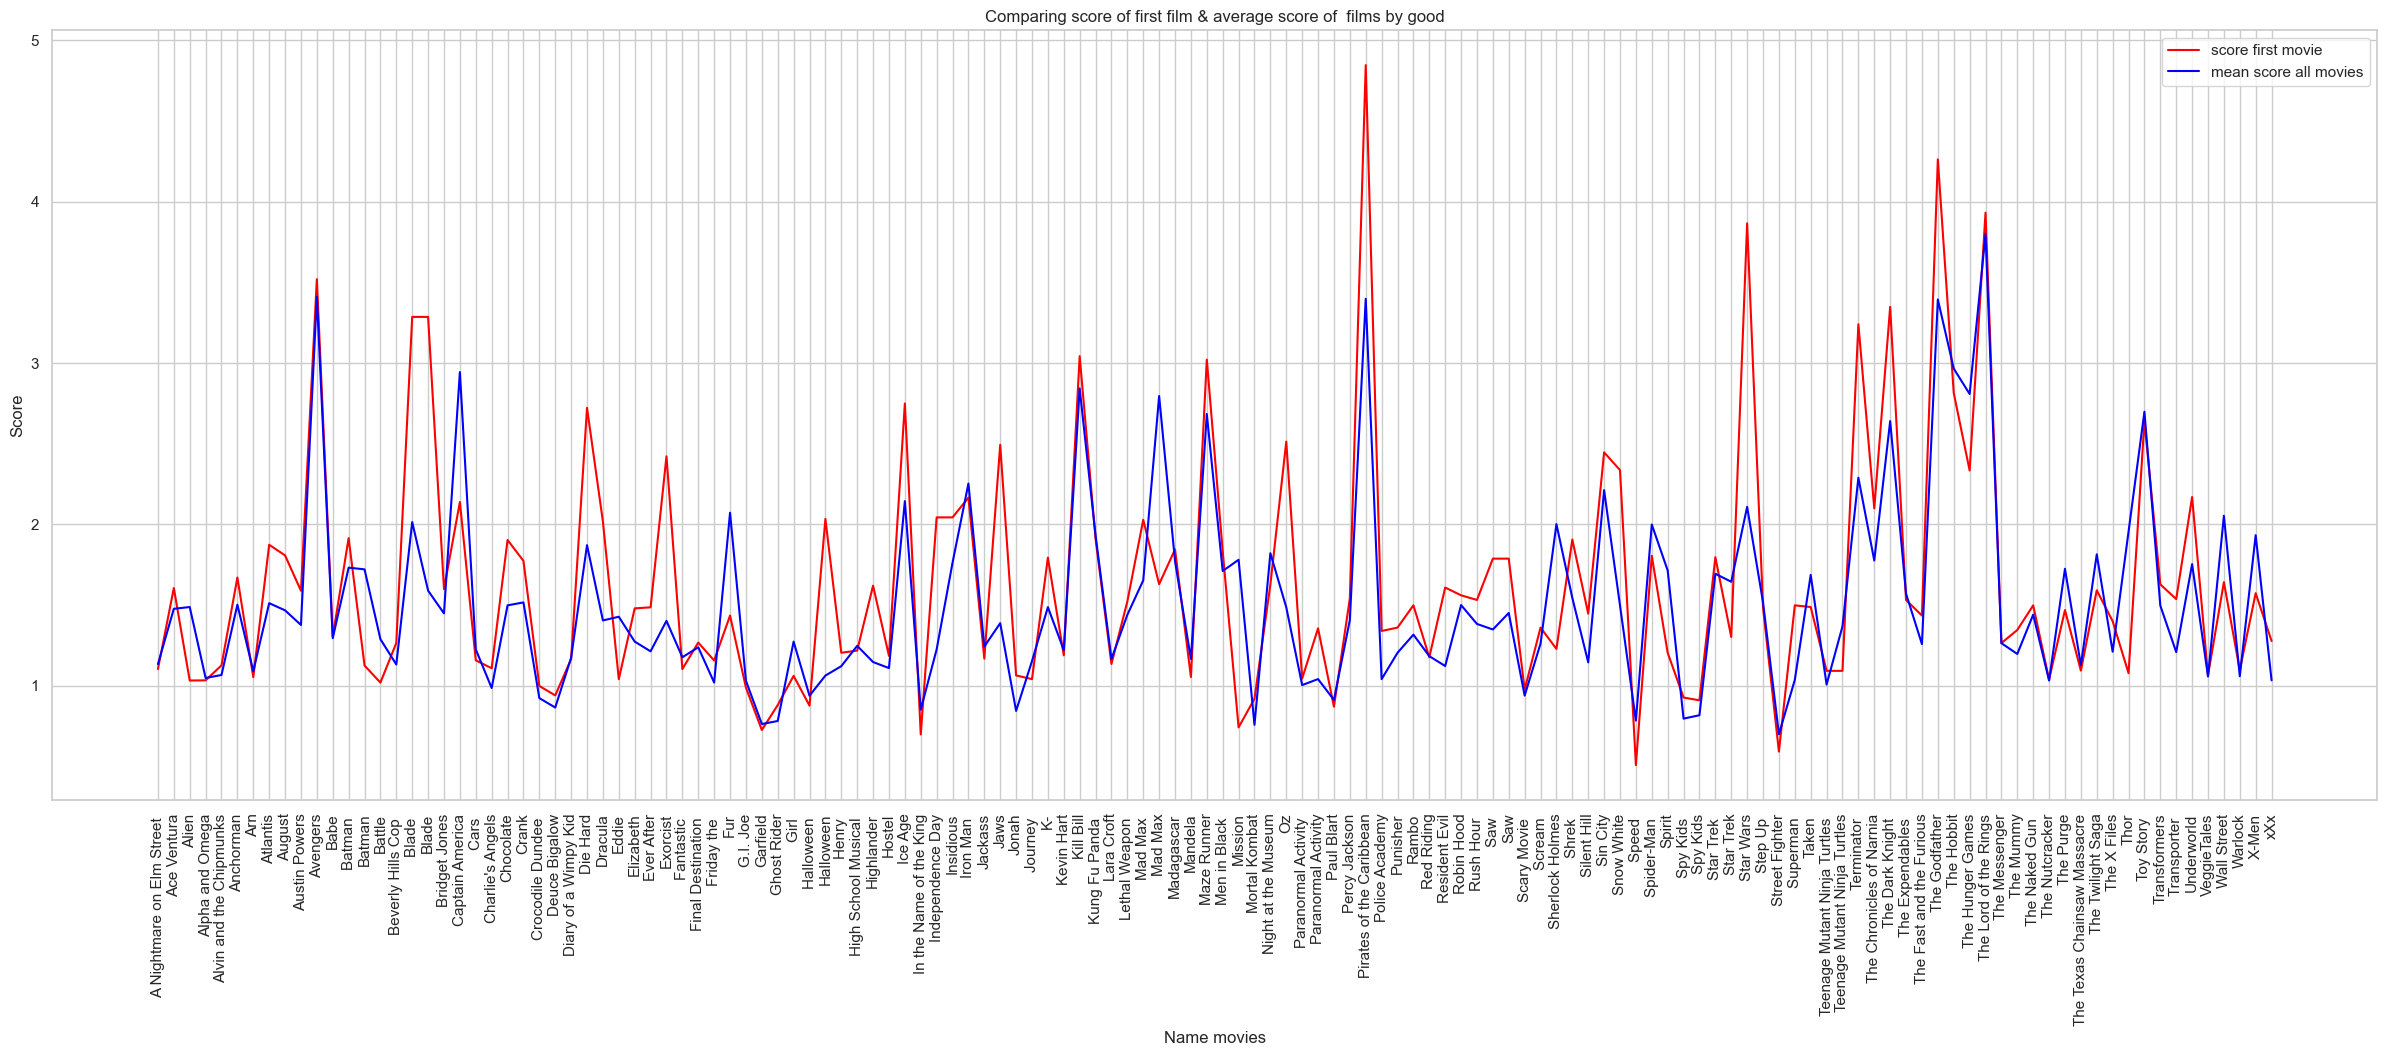

In [1383]:
sns.set(style='whitegrid')

fig , axes = plt.subplots(1, 1, figsize=(30, 10))

sns.lineplot(data = df_sequel_movies,
            x = 'title',
            y = 'f_good_score',            
            color = 'red',
            ax = axes,
            label = 'score first movie')

sns.lineplot(data = df_sequel_movies,
            x = 'title',
            y = 'good_score',
            color = 'blue',
            ax = axes,
            label = 'mean score all movies')

plt.xticks(rotation = 90)

axes.set_title('Comparing score of first film & average score of  films by good')

axes.set_xlabel('Name movies')
axes.set_ylabel('Score')

axes.legend()

plt.show();

### Fuzzy string matching

In [1138]:
df_sequel_fuzzy = df_sequel[['genres', 'title', 'production_companies', 'cast', 'director', 'good_score']].copy()

df_sequel_fuzzy.sort_values(by = 'director', ascending = False, inplace = True)

In [1139]:
df_sequel_fuzzy.dropna(subset = ['production_companies'], inplace = True)
df_sequel_fuzzy.isna().sum()

genres                  0
title                   0
production_companies    0
cast                    0
director                0
good_score              0
dtype: int64

In [1144]:
# df_sequel_fuzzy['use'] = False
# sequel_movies = []

# for i in range(1, len(df_sequel_fuzzy)):
    
    
#     title1 = df_sequel_fuzzy.iloc[i - 1, 1]
#     company1 = df_sequel_fuzzy.iloc[i - 1, 2]
    
#     if(df_sequel_fuzzy.iloc[i - 1, 6] == True):
#         continue
#     else:
#         df_sequel_fuzzy.iloc[i - 1, 6] = True
    
#     consecutive_movies = []
#     consecutive_movies.append(title1)
    
#     k = 0
    
#     for j in range(i, len(df_sequel_fuzzy)):
        
#         if k > 25:
#             break
#         else:
#             k += 1
            
#         title2 = df_sequel_fuzzy.iloc[j, 1]
#         company2 = df_sequel_fuzzy.iloc[j, 2]
        
#         if(df_sequel.iloc[j, 6] == True):
#             continue
        
#         similarity_title = fuzz.token_set_ratio(title1, title2)
#         similarity_genres = fuzz.token_set_ratio(df_sequel_fuzzy.iloc[i - 1, 0], df_sequel_fuzzy.iloc[j, 0])
#         similarity_cast = fuzz.token_set_ratio(df_sequel_fuzzy.iloc[i - 1, 3], df_sequel_fuzzy.iloc[j, 3])
#         similarity_companies = fuzz.token_set_ratio(company1, company2)
        
#         if (df_sequel_fuzzy.iloc[i - 1, 4] == df_sequel_fuzzy.iloc[j, 4]):
#             if (similarity_companies >= 25):
#                 if (similarity_title >= 50 & similarity_genres >= 35 & similarity_cast >= 25):
#                     consecutive_movies.append(title2)
#                     df_sequel.iloc[j, 6] = True
    
#     if len(consecutive_movies) > 1:
#         sequel_movies.append(consecutive_movies)
        
# print(len(sequel_movies))
# sequel_movies

In [1558]:
df_SequelMovies = pd.read_csv('sequel_movies.csv')
df8 = df7[['title', 'release', 'good_score', 'success_score']].copy()
df_SequelMovies.shape

(866, 13)

In [1559]:
df_SequelMovies = df_SequelMovies[df_SequelMovies.Year < 2017]
df_SequelMovies.shape

(801, 13)

In [1560]:
df_SequelMovies.drop(columns = ['index',
                                'Release Date',
                                'Description',
                                'URL',
                                'Runtime (mins)',
                                'Genres',
                                'Num Votes',
                                'Directors'],
                     inplace = True)

In [1561]:
print(df_SequelMovies.isnull().sum())

Title           0
Year            0
IMDb Rating     0
Movie Series    0
Order           0
dtype: int64


In [1562]:
df_merge = df_SequelMovies.merge(df8, left_on = 'Title', right_on = 'title').drop(columns = ['Title'])
df_merge.shape

(578, 8)

In [1569]:
_df_merge = df_merge.groupby(by = 'Movie Series').filter(lambda x: len(x) >= 2)
group_merge = _df_merge.groupby(by ='Movie Series')
first_movie = group_merge['release'].idxmin()

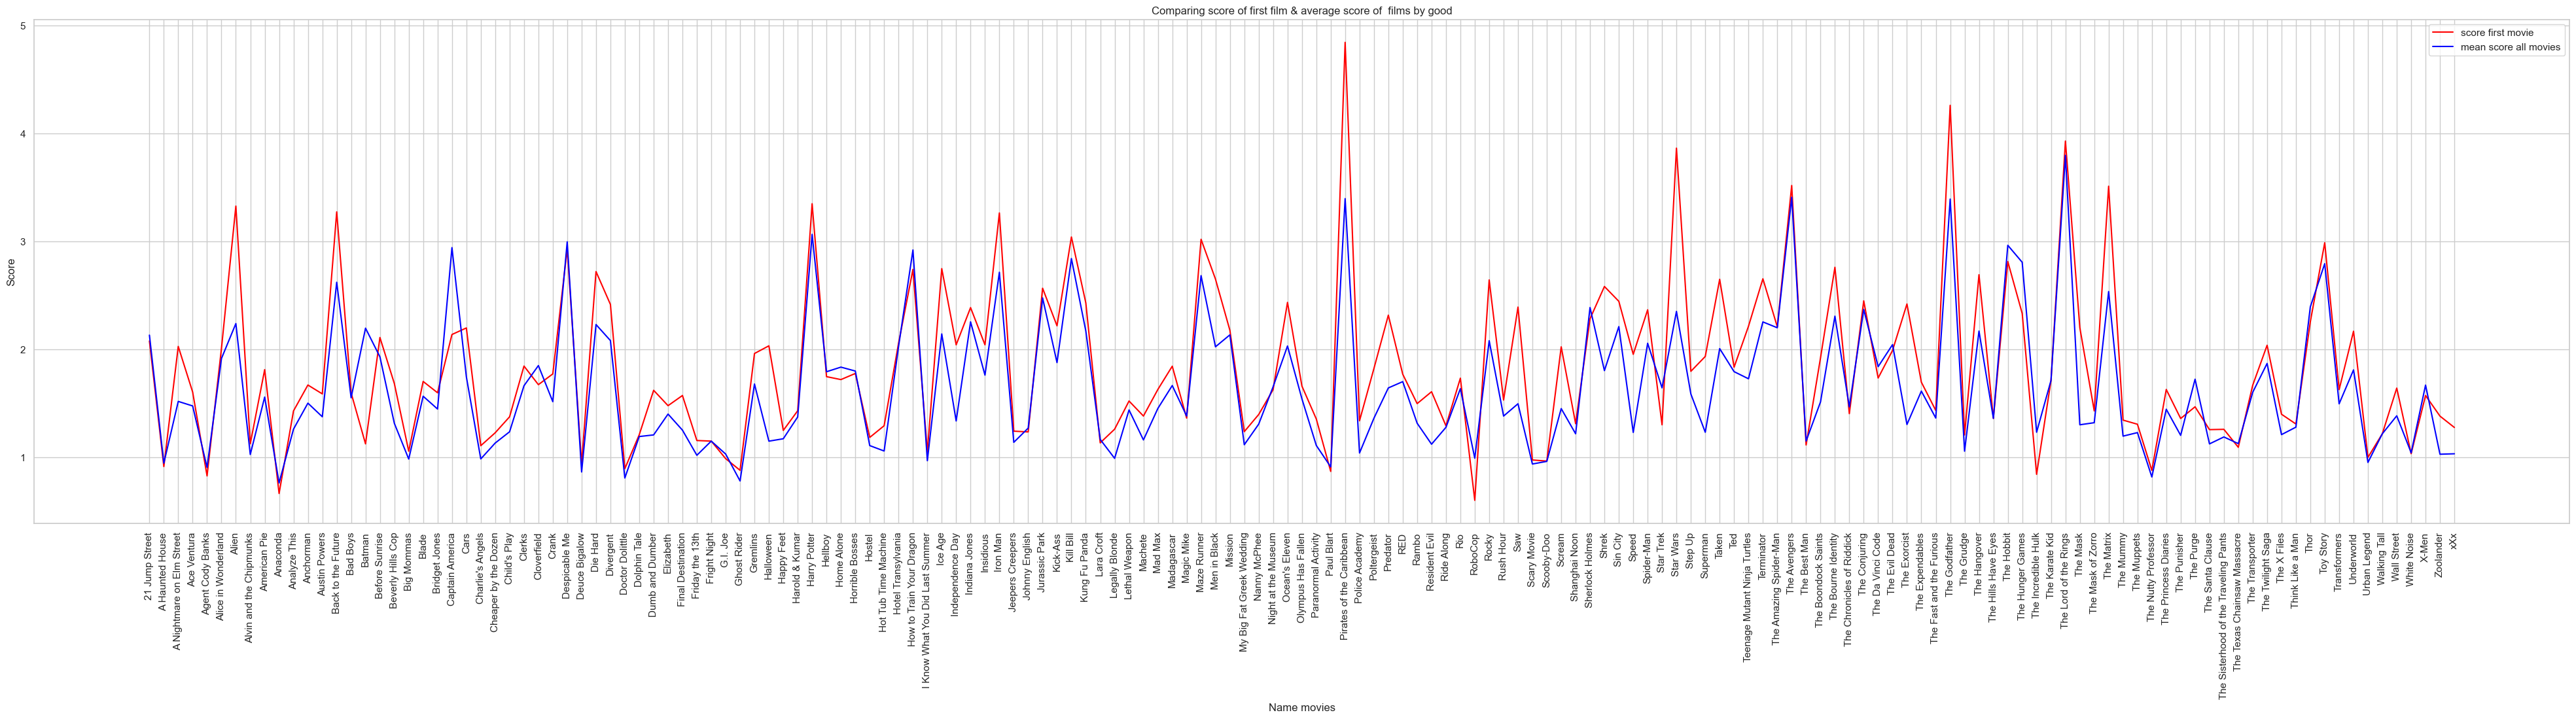

In [1572]:
sns.set(style='whitegrid')

fig , axes = plt.subplots(1, 1, figsize=(50, 10))

sns.lineplot(
            x = group_merge.groups.keys(),
            y = df_merge.iloc[first_movie]['good_score'],            
            color = 'red',
            ax = axes,
            label = 'score first movie')

sns.lineplot(
            x = group_merge.groups.keys(),
            y = group_merge['good_score'].mean(),
            color = 'blue',
            ax = axes,
            label = 'mean score all movies')

plt.xticks(rotation = 90)

axes.set_title('Comparing score of first film & average score of  films by good')

axes.set_xlabel('Name movies')
axes.set_ylabel('Score')

axes.legend()

plt.show();

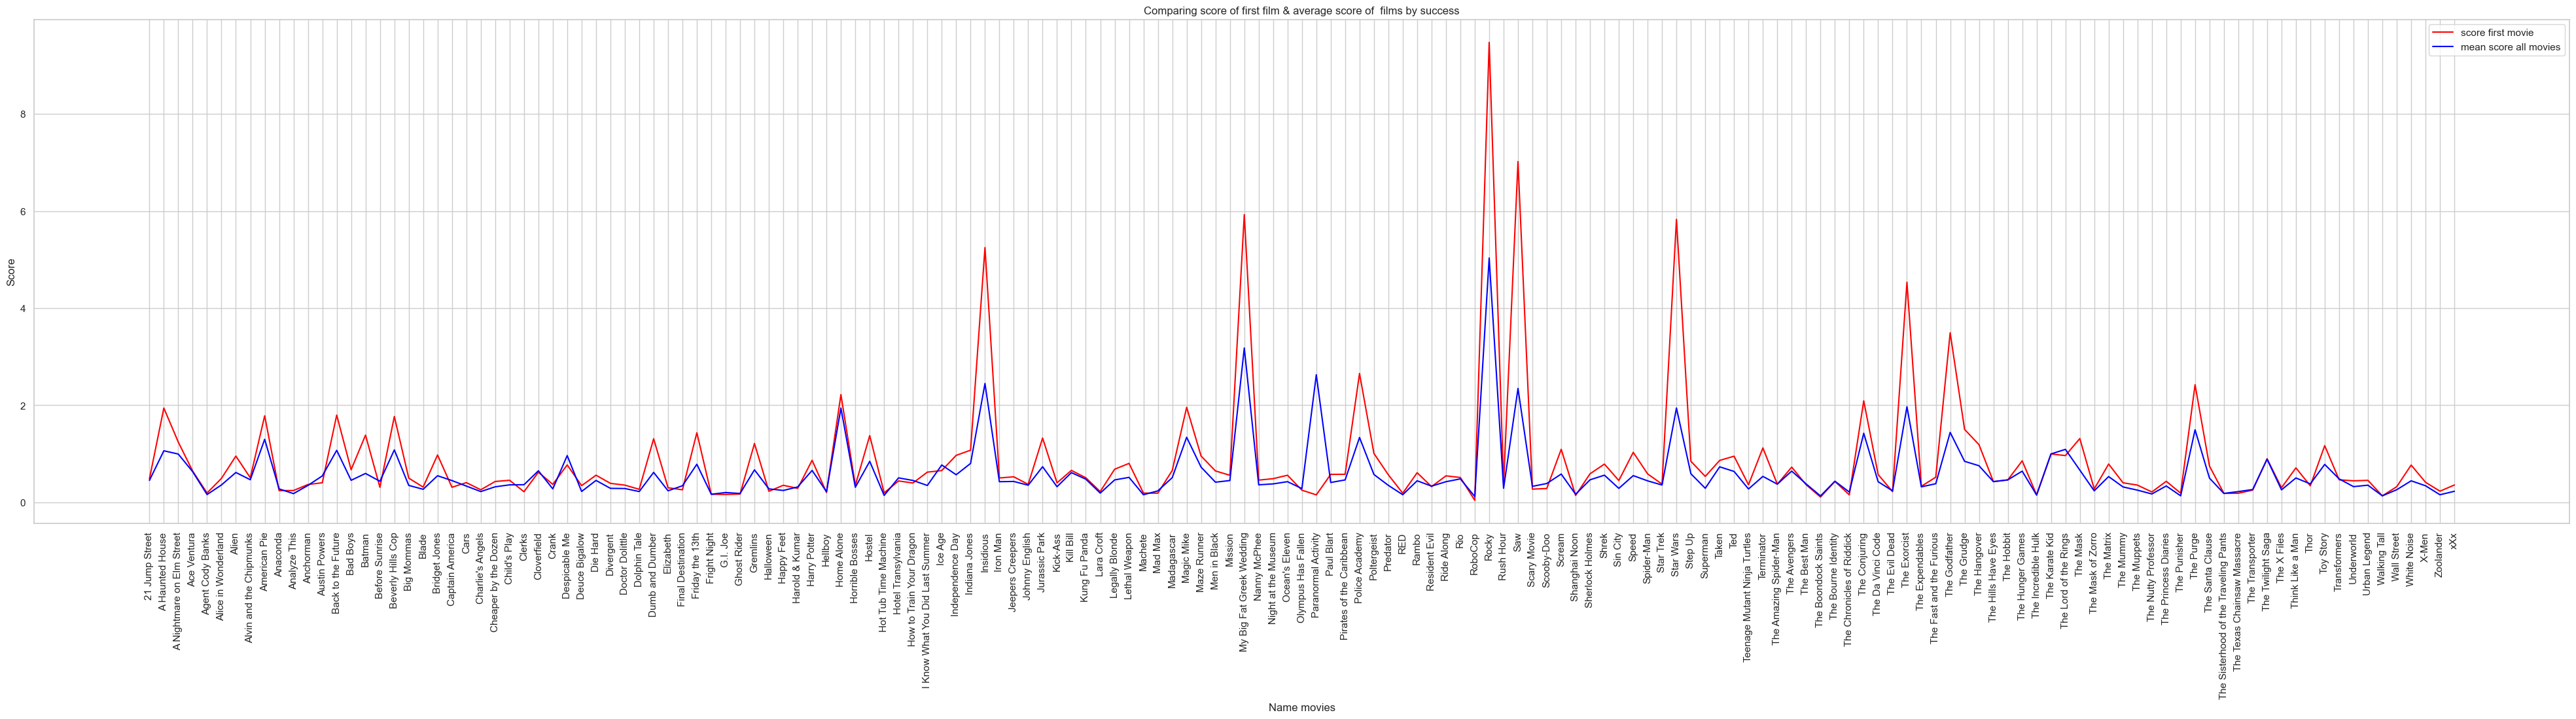

In [1573]:
sns.set(style='whitegrid')

fig , axes = plt.subplots(1, 1, figsize=(50, 10))

sns.lineplot(
            x = group_merge.groups.keys(),
            y = df_merge.iloc[first_movie]['success_score'],            
            color = 'red',
            ax = axes,
            label = 'score first movie')

sns.lineplot(
            x = group_merge.groups.keys(),
            y = group_merge['success_score'].mean(),
            color = 'blue',
            ax = axes,
            label = 'mean score all movies')

plt.xticks(rotation = 90)

axes.set_title('Comparing score of first film & average score of  films by success')

axes.set_xlabel('Name movies')
axes.set_ylabel('Score')

axes.legend()

plt.show();

In [1599]:
_df_SequelMovies = df_SequelMovies.groupby(by = 'Movie Series').filter(lambda x: len(x) >= 2)
_df_SequelMovies.reset_index(drop = True, inplace = True)
group_merge = _df_SequelMovies.groupby(by = 'Movie Series')
first_movie = group_merge['Year'].idxmin()

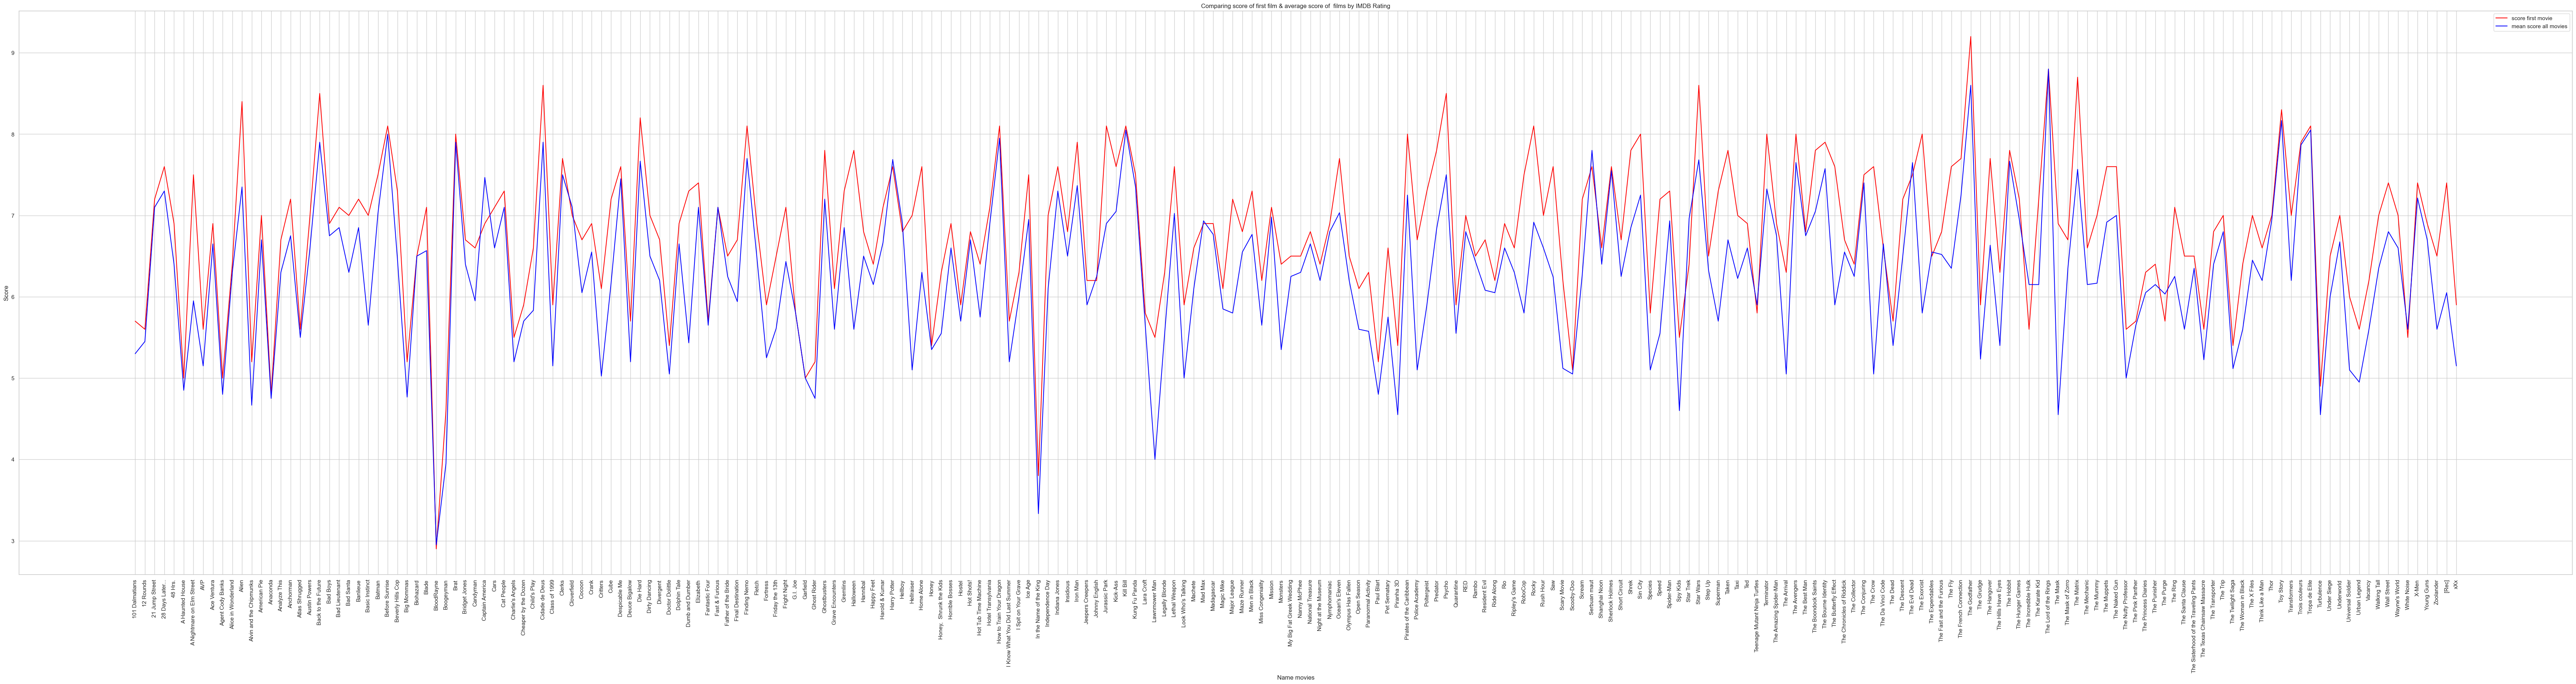

In [1602]:
sns.set(style='whitegrid')

fig , axes = plt.subplots(1, 1, figsize=(90, 20))

sns.lineplot(
            x = group_merge.groups.keys(),
            y = _df_SequelMovies.iloc[first_movie]['IMDb Rating'],            
            color = 'red',
            ax = axes,
            label = 'score first movie')

sns.lineplot(
            x = group_merge.groups.keys(),
            y = group_merge['IMDb Rating'].mean(),
            color = 'blue',
            ax = axes,
            label = 'mean score all movies')

plt.xticks(rotation = 90)

axes.set_title('Comparing score of first film & average score of  films by IMDB Rating')

axes.set_xlabel('Name movies')
axes.set_ylabel('Score')

axes.legend()

plt.show();

-------------------------

# **Bonus**
### I have prepared some question for some of you that love NLP, Classification, Reggression
### ** There is no need to solve this questions, they are just reminder of what you will learn in future**

# How about some hard riddles? ;))

In [ ]:
#01 Can the chosen words in the movie title have an effect on its sales?

آیا کلمات انتخاب شده در عنوان فیلم می تواند تاثیری در فروش آن داشته باشد

In [ ]:
#02 Find a classification method and try to make a model and check its accuracy and predict the test split of data

یک روش طبقه بندی پیدا کنید و سعی کنید یک مدل بسازید و صحت آن را بررسی کنید و تقسیم آزمایشی داده ها را پیش بینی کنید

In [ ]:
#03 find a way to draw a tag cloud for any of columns you can.

 راهی برای ترسیم ابر برچسب برای هر یک از ستون هایی که می توانید پیدا کنید.

-------------------------